# Group 2
1. 1181103263 Chan Yun Hong
2. 1181103320 Boe Chang Horn 
3. 1181103087 Tan Kai Yuan

# Dataset1 - Education for children with disabilities

In [1]:
#Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error as mse, mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

warnings.filterwarnings("ignore")

# Helper functions
def checkMissingData(df):
    totalMissingData = df.isnull().sum()
    print(totalMissingData[totalMissingData != 0])
    print(f"Largest number of rows that have missing data: {totalMissingData.nlargest(1).values[0]}")

# Data Collection

#### Description of the dataset

In [2]:
# Load the dataset
fileName = 'Database-on-education-for-children-with-disabilities_2021.xlsx'

dfDict = {
"ANAR_P" : pd.read_excel(fileName, sheet_name='1. ANAR_Primary'),
"ANAR_LS" : pd.read_excel(fileName, sheet_name='2. ANAR_Lower secondary'),
"ANAR_US": pd.read_excel(fileName, sheet_name='3. ANAR_Upper secondary'),
"OOS_P" : pd.read_excel(fileName, sheet_name='4. OOS_Primary'),
"OOS_LS" : pd.read_excel(fileName, sheet_name='5. OOS_Lower Secondary'),
"OOS_US" : pd.read_excel(fileName, sheet_name='6. OOS_Upper secondary'),
"Completion_P" : pd.read_excel(fileName, sheet_name='7. Completion_Primary'),
"Reading" : pd.read_excel(fileName, sheet_name='8. Foundational reading skill'),
"Numeracy" : pd.read_excel(fileName, sheet_name='9. Foundational numeracy skill') 
}

In [3]:
# Check the shape of dataset from each sheet
for key in dfDict:
    print(f"{key}: {dfDict[key].shape}")

ANAR_P: (161, 18)
ANAR_LS: (161, 18)
ANAR_US: (161, 18)
OOS_P: (161, 18)
OOS_LS: (161, 18)
OOS_US: (161, 18)
Completion_P: (161, 18)
Reading: (161, 18)
Numeracy: (161, 18)


In [4]:
# Check first sheet of education indicators

checkMissingData(dfDict["ANAR_P"])
dfDict["ANAR_P"].head()

Countries and areas                          1
ISO Code                                    16
Region                                       1
Sub-region                                   1
Development regions                          6
Indicator                                    1
Category                                     1
Children without functional difficulties     1
Unnamed: 11                                  1
Unnamed: 12                                  1
Children with functional difficulties       33
Unnamed: 14                                 33
Unnamed: 15                                 33
Data source                                  1
Time period                                  1
dtype: int64
Largest number of rows that have missing data: 33


,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total,Unnamed: 8,Unnamed: 9,Children without functional difficulties,Unnamed: 11,Unnamed: 12,Children with functional difficulties,Unnamed: 14,Unnamed: 15,Data source,Time period
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,NaN,NaN
1,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Total,82.7,83.3,82.1,83.7,84.3,83.1,72.1,74.6,69.6,MICS6,2019
2,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Male,80.1,81,79.2,81.4,82.3,80.5,68.1,71.5,64.6,MICS6,2019
3,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Female,85.3,86.1,84.5,86,86.9,85.2,76.8,80.2,73.3,MICS6,2019
4,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Urban,84.3,85.6,82.9,84.9,86.3,83.6,76.1,81.8,70.3,MICS6,2019


In [5]:
# Check last sheet of education indicators
checkMissingData(dfDict["Numeracy"])
dfDict["Numeracy"].head()

Countries and areas                          1
ISO Code                                    16
Region                                       1
Sub-region                                   1
Development regions                          6
Indicator                                    1
Category                                     1
Total                                        5
Unnamed: 8                                   5
Unnamed: 9                                   5
Children without functional difficulties     5
Unnamed: 11                                  5
Unnamed: 12                                  5
Children with functional difficulties       27
Unnamed: 14                                 27
Unnamed: 15                                 27
Data source                                  1
Time period                                  1
dtype: int64
Largest number of rows that have missing data: 27


,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total,Unnamed: 8,Unnamed: 9,Children without functional difficulties,Unnamed: 11,Unnamed: 12,Children with functional difficulties,Unnamed: 14,Unnamed: 15,Data source,Time period
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,NaN,NaN
1,Bangladesh,BGD,SA,SA,Least Developed,Foundational numeracy skill,Total,27.9,28.5,27.3,28.3,28.9,27.7,22.7,24.8,20.7,MICS6,2019
2,Bangladesh,BGD,SA,SA,Least Developed,Foundational numeracy skill,Male,26.7,27.5,25.9,27.3,28.2,26.5,20.5,23.2,17.9,MICS6,2019
3,Bangladesh,BGD,SA,SA,Least Developed,Foundational numeracy skill,Female,29,29.8,28.1,29.3,30.1,28.4,25.2,28.3,22.1,MICS6,2019
4,Bangladesh,BGD,SA,SA,Least Developed,Foundational numeracy skill,Urban,32.8,34.2,31.4,33.6,35.1,32.2,20.2,25.1,15.4,MICS6,2019


- The shapes from the datasets from are the same, 161 rows with 18 columns
- From the excel file, we can see that 
    - there are 5 categories for each country, which are Total, Male, Female, Urban and Rural, each category will constitue 1 row for each country
    - there are 3 groups for each country which are Total, Children without functional difficulties, Children with functional difficulties
        - For each group, there are 3 columns of data which are Point estimate, Upper limit and Lower limit
        - We have decided to use point estimate to represent each education indicator as this is the value of the indicator according to the data dictionary provided in 'Cover Page' sheet of the excel file
- When we read the excel into pandas dataframe,  **the first row is the part of the header column**, therefore there are onlly 160 rows of with 18 columns for actual data

- Therefore, we can conclude that there are 32 countries in the dataset

#### Explore the time range of the dataset to determine what dataset should be filtered 
- The range of year of data collected of each row from the dataset is between 2017 to 2020
- As we would like to ensure the fairness and consider about the factors that might affect the dataset over the years such as government policy changes, contribution from non-profit organazations, we have decided to analyze the dataset on the same year

In [6]:
def checkYearFreq(df):
    return df['Time period'].value_counts()

# Check the counts of the unique values from 'Time period' column for all the dataset from each sheet
for key in dfDict:
    print(f"{key}")
    print(f"{checkYearFreq(dfDict[key])}")

ANAR_P
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15
2017         10
2019-20       5
Name: Time period, dtype: int64
ANAR_LS
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15
2017         10
2019-20       5
Name: Time period, dtype: int64
ANAR_US
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15
2017         10
2019-20       5
Name: Time period, dtype: int64
OOS_P
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15
2017         10
2019-20       5
Name: Time period, dtype: int64
OOS_LS
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15
2017         10
2019-20       5
Name: Time period, dtype: int64
OOS_US
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15
2017         10
2019-20       5
Name: Time period, dtype: int64
Completion_P
2019         40
2018         40
2018-2019    25
2019-2020    25
2017-2018    15


- First, we would choose dataset that was collect on year 2019.
- Therefore, we would also include dataset that was collect between 2018-2019, 2019-2020.
    - This is because we believe that it is comparative as long as the range of data collections includes 2019
- In this way, we could have the most amount of data

## Data Preprocessing


#### Data Cleaning

- For each dataset from all of the sheets, they have similar structure as explained above so we could apply same data cleaning technique for each dataset
- Then, we will merge all the dataset by country
- This is because that we would like to compare the data such as adjusted net attendance rate, out-of-school children rate and so on by country

#### Cleaning Techniques
- Drop the first row as it is part of the header column
- Drop all the columns for Upper limit and Lower limit as only the Point Estimate from the dataset is required
- Drop all the rows there is not within the year 2019
- Rename the column header names with a standardized naming convention 
    - Total : T, Children without functional difficulties : N, Children with functional difficulties: Y 
- Rename the Category variables with a standardized naming convention
    - Total : T, Male : M, Female : F, Urban : U, Rural : R 
- Eg : The column M_N will be the column for Male_Children without functional difficulties
- Aggregate all the data for each country by transposing the data by each Category from row to column
- Merge all the dataframes together

In [7]:
def preprocessDataframe(df):

    # Drop first row
    df = df.iloc[1: , :]
    tempDf = df.copy()

    # Filter out data based on 'Time period'
    acceptedTimePeriods = ['2018-2019','2019-2020','2019-20', 2019]
    tempDf = tempDf[tempDf['Time period'].isin(acceptedTimePeriods)]

    # Drop unused columns, upper limit and lower limit columns
    columnsToDrop = ['Time period','Data source','Indicator', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 15']
    tempDf.drop(columnsToDrop, axis=1,inplace=True)
    return tempDf

for key in dfDict:
    dfDict[key] = preprocessDataframe(dfDict[key])

In [8]:
# Group the rows by country then aggregate the columns to ensure each row is a unique row for each country
def mergeCol(df):
    #Reset index in the dataframe
    df.reset_index(drop=True, inplace=True)

    renameDict = {"Total":"T", "Children without functional difficulties":"N",
    "Children with functional difficulties":"Y", "Countries and areas":"Country"}

    df.rename(columns=renameDict, inplace=True)

    #Affected columns
    colNames = ["T", "M", "F", "U", "R"]
    colSubNames = ["T", "N", "Y"]

    # Declare new columns to transpose
    for c1 in colNames:
        for c2 in colSubNames:
            df[c1 + "_" + c2] = np.nan

    colIdx = {"T":0, 
    "M":1,
    "F":2,
    "U":3,
    "R":4}

    #Fill in NaN values
    for i in range(0, len(df), 5):
        for c1 in colNames:
            for c2 in colSubNames:
                val = df.iloc[i + colIdx[c1]][c2]
                df.at[i, c1 + "_" + c2] = val

    #Remove affected rows and reset index
    affectedRow = [i for i in range(len(df)) if i%5 != 0]
    df.drop(df.index[affectedRow], inplace=True)
    df.reset_index(drop=True, inplace=True)

    #Remove affected columns
    columnsToDrop = [*colSubNames, "Category"]
    df.drop(columnsToDrop, axis=1,inplace=True)


def renameDF(df, name):
    catLst = ["T", "U", "R", "F", "M"]
    disLst = ["T", "Y", "N"]

    renameDict = {i+"_"+j : name+"_"+i+"_"+j for i in catLst for j in disLst}
    df.rename(columns=renameDict, inplace=True)


def mergeDFs(dfDict):
    for key in dfDict:
        mergeCol(dfDict[key])
        renameDF(dfDict[key], key)

    repeatedCols = ['Country', 'ISO Code', 'Region', 'Sub-region',
       'Development regions']

    df = dfDict["ANAR_P"]

    for key in dfDict:
        if key == "ANAR_P":
            continue
        df = df.merge(dfDict[key], on = repeatedCols)

    return df
    
    

df = mergeDFs(dfDict)
df.head()

,Country,ISO Code,Region,Sub-region,Development regions,ANAR_P_T_T,ANAR_P_T_N,ANAR_P_T_Y,ANAR_P_M_T,ANAR_P_M_N,...,Numeracy_M_Y,Numeracy_F_T,Numeracy_F_N,Numeracy_F_Y,Numeracy_U_T,Numeracy_U_N,Numeracy_U_Y,Numeracy_R_T,Numeracy_R_N,Numeracy_R_Y
0,Bangladesh,BGD,SA,SA,Least Developed,82.7,83.7,72.1,80.1,81.4,...,20.5,29.0,29.3,25.2,32.8,33.6,20.2,26.6,26.9,23.2
1,Belarus,BLR,ECA,EECA,More Developed,92.3,93.0,77.9,91.5,93.2,...,65.2,72.8,72.9,NaN,74.6,74.9,68.8,66.5,66.8,NaN
2,Central African Republic,CAF,SSA,WCA,Least Developed,73.2,74.0,71.3,76.4,77.6,...,1.9,1.2,1.7,0.2,2.7,3.1,1.6,0.9,0.9,0.9
3,Chad,TCD,SSA,WCA,Least Developed,43.4,45.4,38.3,45.7,48.2,...,10.2,6.0,6.1,5.5,16.7,16.4,17.4,4.6,4.2,5.8
4,Guinea-Bissau,GNB,SSA,WCA,Least Developed,68.4,69.5,63.2,66.2,67.5,...,2.6,7.0,7.7,3.3,8.4,9.4,4.0,7.0,7.9,2.3


In [9]:
# Check the shape of merged dataframe
df.shape

(19, 140)

#### Check missing data

In [10]:
checkMissingData(df)

ISO Code               2
Development regions    1
ANAR_P_T_Y             3
ANAR_P_M_Y             7
ANAR_P_F_Y             7
                      ..
Numeracy_T_Y           2
Numeracy_M_Y           5
Numeracy_F_Y           6
Numeracy_U_Y           5
Numeracy_R_Y           4
Length: 71, dtype: int64
Largest number of rows that have missing data: 13


- As we have checked the missing data
    - For categorical variable, 'ISO Code' and 'Development Regions' columns have some missing values
    - For numeric variable, there are some missing data as well
- Due to reasons below:
    - We only have 19 countries for this dataset
    - Most importantly, the largest number of rows that have missing data is 13, which is 68% from our dataset
- Therefore, we would like to avoid solving the missing data issue by dropping the rows that have missing data


In [11]:
def fillISO(df):
    df.at[13, "ISO Code"] = "PAK"

    #Kosovo is not a country recognized by ISO 3166
    #Therefore we use an unofficial code (XKX)

    df.at[7, "ISO Code"] = "XKX"


fillISO(df)

In [12]:
def fillDevRegion(df):
    #Since Kosovo has $4690 GNI Per capita in 2019 (https://www.macrotrends.net/countries/XKX/kosovo/gni-per-capita#:~:text=Kosovo%20gni%20per%20capita%20for,a%208.06%25%20increase%20from%202018.)
    #It is in the Upper Middle country and can be classified as More Developed(https://www.worldbank.org/en/country/kosovo#:~:text=Kosovo%20is%20an%20upper%2Dmiddle,growth%20over%20the%20last%20decade.)

    df.at[7, "Development regions"] = "More Developed"

fillDevRegion(df)


After a discussion with group members. we have concluded that instead of fill the null values by the median of the column. We have taken a more heuristic approach by comparing the MSE of the current column with the column of total group and the column of total category. This will ensure that we are able to fill in the result from the country compared to the median as the education statistic is more correlated with the country itself compared to same group and category in global scale. Aside from this, this would allow us to decide whether the specific column is more correlated with the disability of the children or gender and development.

In [13]:
## Check MSE
def checkMSE(target, byGroup, byCat):
    #Let target as test set, let byGroup and byCat as predicted set
    yTest = df[df[target].notnull()][target]
    yGroup = df[df[target].notnull()][byGroup]
    yCat = df[df[target].notnull()][byCat]
    
    groupRes = mse(yTest, yGroup)
    catRes = mse(yTest, yCat)

    ##Return smaller value
    if catRes > groupRes:
        return "Group"
    else:
        return "Category"

def fillDataFromTotal(df):
    colName1 = list(dfDict.keys())
    colName2 = ["T","M","F","U","R"]
    colName3 = ["T", "Y","N"]

    for n1 in colName1:
        for n2 in colName2:
            for n3 in colName3:
                if n2 == 'T' and n3 == 'T':
                    continue

                target  = n1+"_"+n2+"_"+n3
                byGroup = n1+"_T_"+n3
                byCat   = n1+"_"+n2+"_T"

                if not df[target].isnull().values.any(): #Skip column is no null
                    continue

                best = checkMSE(target, byGroup, byCat)

                if best == "Group":
                    df[target].fillna(df[byGroup], inplace = True)
                    df[target].fillna(df[byCat], inplace = True)
                else:
                    df[target].fillna(df[byCat], inplace = True)
                    df[target].fillna(df[byGroup], inplace = True)


fillDataFromTotal(df)

In [14]:
checkMissingData(df)

Series([], dtype: int64)
Largest number of rows that have missing data: 0


# Exploratory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Columns: 140 entries, Country to Numeracy_R_Y
dtypes: float64(135), object(5)
memory usage: 21.5+ KB


In [16]:
df.describe()

,ANAR_P_T_T,ANAR_P_T_N,ANAR_P_T_Y,ANAR_P_M_T,ANAR_P_M_N,ANAR_P_M_Y,ANAR_P_F_T,ANAR_P_F_N,ANAR_P_F_Y,ANAR_P_U_T,...,Numeracy_M_Y,Numeracy_F_T,Numeracy_F_N,Numeracy_F_Y,Numeracy_U_T,Numeracy_U_N,Numeracy_U_Y,Numeracy_R_T,Numeracy_R_N,Numeracy_R_Y
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.00000
mean,83.857895,84.357895,80.884211,83.921053,84.589474,80.978947,83.752632,84.110526,80.763158,87.563158,...,31.752632,36.168421,36.557895,33.178947,38.889474,39.436842,34.652632,33.400000,34.073684,30.50000
std,18.220877,18.113510,18.900948,17.592694,17.502631,18.725609,19.032585,18.889147,19.237181,13.005563,...,21.445081,22.360060,22.426282,21.421422,21.794084,21.878864,20.613786,21.226058,21.439394,21.58083
min,36.200000,36.500000,34.900000,37.900000,38.000000,37.400000,34.400000,34.900000,32.100000,48.300000,...,1.900000,1.200000,1.700000,0.200000,2.700000,3.100000,1.600000,0.900000,0.900000,0.90000
25%,75.800000,75.100000,72.700000,78.050000,77.900000,73.300000,74.250000,74.000000,75.250000,84.250000,...,15.350000,25.550000,24.450000,22.250000,23.250000,23.000000,20.600000,20.350000,20.800000,17.15000
50%,90.300000,90.300000,90.100000,89.900000,89.200000,88.600000,91.400000,91.400000,89.100000,91.700000,...,36.800000,35.800000,36.700000,29.700000,41.300000,41.600000,37.600000,37.600000,38.300000,27.30000
75%,96.950000,97.350000,94.300000,96.350000,97.250000,95.200000,97.100000,97.050000,94.650000,96.800000,...,43.200000,49.750000,49.600000,47.200000,55.250000,54.950000,45.900000,49.750000,49.850000,44.75000
max,98.700000,99.300000,98.700000,98.900000,99.900000,98.700000,98.800000,98.800000,98.700000,98.500000,...,65.200000,72.800000,72.900000,66.100000,74.600000,74.900000,68.800000,69.400000,69.600000,66.10000


In [17]:
df.sample(5)

,Country,ISO Code,Region,Sub-region,Development regions,ANAR_P_T_T,ANAR_P_T_N,ANAR_P_T_Y,ANAR_P_M_T,ANAR_P_M_N,...,Numeracy_M_Y,Numeracy_F_T,Numeracy_F_N,Numeracy_F_Y,Numeracy_U_T,Numeracy_U_N,Numeracy_U_Y,Numeracy_R_T,Numeracy_R_N,Numeracy_R_Y
8,Nepal,NPL,SA,SA,Least Developed,75.3,75.7,73.3,74.5,74.9,...,37.5,35.8,36.7,29.6,41.3,41.6,39.1,28.8,29.6,23.3
6,Kiribati,KIR,EAP,EAP,Least Developed,97.4,98.2,94.8,97.2,97.5,...,18.4,24.3,23.9,26.1,18.5,17.8,21.0,24.6,25.1,22.9
13,Pakistan (Sindh),PAK,SA,SA,Less Developed,36.2,36.5,34.9,37.9,38.0,...,4.6,3.7,3.6,3.8,6.5,6.5,6.7,1.4,1.4,1.1
10,State of Palestine,PSE,MENA,MENA,Less Developed,96.9,97.8,92.4,96.1,96.8,...,36.8,45.8,46.7,37.9,44.7,46.0,37.0,49.7,51.2,38.1
18,Zimbabwe,ZWE,SSA,ESA,Less Developed,90.3,90.3,90.1,89.2,89.2,...,17.7,26.8,27.5,19.3,41.4,41.7,37.8,19.1,19.8,13.5


In [18]:
# helper functions
GLOBALPALETTE = "Set1"

def customCountPlot(data, ax=None):
    totalCount = len(data)
    ax = sns.countplot(data, order=sorted(data.unique()), palette=GLOBALPALETTE,ax=ax)
    for p in ax.patches: 
        percentage = round((p.get_height() / totalCount) * 100,2)
        ax.annotate(f'{percentage}%',(p.get_x()+0.1, p.get_height()+50))

def plotUnivariateFeature(colName, isContinuous, df, ax=None):
    # Ignore rows that has missing data on specific column
    data = df.loc[df[colName].notnull(), colName]
    if isContinuous:
        sns.histplot(data, ax=ax)
    else:
        customCountPlot(data,ax)

def plotBivariateAnalysis(x,y,df,ax=None):
    sns.barplot(x, y, data=df,palette=GLOBALPALETTE,ax=ax)

def plotMultivariateAnalysis(x,y,df,ax=None):
    df.plot(x,y, kind="bar",ax=ax)


## Univariate Analysis

#### Categorical data 

We have excluded 'Country' and 'ISO Code' columns as each row for our final dataset represent one country, thus it is not necessary to see the counts for each unique values of this two columns.

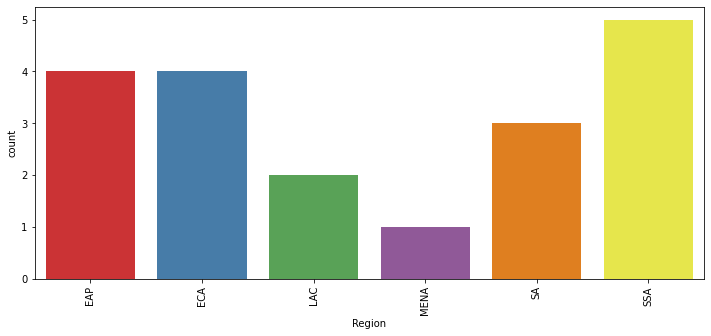

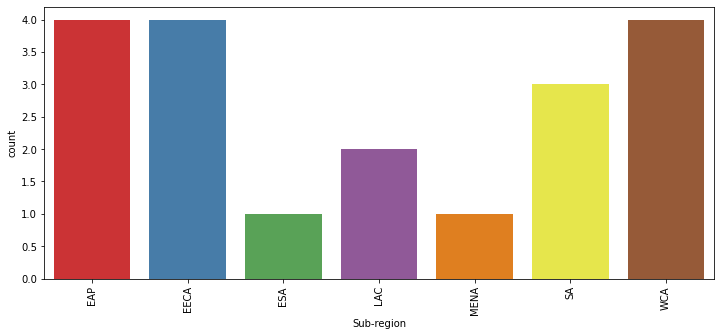

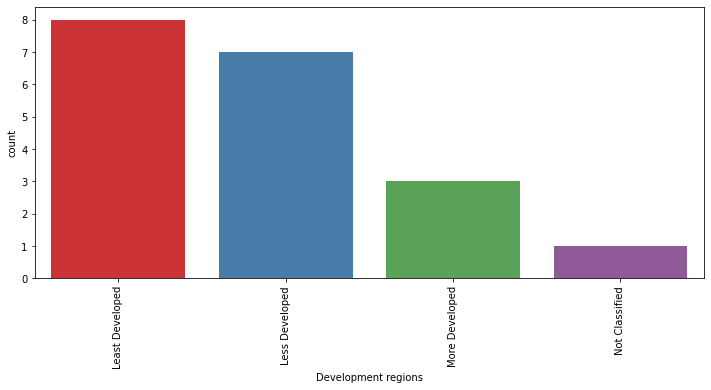

In [19]:
categorialColumns = ['Region','Sub-region','Development regions']
for colName in categorialColumns:
    fig, (ax) = plt.subplots(1,1,figsize=(12,5))
    plt.xticks(rotation=90)
    plotUnivariateFeature(colName,False,df,ax)

## Multivariate Analysis

#### Numeric data 

In [20]:
import math
# Bivariate analysis, can do by category (by gender, by area development) and by group
        
indicatorColNames = list(dfDict.keys())
categoryColNames = ["T","M","F","U","R"]
groupColNames = ["T", "Y","N"]
continuousColumns = list(df.select_dtypes(['float']).columns)

def getPlotMeta(colName):
    indicatorFullFormDict = {
        "ANAR":"Adjusted net attendance rate",
        "OOS":"Out-of-school children rate",
        "Completion":"Completion rate",
        "Reading":"Foundational reading skill",
        "Numeracy":"Foundational numeracy skill"
    }
    eduLvlFullFormDict = {
        "P":"Primary",
        "LS":"Lower Secondary",
        "US":"Upper Secondary",
    }
    categoryFullFormDict = {
        "T":"Total",
        "M":"Male",
        "F": "Female",
        "U":"Urban Area",
        "R":"Rural Area"
    }
    groupFullForm = {
        "T":"Total",
        "Y":"With functional difficulties",
        "N":"Without functional difficulties"
    }

    strSplit = colName.split("_")
    indicator = strSplit[0]
    eduLvl = None
    category = strSplit[-2]
    group = strSplit[-1]

    if indicator == 'ANAR' or indicator == 'OOS' or indicator == 'Completion':
        eduLvl = eduLvlFullFormDict[strSplit[1]]

    indicator = indicatorFullFormDict[indicator]
    ylabel = f"{indicator} {'on ' + eduLvl + ' Level' if eduLvl else ''}"
    # By Country
    if category == "T" and group == "T":
        return {'title': f"{ylabel} By Country"}
    # By Gender and By Country
    elif (category == "M" or category == "F") and group == "T":
        return {'title': f"{ylabel} By Country and Gender", "ylabel":ylabel}
    # By Presence of Disabilities and By Country
    elif (group == "Y" or group == "N") and category == "T":
        return {'title': f"{ylabel} By Country and Presence of Disabilities", "ylabel":ylabel}


#### By Country

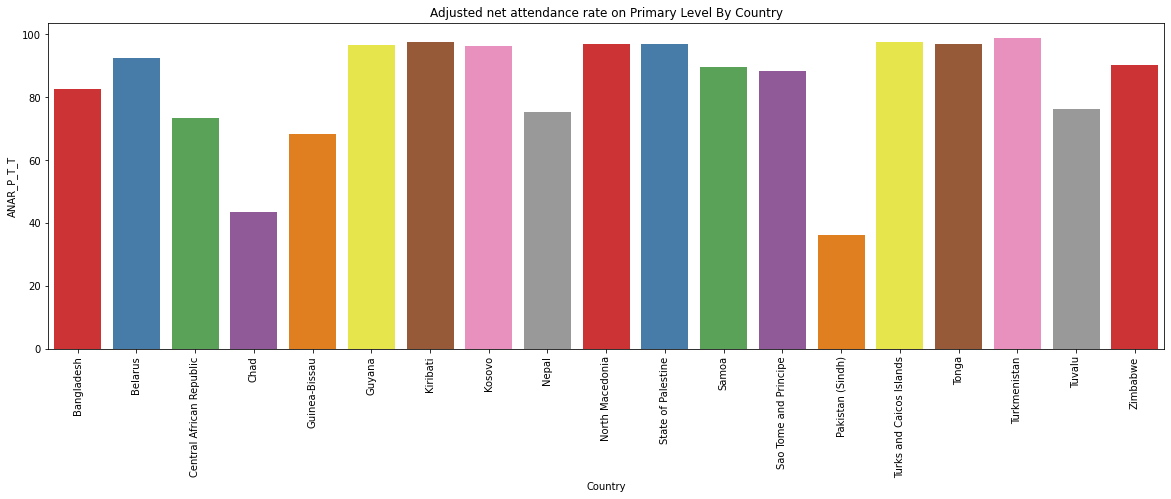

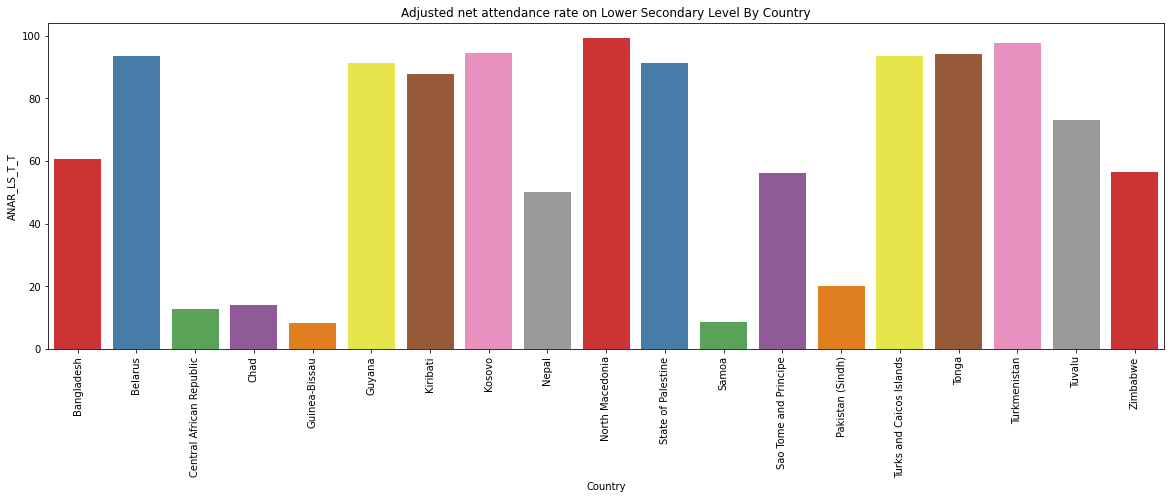

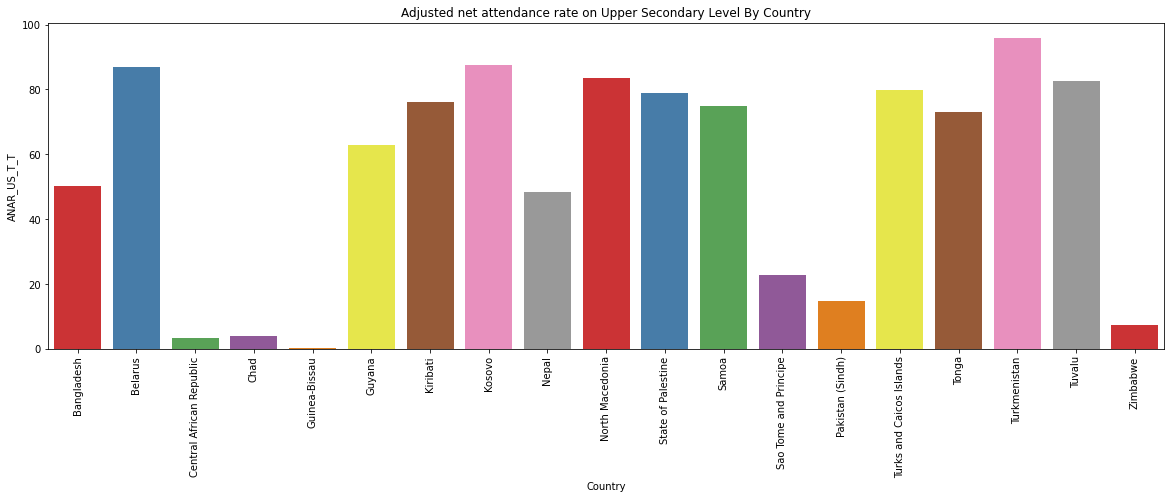

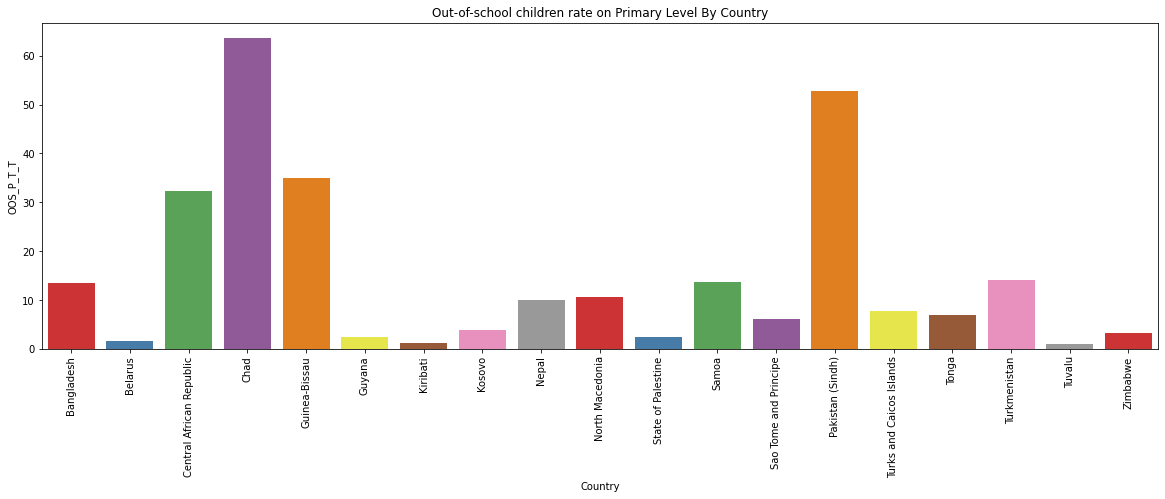

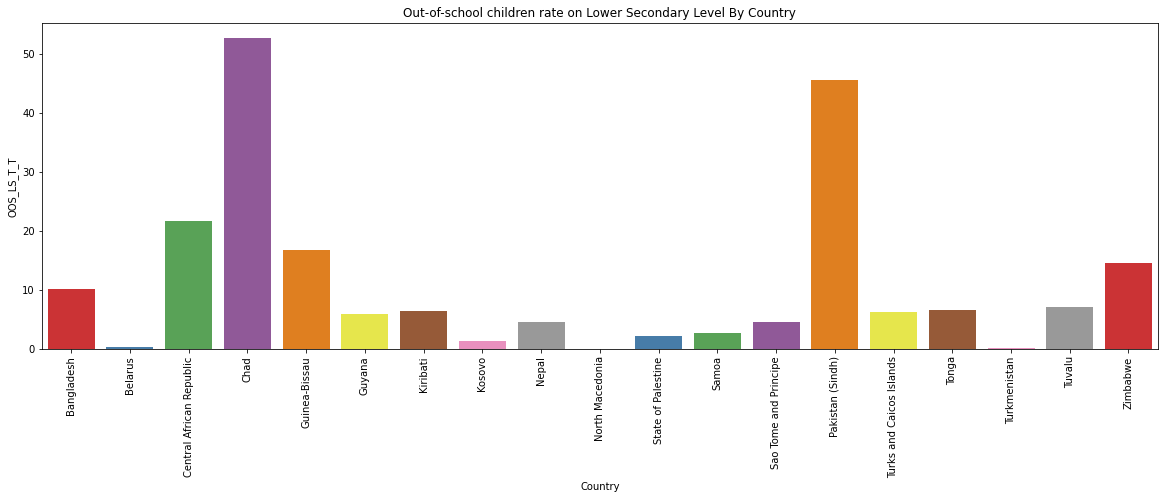

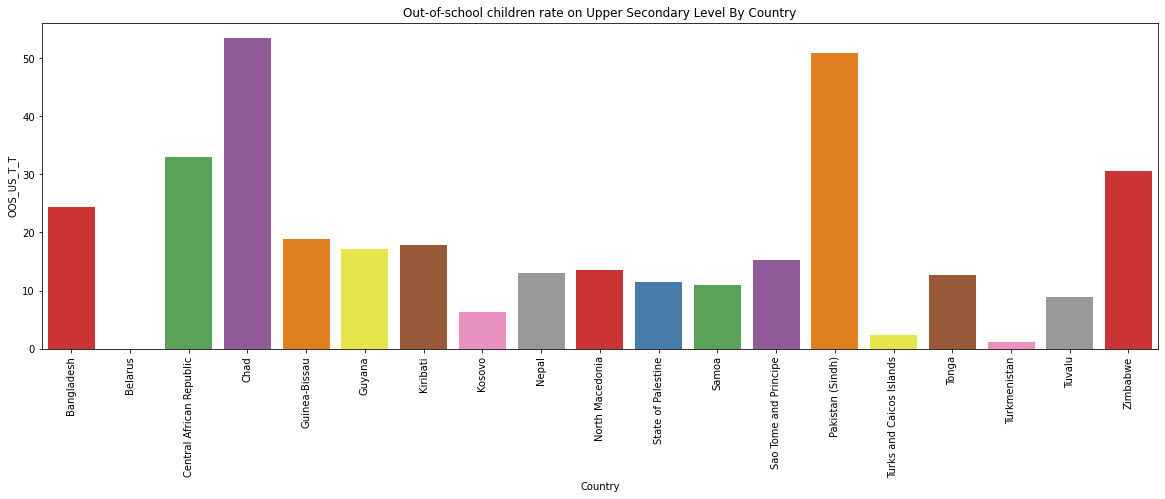

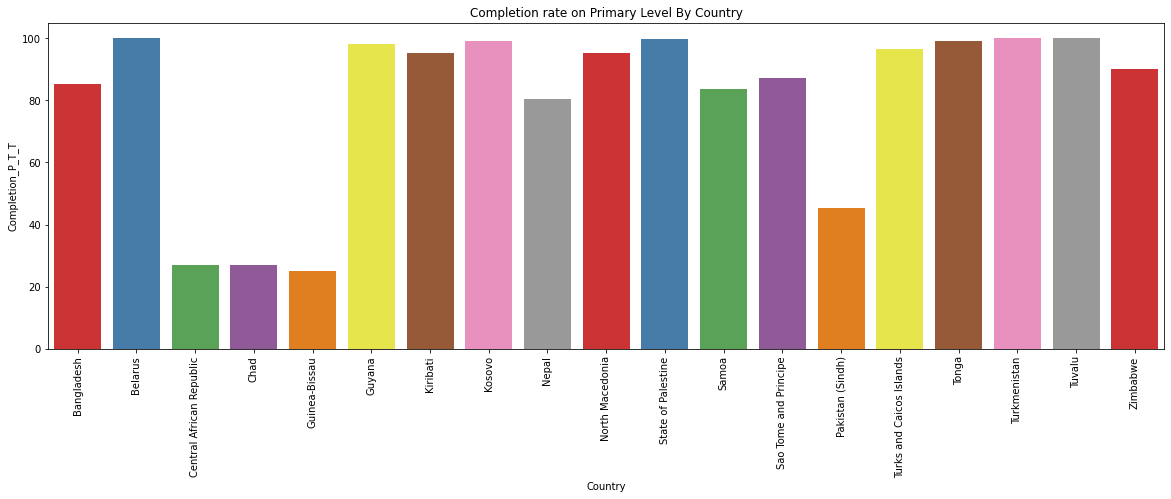

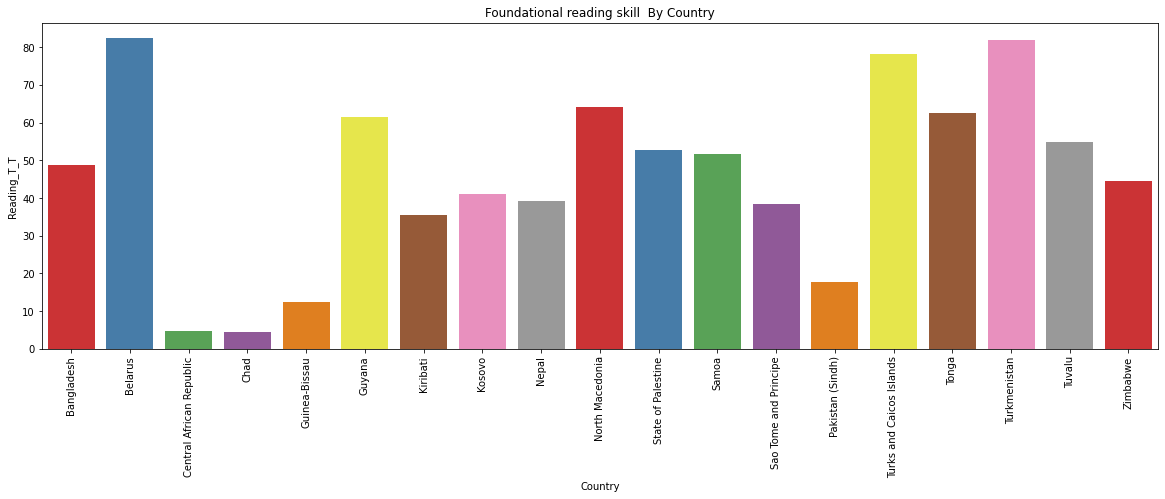

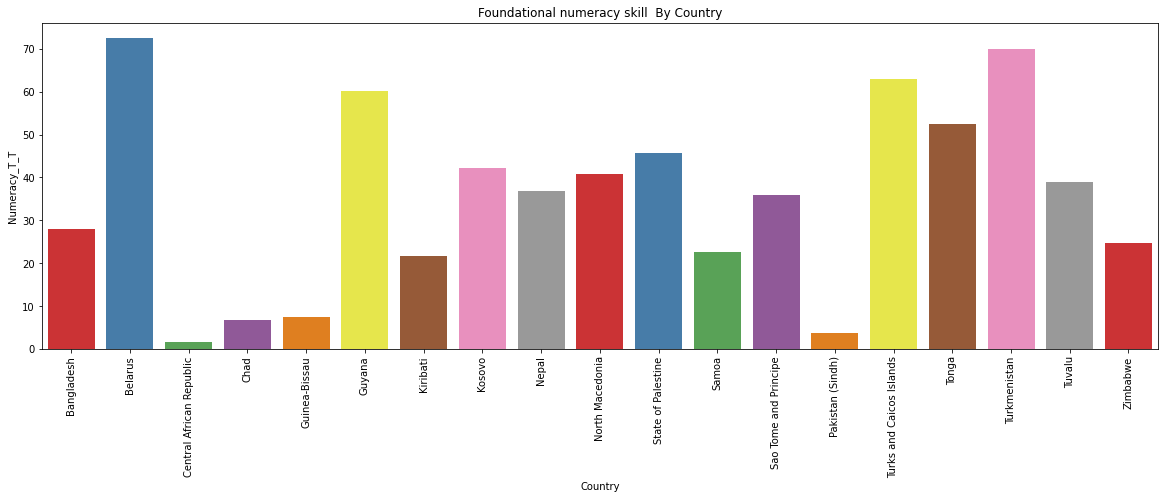

In [21]:
contColsByCountry = [i  for i in continuousColumns if i[-3:] == "T_T"]

for colName in contColsByCountry:
    metaDict = getPlotMeta(colName)
    fig, (ax) = plt.subplots(1,1,figsize=(20,6))
    plt.xticks(rotation=90)
    ax.set_title(metaDict['title'])
    plotBivariateAnalysis('Country',colName,df,ax=ax)

#### By Country and Presence of Disabilities

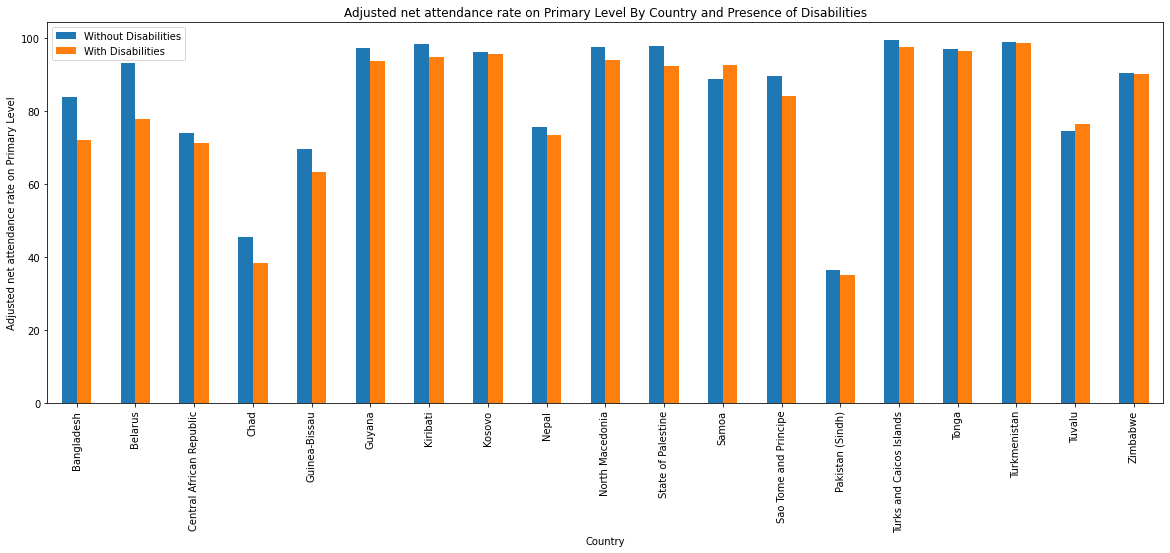

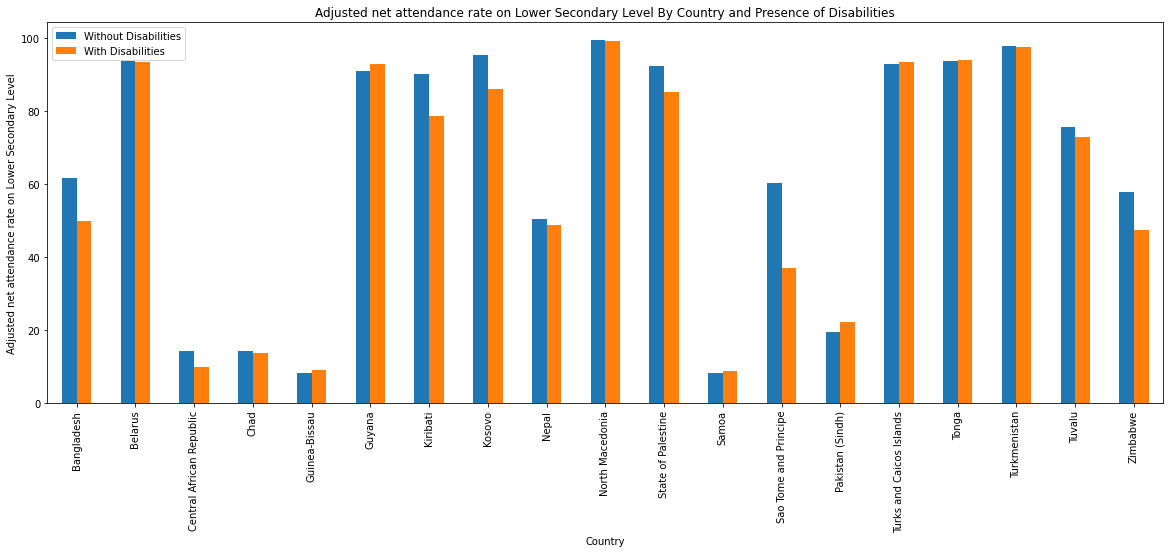

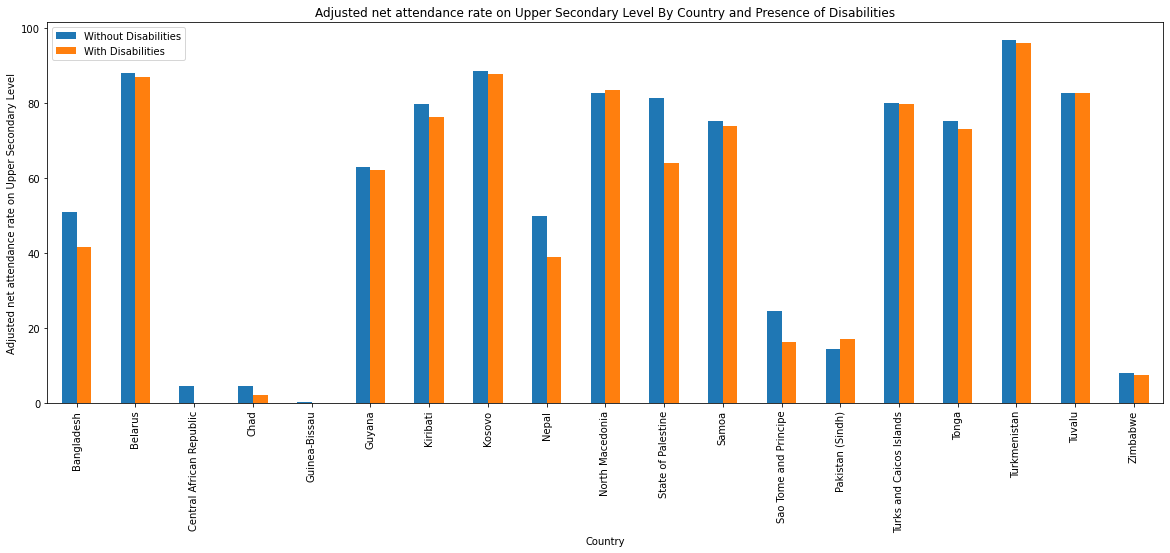

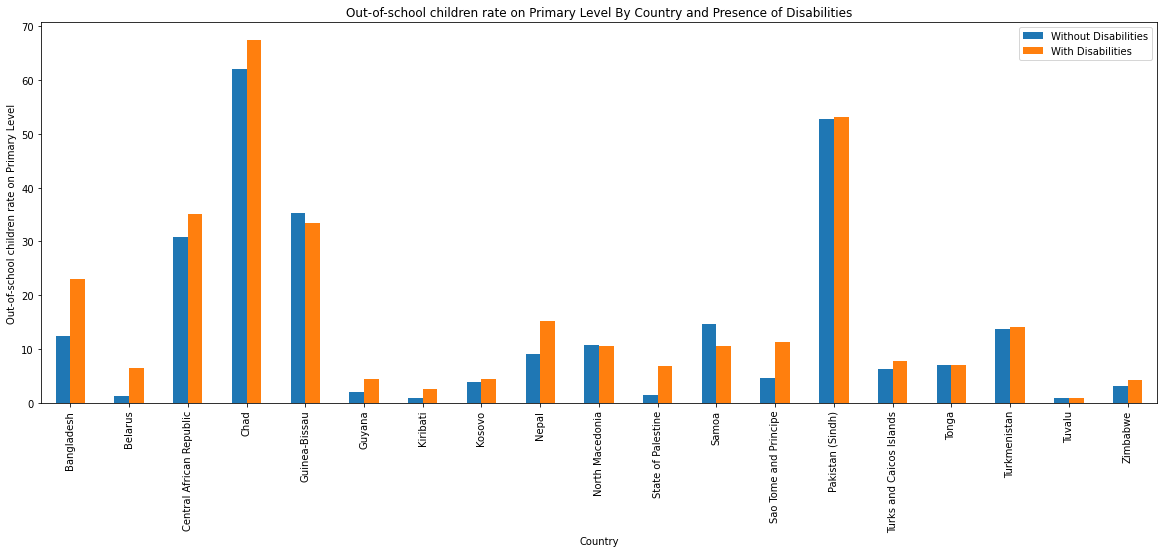

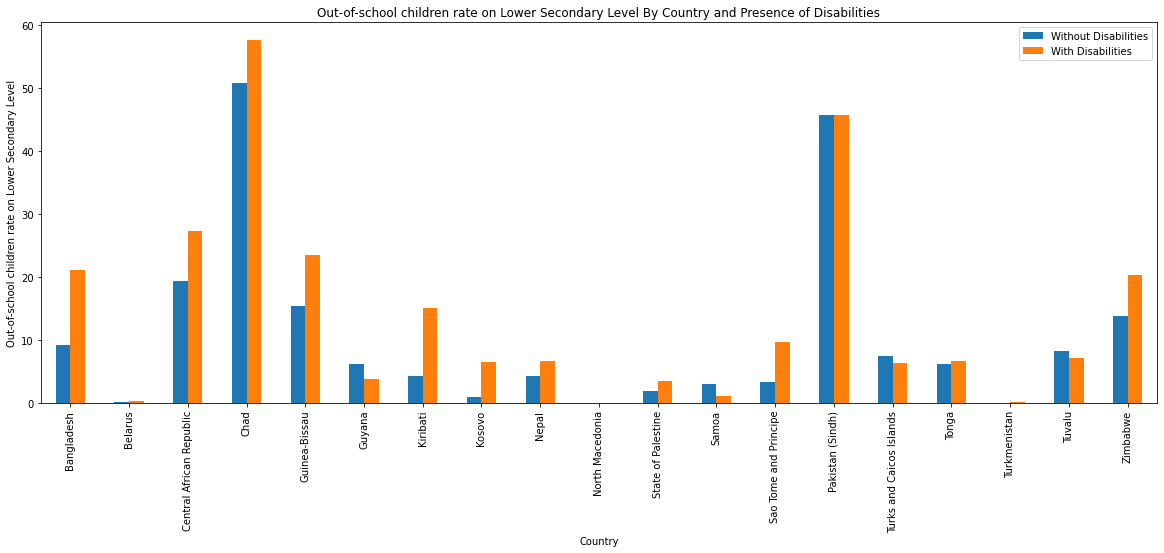

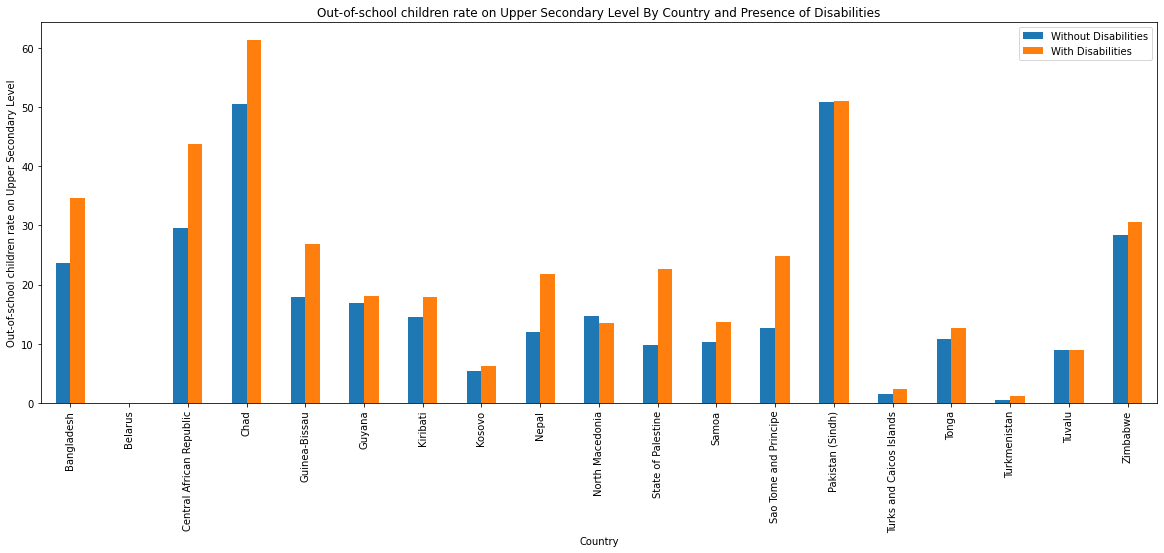

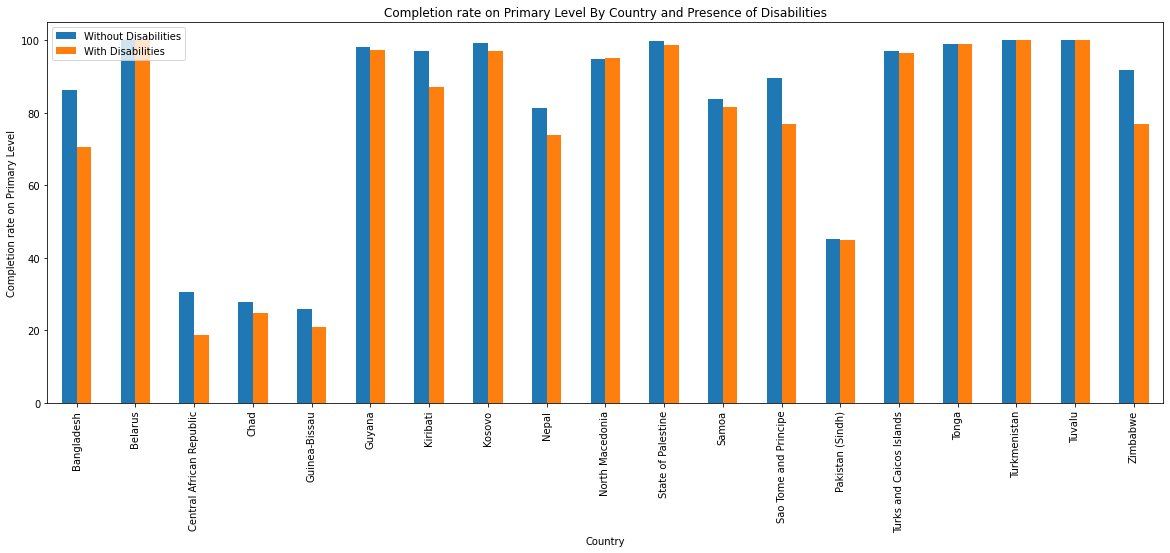

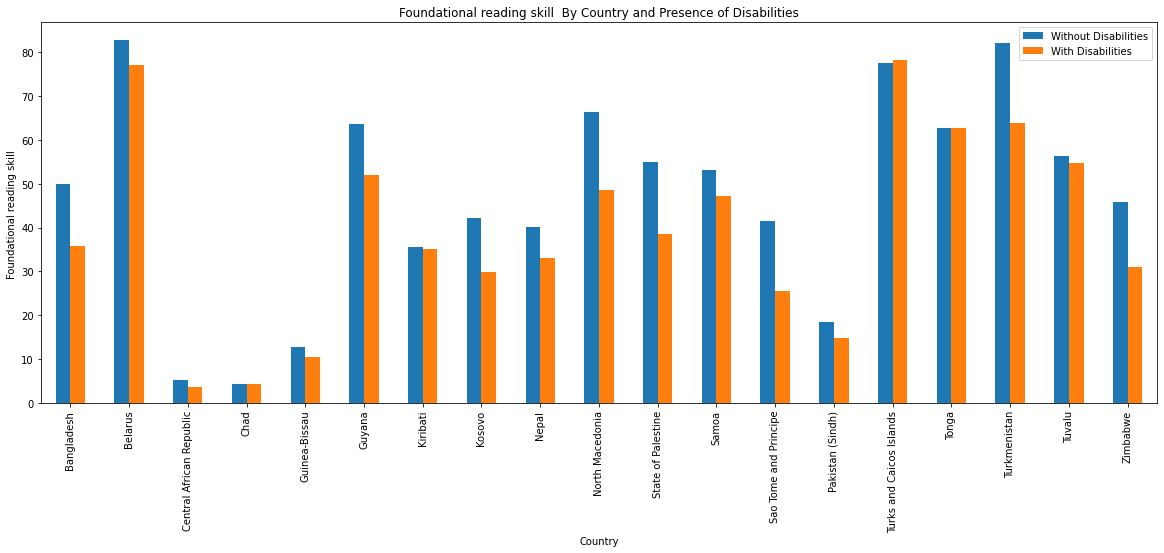

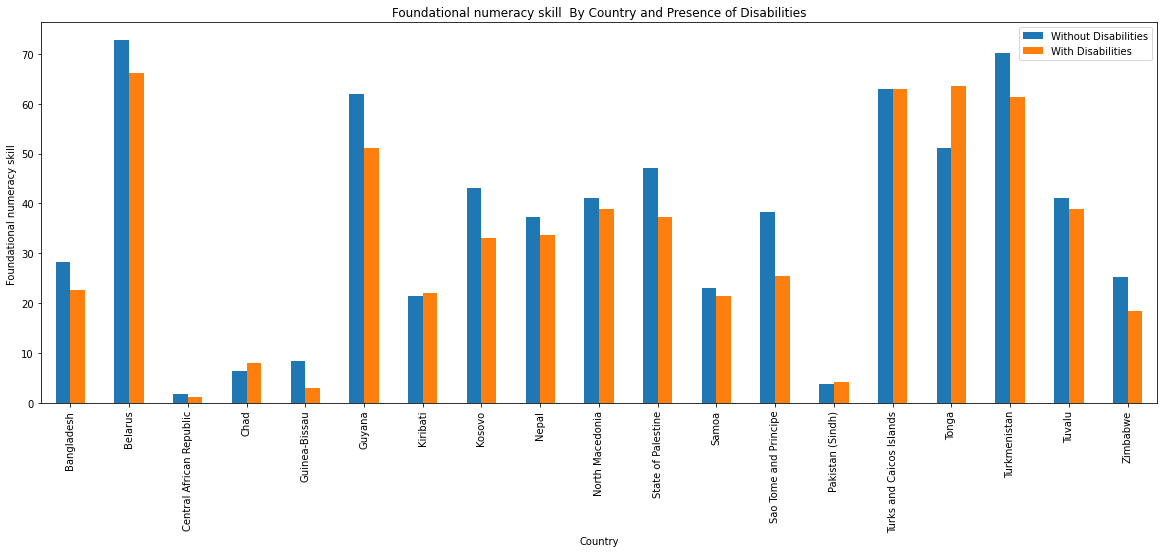

In [22]:
def checkIsDisabilityGroup(col):
    colSplit = col.split("_")
    category = colSplit[-2]
    group = colSplit[-1]

    if (group == "Y" or group == "N") and category == "T":
        return True

contColsByCountryAndPresenceOfDisabilities = [i  for i in continuousColumns if checkIsDisabilityGroup(i)]

for i in range(0,len(contColsByCountryAndPresenceOfDisabilities),2):
    size = len(contColsByCountryAndPresenceOfDisabilities)
    if (i <= size - 1) or (i + 1 <= size - 1):
        y = [contColsByCountryAndPresenceOfDisabilities[i], contColsByCountryAndPresenceOfDisabilities[i+1]]
        metaDict = getPlotMeta(y[0])
        fig, (ax) = plt.subplots(1,1,figsize=(20,7))
        plt.xticks(rotation=90)
        ax.set_ylabel(metaDict['ylabel'])
        ax.set_title(metaDict['title'])
        plotMultivariateAnalysis('Country',y,df,ax=ax)
        ax.legend(["Without Disabilities", "With Disabilities"])

#### By Country and Gender

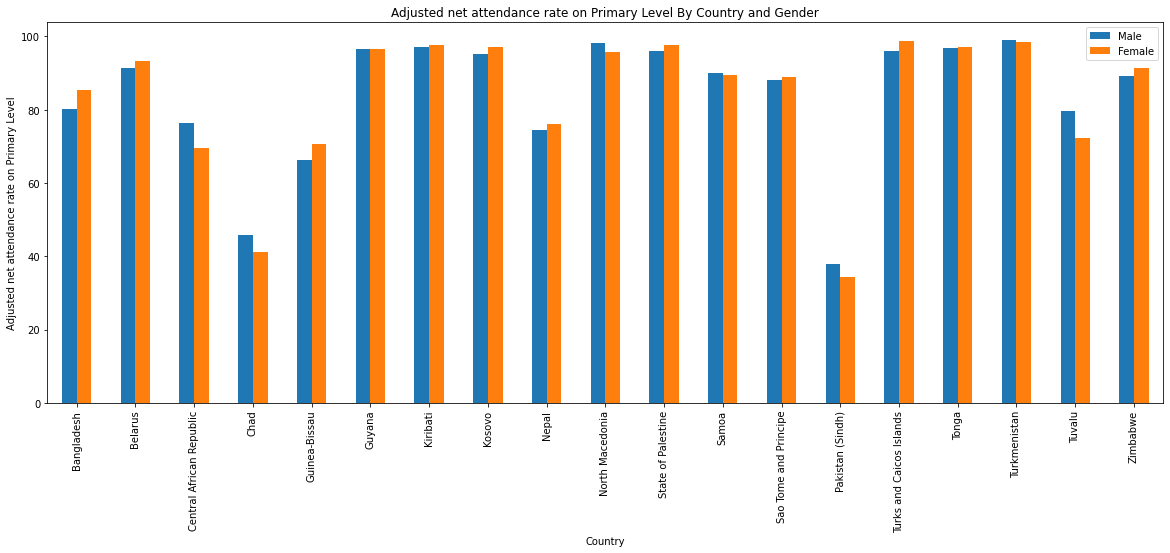

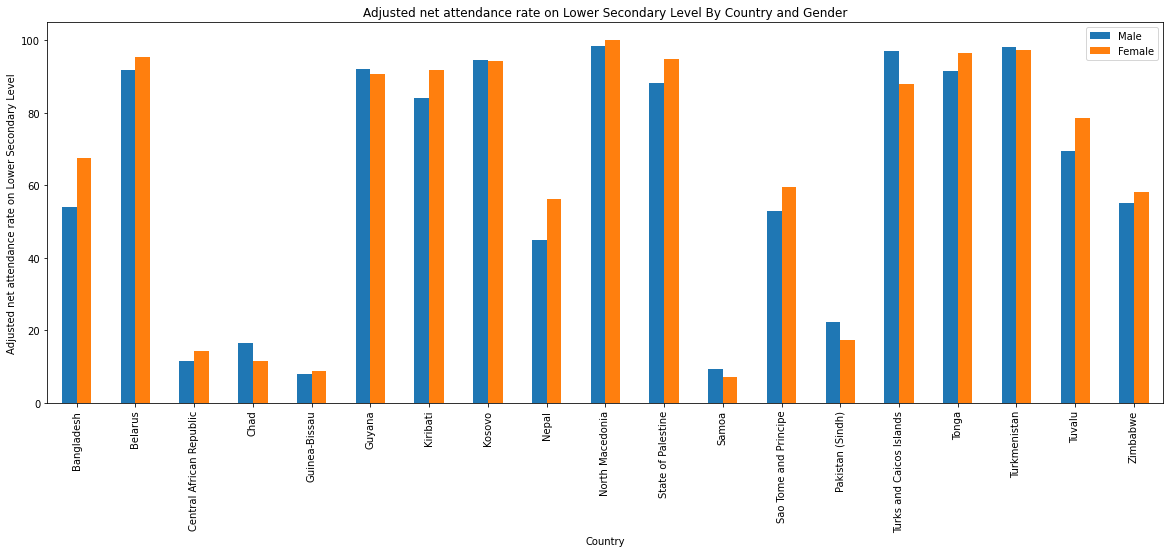

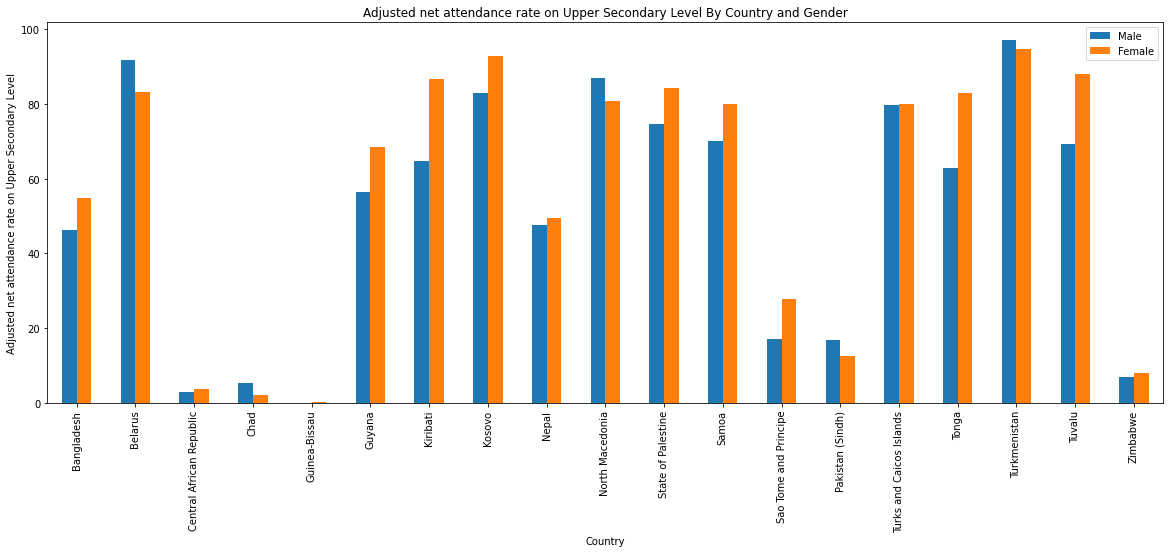

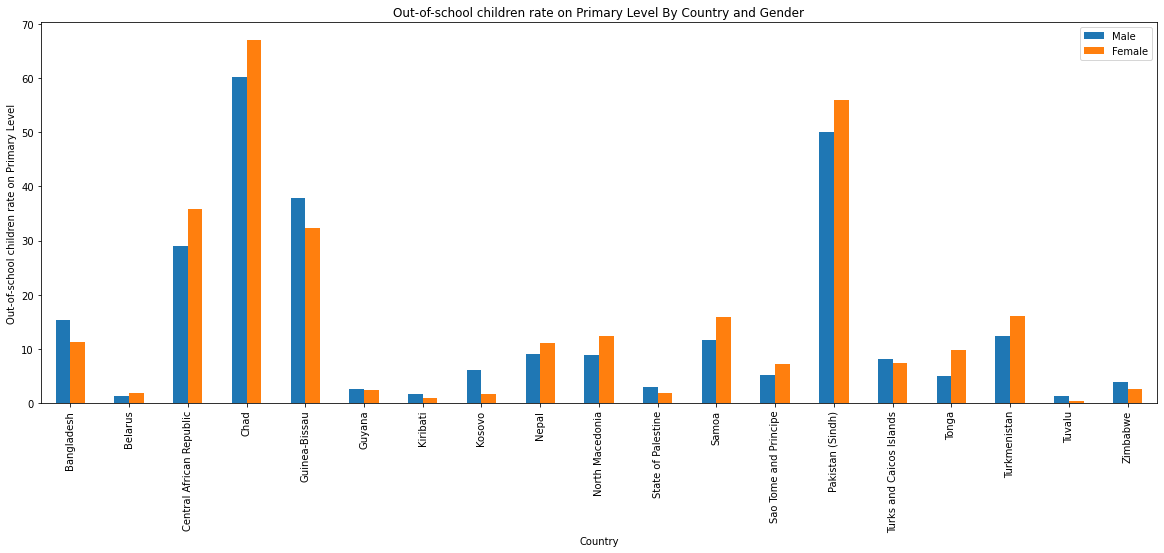

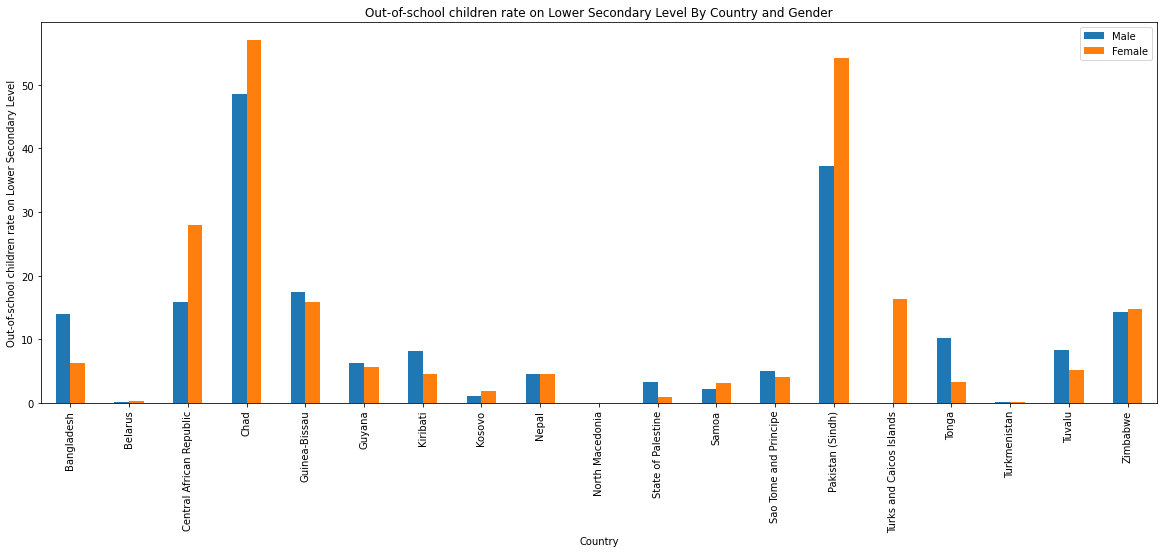

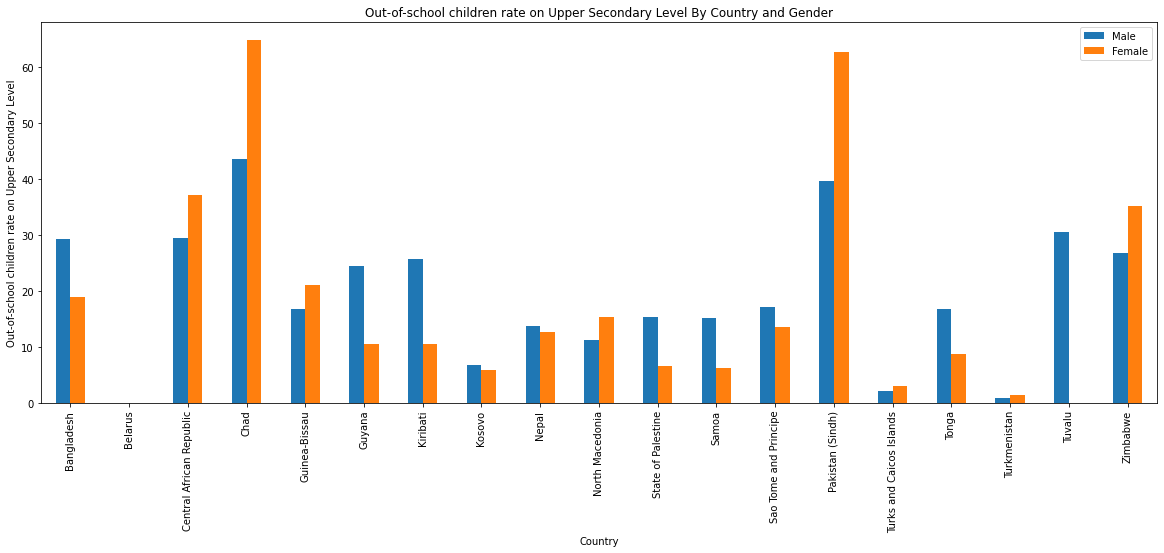

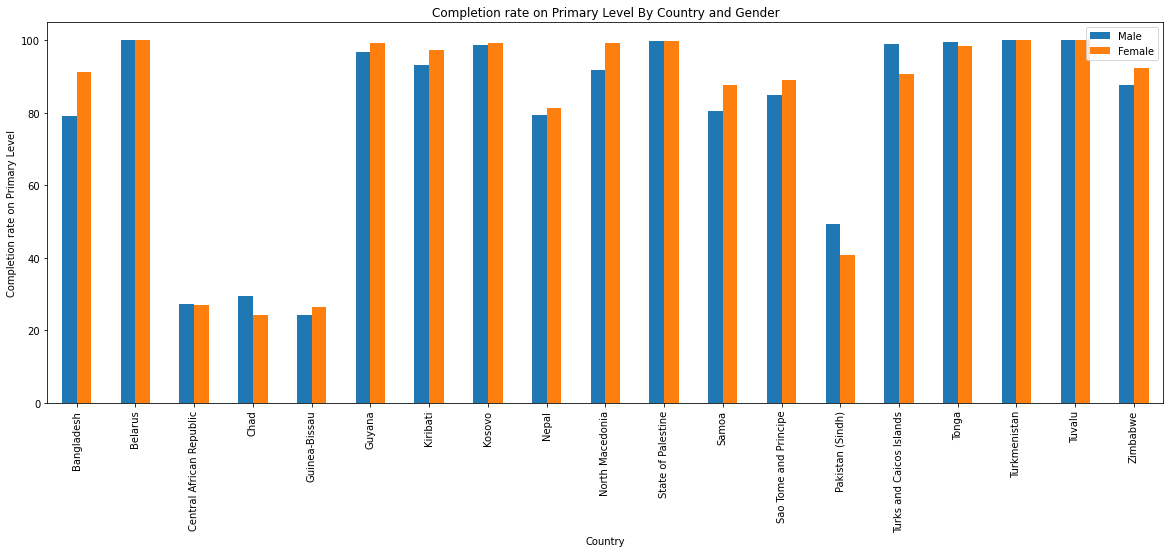

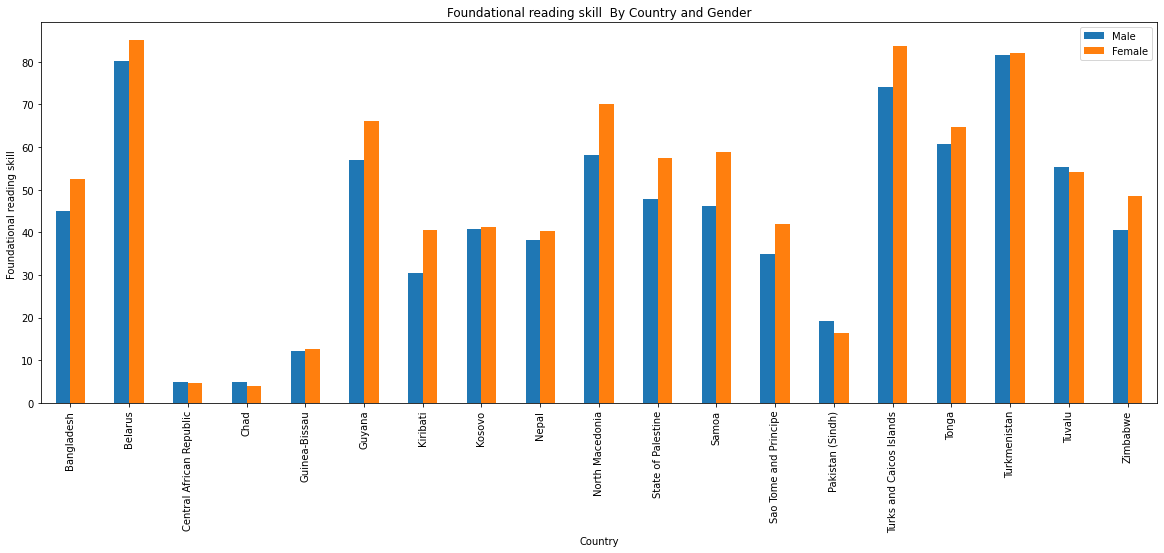

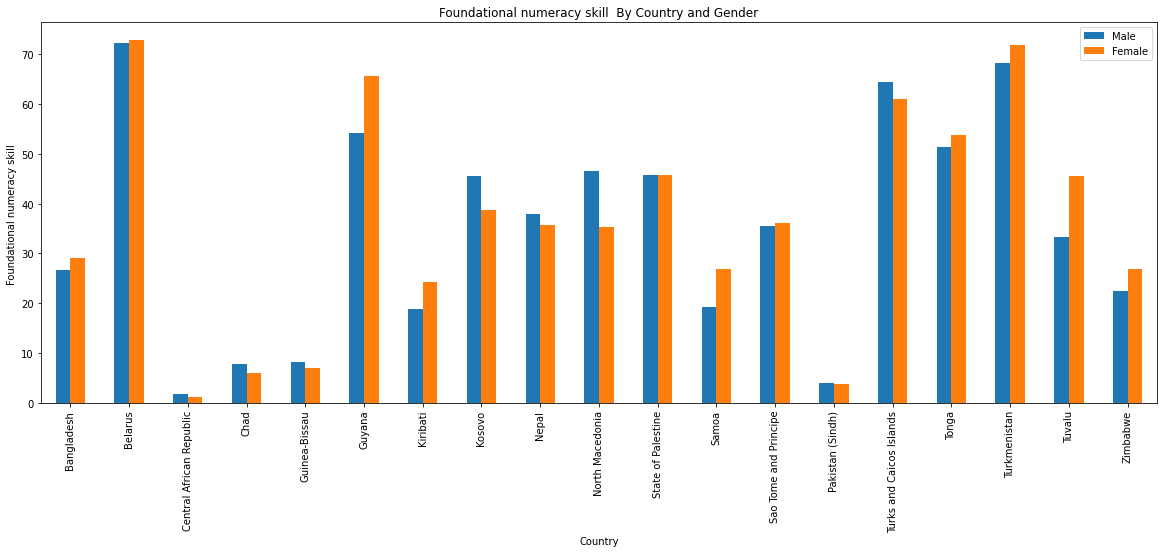

In [23]:
def checkIsGenderCategory(col):
    colSplit = col.split("_")
    category = colSplit[-2]
    group = colSplit[-1]

    if (category == "M" or category == "F") and group == "T":
        return True

continuousColumnsByCountryAndGender = [i  for i in continuousColumns if checkIsGenderCategory(i)]

for i in range(0,len(continuousColumnsByCountryAndGender),2):
    size = len(continuousColumnsByCountryAndGender)
    if (i <= size - 1) or (i + 1 <= size - 1):
        y = [continuousColumnsByCountryAndGender[i], continuousColumnsByCountryAndGender[i+1]]
        metaDict = getPlotMeta(y[0])
        fig, (ax) = plt.subplots(1,1,figsize=(20,7))
        plt.xticks(rotation=90)
        ax.set_ylabel(metaDict['ylabel'])
        ax.set_title(metaDict['title'])
        plotMultivariateAnalysis('Country',y,df,ax=ax)
        ax.legend(["Male", "Female"])

## Descriptive question
Which country has the highest difference in adjusted net attendance rate on each education level between children with disabilities and those without disabilities?


The country with the highest difference of ANAR on Primary education is Belarus
The country with the highest difference of ANAR on Lower Secondary education is Sao Tome and Principe
The country with the highest difference of ANAR on Upper Secondary education is State of Palestine


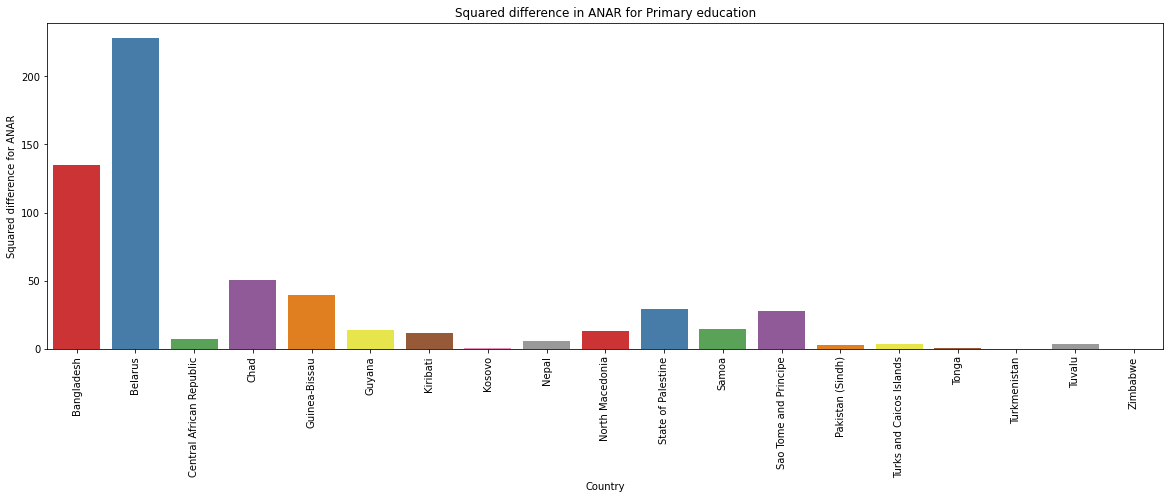

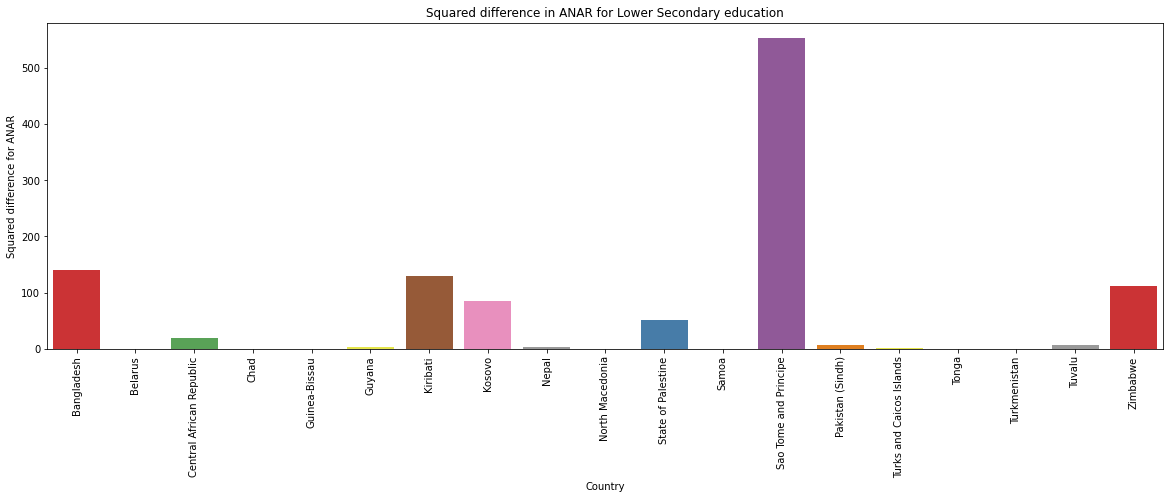

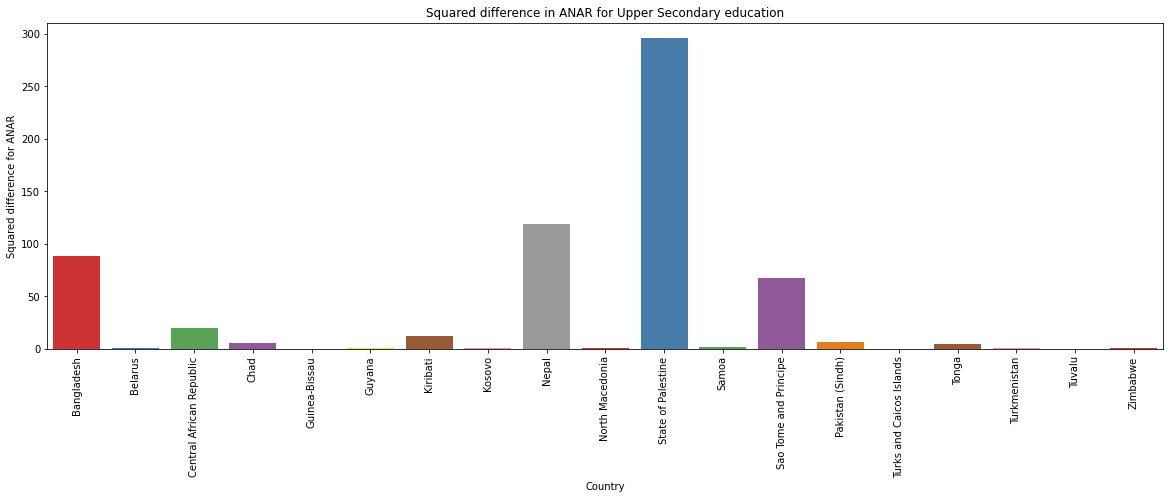

In [24]:
# get all ANAR for the difference between Total_Y and Total_N
primary = df['ANAR_P_T_Y'] - df['ANAR_P_T_N']
low_sec = df['ANAR_LS_T_Y'] - df['ANAR_LS_T_N']
upp_sec = df['ANAR_US_T_Y'] - df['ANAR_US_T_N']

# square the difference
primaryS = primary**2
low_secS = low_sec**2
upp_secS = upp_sec**2

# the highest difference for each category
print("The country with the highest difference of ANAR on Primary education is " + df['Country'][primaryS.idxmax()])
print("The country with the highest difference of ANAR on Lower Secondary education is " + df['Country'][low_secS.idxmax()])
print("The country with the highest difference of ANAR on Upper Secondary education is " + df['Country'][upp_secS.idxmax()])

# plot for visualization
title = ['Squared difference in ANAR for Primary education', 'Squared difference in ANAR for Lower Secondary education', 'Squared difference in ANAR for Upper Secondary education']
data = [primaryS, low_secS, upp_secS]

for i in range(3):
    fig, (ax) = plt.subplots(1,1,figsize=(20,6))
    plt.xticks(rotation=90)
    ax.set_title(title[i])
    ax.set_ylabel('Squared difference for ANAR')
    sns.barplot(df['Country'], data[i], palette=GLOBALPALETTE, ax=ax)


- First, we get the difference of ANAR between the children with disabilities and without disabilities for each country
- To get the highest difference of ANAR, we squared the output and find the max value of all the countries by each education category
- Then, we returned an index from the max value and output the name of the country that has the highest difference in ANAR for each education category
- To visualize the difference of ANAR for each country, we plotted 3 bar plots indicating the squared difference in ANAR between children with disabilities and wihtout disabilites for each of the country

## Mechanistic question
How does area development in a country lead to differences in adjusted net attendance rate on each education level in children with disabilities?

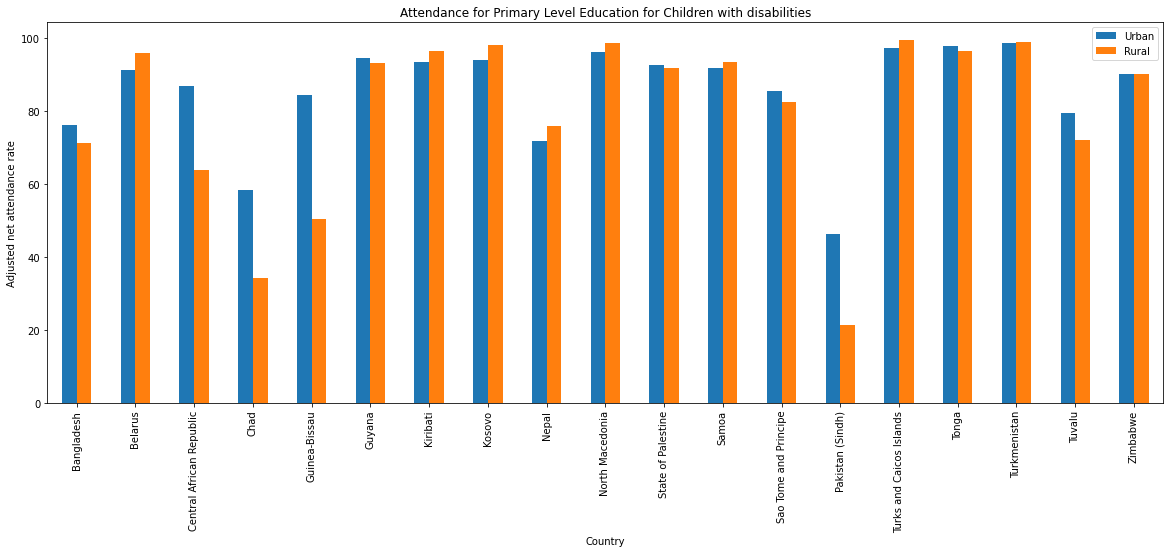

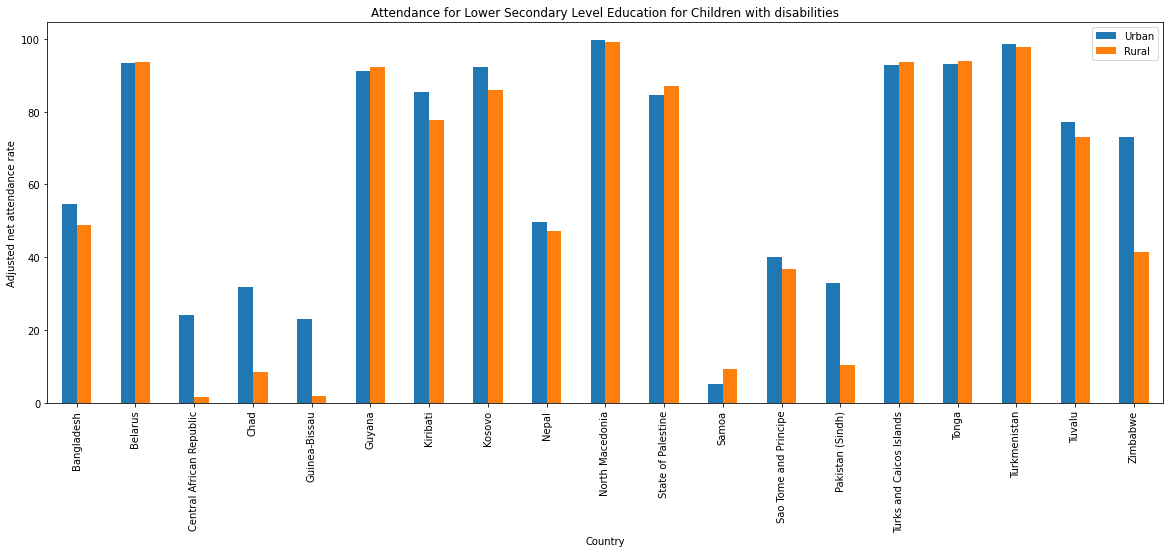

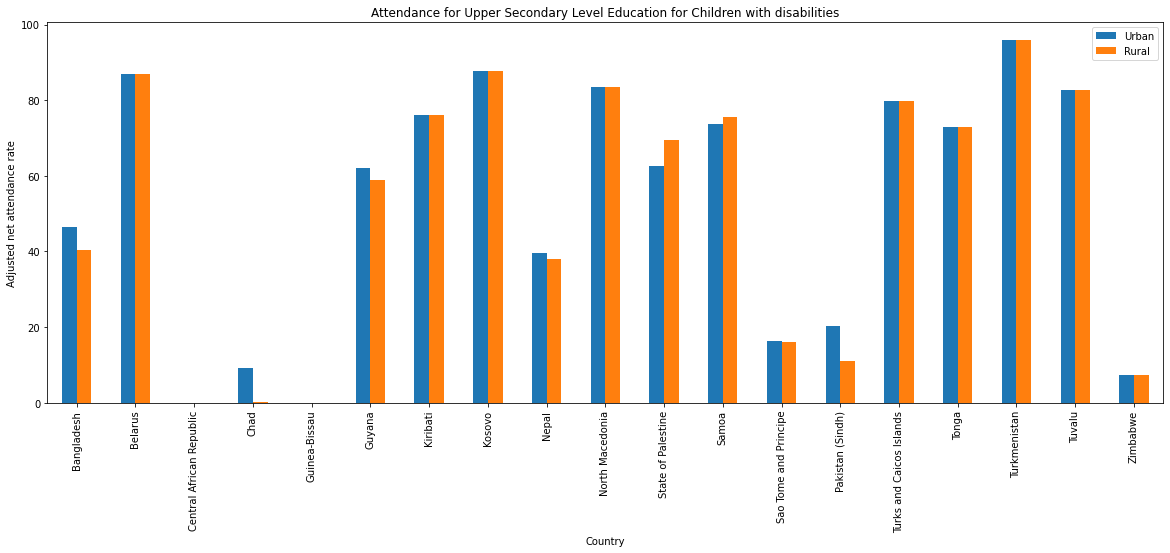

In [25]:
# barplot to visualize the ANAR for each country
atdEdcLvl = {
    "Attendance for Primary" : "ANAR_P",
    "Attendance for Lower Secondary" : "ANAR_LS",
    "Attendance for Upper Secondary" : "ANAR_US"
}

disDict = {"Urban" : "U_Y", "Rural":"R_Y"}

# Prealocate 3 plots
for name, colName in atdEdcLvl.items():
    y = [colName + "_" + disDict["Urban"], colName + "_" + disDict["Rural"]]

    fig, (ax) = plt.subplots(1,1,figsize=(20,7))
    plt.xticks(rotation=90)

    ax.set_ylabel("Adjusted net attendance rate")
    ax.set_title(name + " Level Education for Children with disabilities")

    plotMultivariateAnalysis('Country',y,df,ax=ax)
    ax.legend(["Urban", "Rural"])

- We first plot 3 bar plots for each of the education level respectively to visualize the differences between the ANAR and the area development in each country
- For most countries, we can see that there are no significant difference between the urban and rural areas in terms of ANAR for all education level on the children with disabilities
- However, there are certain countries that have significant difference between the urban and rural areas 
    - For example in Primary Education: Chad, Guiniea-Bissau, Central African Republic, and Pakistan
    - 3 of these countries are located in Sub-Saharan Africa which is the poorest sub-continent in the world
- There are even some countries like Central African Republic and Guiniea-Bissau that doesn't not even have the attendance rate in the Upper Secondary Level Education
    - These countries are both least developed in terms of development
- We are required to plot a boxplot for the Total ANAR for each area development on Children with disabilities to visualize further

Urban Outliers
Pakistan (Sindh) 46.2
Chad 58.2
count    19.000000
mean     85.526316
std      14.010149
min      46.200000
25%      81.850000
50%      91.300000
75%      94.150000
max      98.500000
Name: ANAR_P_U_Y, dtype: float64

Rural Outliers
Pakistan (Sindh) 21.2
Chad 34.3
count    19.000000
mean     80.157895
std      23.126423
min      21.200000
25%      71.550000
50%      91.700000
75%      96.300000
max      99.300000
Name: ANAR_P_R_Y, dtype: float64


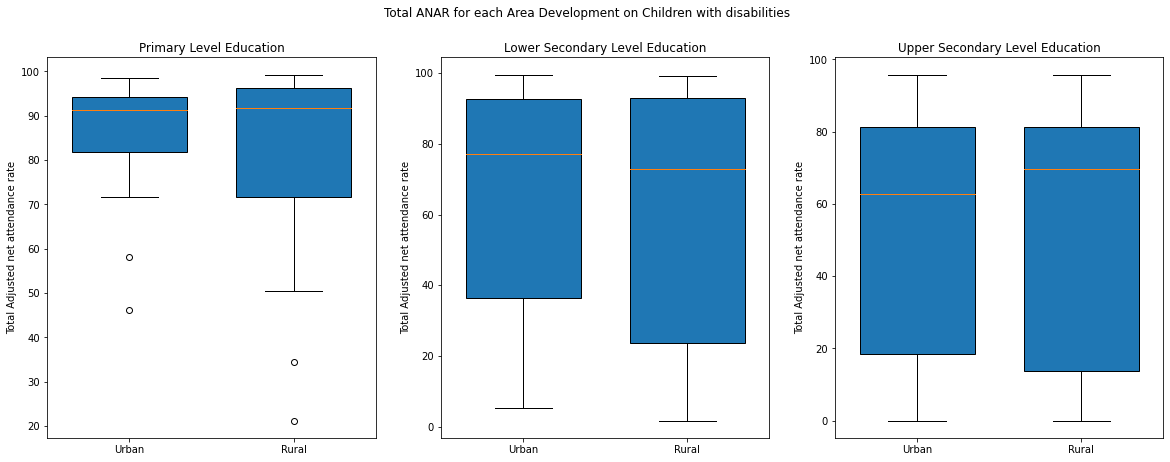

In [26]:
# boxplot of total ANAR to visualize the differences
atdEdcLvl = {
    "Primary" : "ANAR_P",
    "Lower Secondary" : "ANAR_LS",
    "Upper Secondary" : "ANAR_US"
}

disDict = {"Urban" : "U_Y", "Rural":"R_Y"}

fig, ax = plt.subplots(1,3,figsize=(20,7))
i = 0
plt.suptitle("Total ANAR for each Area Development on Children with disabilities")
for name, colName in atdEdcLvl.items():
    data = [ df[colName + "_" + disDict["Urban"]] ,  df[colName + "_" + disDict["Rural"]] ]
    ax[i].set_ylabel("Total Adjusted net attendance rate")
    ax[i].set_title(name + " Level Education")
    ax[i].boxplot(data, patch_artist=True, labels = ["Urban", "Rural"], widths=0.7)
    i += 1

idx = df['ANAR_P_U_Y'].nsmallest(2).index

print("Urban Outliers")
for i in idx:
    print(df['Country'][i], df['ANAR_P_U_Y'][i])
print(df['ANAR_P_U_Y'].describe())

idx = df['ANAR_P_R_Y'].nsmallest(2).index

print("\nRural Outliers")
for i in idx:
    print(df['Country'][i], df['ANAR_P_R_Y'][i])
print(df['ANAR_P_R_Y'].describe())


- From the box plots above, we even also conclude that there isn't much difference between the Urban and Rural Area of the countries as the box plots are overlapped by a significant amount
    - Thus, there should be no association
- We also managed observed significantly larger interquartile range (IQR) for the rural areas in earlier education compare to the later education. This means that the dispairity in attendance rate for children with disabilities in rural areas for earlier education is much higher than the urban areas.
- The Primary level education has a higher ANAR than the Lower and Upper Secondary level education
- There are some outliers in the Primary level education, which are Pakistan (Sindh) and Chad
- For the lower secondary level education, the disparity between the urban and rural areas reduce which can be observed with less difference IQR compared to the primary level education.
- For the upper secondary level education, the rural area is observed with a higher median of ANAR compared to the urban areas. 

## Causal question 
Does the presence of disabilities in children lead to a decrease in the adjusted net attendance rate on each education level? 


            ANAR_P_T_N  ANAR_P_T_Y
ANAR_P_T_N    1.000000    0.971976
ANAR_P_T_Y    0.971976    1.000000
             ANAR_LS_T_N  ANAR_LS_T_Y
ANAR_LS_T_N     1.000000     0.981469
ANAR_LS_T_Y     0.981469     1.000000
             ANAR_US_T_N  ANAR_US_T_Y
ANAR_US_T_N     1.000000     0.989917
ANAR_US_T_Y     0.989917     1.000000


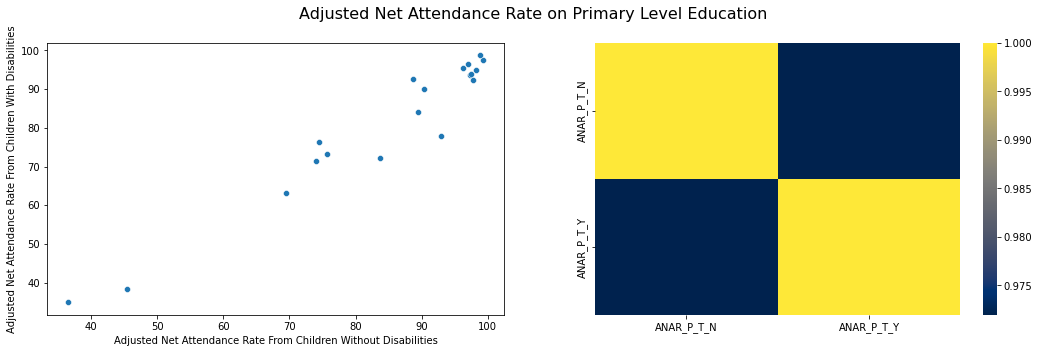

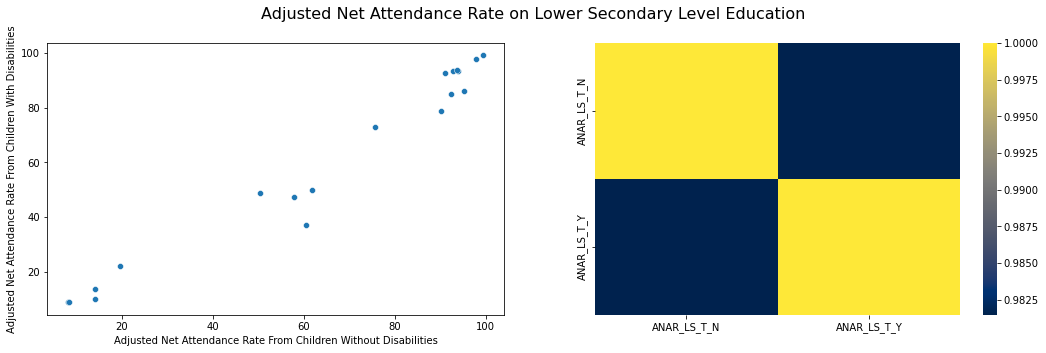

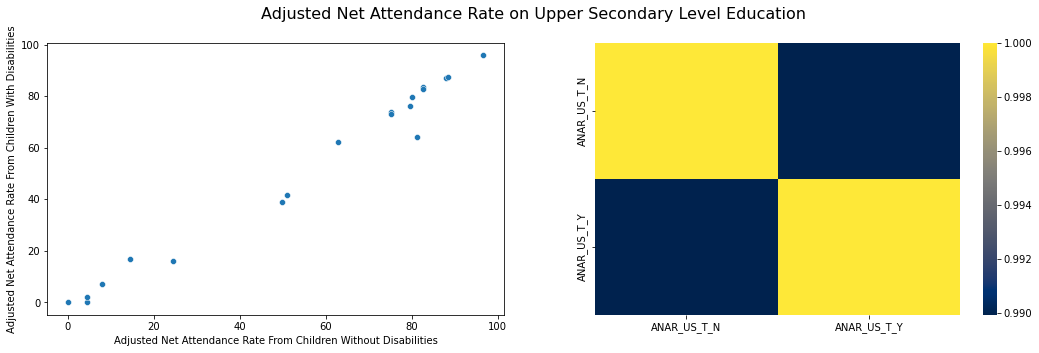

In [27]:
# Correlation analysis, scatterplot for adjusted net attendance rate on each education level from different groups
atdEdcLvl = {
    "Adjusted Net Attendance Rate on Primary" : "ANAR_P",
    "Adjusted Net Attendance Rate on Lower Secondary" : "ANAR_LS",
    "Adjusted Net Attendance Rate on Upper Secondary" : "ANAR_US"
}

disDict = {"Disable" : "T_Y", "Not Disable":"T_N"}

for name, colName in atdEdcLvl.items():
    x = colName + "_" + disDict["Not Disable"]
    y = colName + "_" + disDict["Disable"]
    
    fig, (ax1, ax2) = plt.subplots(1, ncols=2, figsize=(18,5)) 
    fig.suptitle(name + " Level Education", fontsize=16)
    tempDfCorr = df[[x,y]].corr()
    print(tempDfCorr)
    ax1.set_xlabel('Adjusted Net Attendance Rate From Children Without Disabilities')
    ax1.set_ylabel('Adjusted Net Attendance Rate From Children With Disabilities')
    sns.scatterplot(x, y, data=df, ax=ax1)
    sns.heatmap(tempDfCorr, cmap='cividis',ax=ax2)


- We have conducted correlation analysis of total adjusted net attendance rate between the group of children with disabilities and the group of children without disabilities
    - As we are using bivariate column/features to do correlation analysis
    - Let's assume that if the relationship between the variables is strongly positively correlated, we can conclude that the presence of disabilities does not affect the total adjusted net attendance rate. It is because that it is logical to conclude that the variation in total adjusted net attendance rate cannot be explained by the  presence of disabilities as the higher the amount, the higher the rate and vice versa
    - However, if the relationship between the variables is strongly negatively correlated, we can conclude that the presence of disabilities does affect the total adjusted net attendance rate. It is because that it is logical to conclude that the variation in total adjusted net attendance rate can be explained by the presence of disabilities
- Referred from scatterplots and heat maps above,
    - On primary level education, lower secondary level education and upper secondary level education, all show strong positive correlations

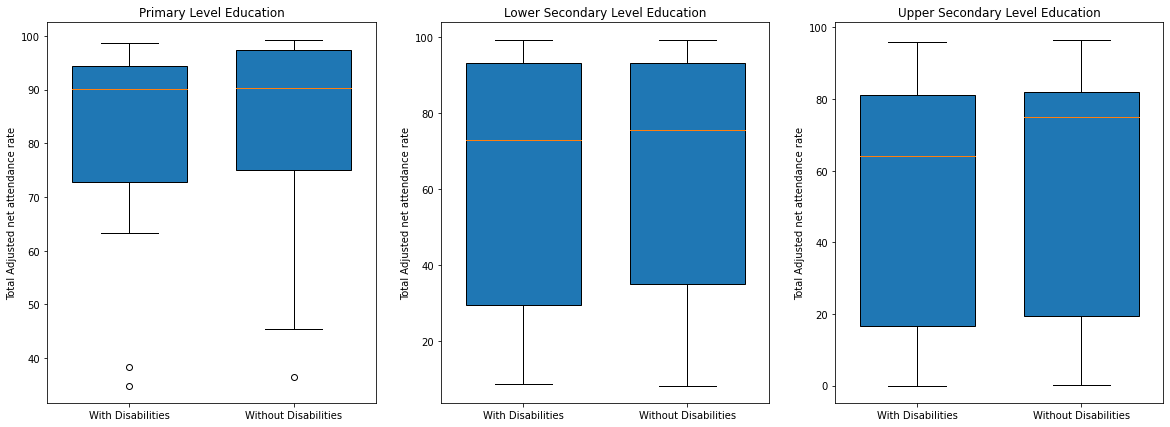

In [28]:
# Boxplots for adjusted net attendance rate on each education level from different groups
atdEdcLvl = {
    "Primary" : "ANAR_P",
    "Lower Secondary" : "ANAR_LS",
    "Upper Secondary" : "ANAR_US"
}

disDict = {"Disable" : "T_Y", "Not Disable":"T_N"}


fig, ax = plt.subplots(1,3,figsize=(20,7))
i = 0
for name, colName in atdEdcLvl.items():
    data = [df[colName + "_" + disDict["Disable"]] ,  df[colName + "_" + disDict["Not Disable"]] ]
    ax[i].set_ylabel("Total Adjusted net attendance rate")
    ax[i].set_title(name + " Level Education")
    ax[i].boxplot(data, patch_artist=True, labels = ["With Disabilities", "Without Disabilities"],   widths=0.7)
    i+=1
    

- Referred from boxplots above,
    - On primary level education, lower secondary level education and upper secondary level education, the boxes from different groups overlap, thus there is no association
- In conclusion, we could conclude that there is no relationship between the adjusted net attendance rate on each education level with the presence of disabilities in children
- According to Global Education Monitoring Report 2020 (UNESCO, 2020), it states that discontinuity in disability definitions can affect education indicators. As a result, The different approaches’ dramatic effect on estimates of disability prevalence hampers interpretation of education indicators disaggregated by disability.
- In summary, due to the inconsistencies in data collection methods, the dataset is not able to explain the education indicators disaggregated by disability such as adjusted net attendance rate. Therefore, we could not figure out any association between the adjusted net attendance rate on each education level with the presence of disabilities in children as proven from the data exploration earlier

## Exploratory question

What is the relationship between the percentage of children achieving minimum proficiency in numeracy with the presence of disabilities in children?

              Numeracy_T_N  Numeracy_T_Y
Numeracy_T_N      1.000000      0.964163
Numeracy_T_Y      0.964163      1.000000


<AxesSubplot:>

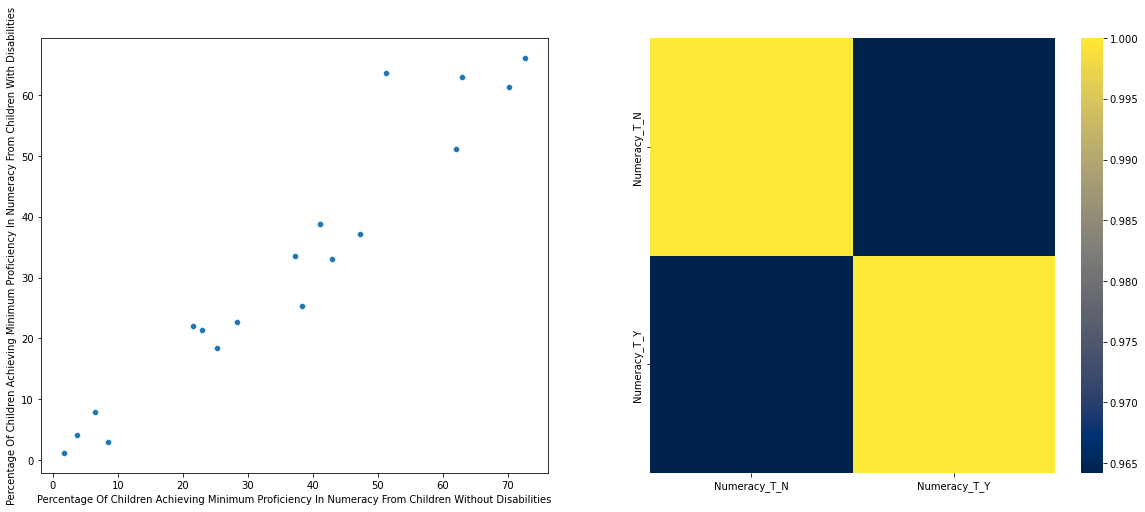

In [29]:
# Correlation analysis, scatterplot for the percentage of children achieving minimum proficiency in numeracy from different groups
colName = 'Numeracy'

disDict = {"Disable" : "T_Y", "Not Disable":"T_N"}

x = colName + "_" + disDict["Not Disable"]
y = colName + "_" + disDict["Disable"]

fig, (ax1, ax2) = plt.subplots(1, ncols=2, figsize=(20,8)) 
tempDfCorr = df[[x,y]].corr()
print(tempDfCorr)
ax1.set_xlabel('Percentage Of Children Achieving Minimum Proficiency In Numeracy From Children Without Disabilities')
ax1.set_ylabel('Percentage Of Children Achieving Minimum Proficiency In Numeracy From Children With Disabilities')
sns.scatterplot(x, y, data=df, ax=ax1)
sns.heatmap(tempDfCorr, cmap='cividis',ax=ax2)

- We have conducted correlation analysis of percentage of children achieving minimum proficiency in numeracy between the group of children with disabilities and the group of children without disabilities
    - As we are using bivariate column/features to do correlation analysis
    - Let's assume that if the relationship between the variables is strongly positively correlated, we can conclude that the presence of disabilities does not affect the percentage of children achieving minimum proficiency in numeracy. It is because that it is logical to conclude that the variation in percentage of children achieving minimum proficiency in numeracy cannot be explained by the  presence of disabilities as the higher the amount, the higher the percentage and vice versa
    - However, if the relationship between the variables is strongly negatively correlated, we can conclude that the presence of disabilities does affect the percentage of children achieving minimum proficiency in numeracy. It is because that it is logical to conclude that the variation in percentage of children achieving minimum proficiency in numeracy can be explained by the presence of disabilities
- Referred from scatterplots and heat maps above,
    - It show strong positive correlation

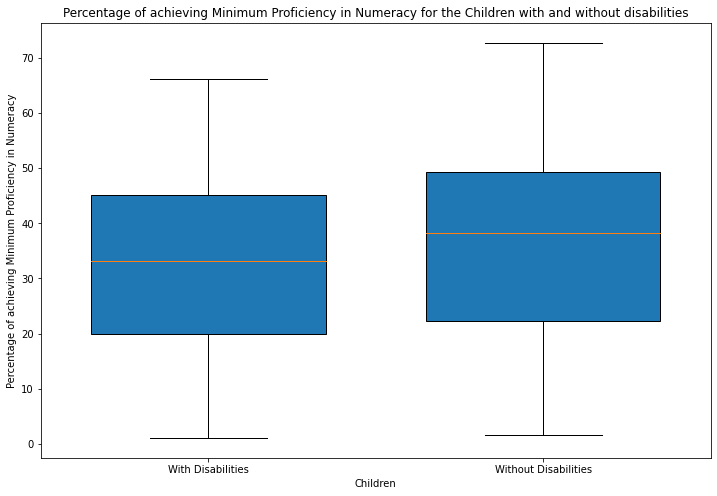

In [30]:
# Boxplots for percentage of children achieving minimum proficiency in numeracy from different groups

disDict = {"Disable" : "T_Y", "Not Disable":"T_N"}

fig, ax = plt.subplots(1,1,figsize=(12,8))

data = [df[colName + "_" + disDict["Disable"]] ,  df[colName + "_" + disDict["Not Disable"]] ]
ax.set_ylabel("Percentage of achieving Minimum Proficiency in Numeracy")
ax.set_xlabel("Children")
ax.set_title("Percentage of achieving Minimum Proficiency in Numeracy for the Children with and without disabilities")
ax.boxplot(data, patch_artist=True, labels = ["With Disabilities", "Without Disabilities"],   widths=0.7)
plt.show()

- Referred from boxplots above,
    - the boxes from different groups overlap, thus there is no association
- In conclusion, we would conclude that there is no relationship between the percentage of children achieving minimum proficiency in numeracy with the presence of disabilities in children

## Predictive question

What kind of country will have a higher percentage of children achieving minimum proficiency in reading skills for children with disabilities?

- Since we are trying to predict the percentage of children achieving minimum proficiency in reading skill as response variable, this is a continuous variable so it is a regression problem, thus we will use regression model

#### Model Selection
1. Linear Regression
2. Random Forest

#### Reasons to select Linear Regression:
- Used as a benchmark model to measure performance, as it is relatively quick and easy to implement
- Very efficient to train

#### Reasons to select Random Forest:
- Random Forest usually performs better than other machine learning algorithms in kaggle competitions.
- As it is an ensemble learning method:
    - prevent underfitting and overfitting
    - so less noisy and more robust 


#### Preparing data before training model
- Exclude the columns ('Country', 'ISO Code') that only have one value for each unique value, which is not useful for model training
- For modelling purpose, as many machine learning algorithms cannot operate on label data directly, they require all input variables and output variables to be numeric and we have some categorical variables, so we need to apply dummy encoding

In [31]:
# Only include data from total category and group of children with disabilities
continuousColumns = [key+"_T_Y" for key in dfDict]
usedColumns = continuousColumns + ['Region','Sub-region','Development regions']
tempDf = df.copy()[usedColumns]

# Dummy encoding
tempDf = pd.get_dummies(tempDf, prefix={'Region':'Region', 
                                'Sub-region':'Sub-region',
                                'Development regions':'Development regions'},
                          drop_first=True)

print(tempDf.shape)
tempDf.head()

(19, 23)


,ANAR_P_T_Y,ANAR_LS_T_Y,ANAR_US_T_Y,OOS_P_T_Y,OOS_LS_T_Y,OOS_US_T_Y,Completion_P_T_Y,Reading_T_Y,Numeracy_T_Y,Region_ECA,...,Region_SSA,Sub-region_EECA,Sub-region_ESA,Sub-region_LAC,Sub-region_MENA,Sub-region_SA,Sub-region_WCA,Development regions_Less Developed,Development regions_More Developed,Development regions_Not Classified
0,72.1,49.9,41.5,23.0,21.0,34.6,70.7,35.7,22.7,0,...,0,0,0,0,0,1,0,0,0,0
1,77.9,93.6,86.9,6.4,0.3,0.0,100.0,77.0,66.1,1,...,0,1,0,0,0,0,0,0,1,0
2,71.3,9.8,0.0,35.2,27.3,43.8,18.8,3.5,1.1,0,...,1,0,0,0,0,0,1,0,0,0
3,38.3,13.7,2.1,67.4,57.5,61.3,24.7,4.3,7.9,0,...,1,0,0,0,0,0,1,0,0,0
4,63.2,8.9,0.0,33.5,23.5,26.9,21.0,10.4,2.9,0,...,1,0,0,0,0,0,1,0,0,0


#### Model Training

#### Split Train/Test Set

In [32]:
#Everything except target variable
X = tempDf.drop("Reading_T_Y", axis=1)

# Target variable
y = tempDf["Reading_T_Y"]
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2, # percentage of data to use for test set
                                                    random_state=42) 

In [33]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(), 
          "Random Forest": RandomForestRegressor()
         }


def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to fit and evaluate models
def evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        test_preds = model.predict(X_test)
         # Evaluate the model and append its score to model_scores
        model_scores[name] = rmsle(y_test, test_preds),
    return model_scores

##### Baseline Models' Performance Comparison using root mean squared log error as metric

Visualize the output of different models

,Linear Regression,Random Forest
RMSLE,1.020829,0.259122


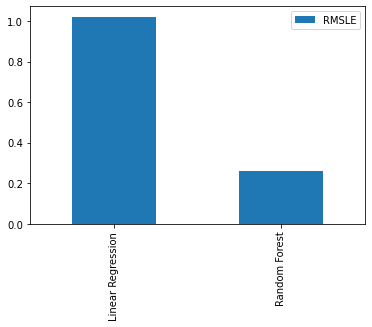

In [34]:
model_scores = evaluate(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_compare = pd.DataFrame(model_scores, index=['RMSLE'])
model_compare.T.plot.bar()
model_compare

#### Model performance comparison and discussion
For baseline models which are without tuning the models' parameters, it looks like the random forest model has outperformed than linear regression model as random forest model has lower root mean squared log error (0.259122) than linear regression model (1.020829). Next, we will do hyperparameter tuning on random forest to improve the model performance.

#### Hyperparameter tuning with GridSearchCV

In [35]:
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 50, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 8, 2),
           "min_samples_leaf": np.arange(1, 8, 2),
           }

best_rf = GridSearchCV(RandomForestRegressor(random_state=42),rf_grid,cv=5,)
best_rf.fit(X_train,y_train)
print('Best params', best_rf.best_params_)

Best params {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [36]:
# Evaluate tuned model
best_model = {
          "Random Forest": RandomForestRegressor(random_state=42,
          max_depth= 5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 20),
         }
best_model_scores = evaluate(models=best_model,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
best_model_compare = pd.DataFrame(best_model_scores, index=['RMSLE'])
best_model_compare

,Random Forest
RMSLE,0.207198


#### Model performance after hyperparameter tuning
After hyperparameter tuning, the performance of random forest has improved as the root mean squared log error (0.20719797663794226) is slightly lower than the previous root mean squared log error(0.259122)

#### Predicting Test Data


In [37]:
# Check the range of the percentage of children achieving minimum proficiency in reading skill for children with disabilities
df['Reading_T_Y'].describe()


count    19.000000
mean     39.242105
std      22.356737
min       3.500000
25%      27.650000
50%      35.700000
75%      53.350000
max      78.300000
Name: Reading_T_Y, dtype: float64

- As we can see from above, the 75th percentile of the percentage of children achieving minimum proficiency in reading for children with disabilities is 53.35. Therefore, for this response variable, we would consider any value that is greater than 53.35 is in the high-value group

In [38]:
model = RandomForestRegressor(random_state=43,max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators= 20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(predictions)
X_test

[24.84833333 56.565      38.14       59.265     ]


,ANAR_P_T_Y,ANAR_LS_T_Y,ANAR_US_T_Y,OOS_P_T_Y,OOS_LS_T_Y,OOS_US_T_Y,Completion_P_T_Y,Numeracy_T_Y,Region_ECA,Region_LAC,...,Region_SSA,Sub-region_EECA,Sub-region_ESA,Sub-region_LAC,Sub-region_MENA,Sub-region_SA,Sub-region_WCA,Development regions_Less Developed,Development regions_More Developed,Development regions_Not Classified
0,72.1,49.9,41.5,23.0,21.0,34.6,70.7,22.7,0,0,...,0,0,0,0,0,1,0,0,0,0
5,93.6,92.8,62.1,4.4,3.7,18.0,97.3,51.2,0,1,...,0,0,0,1,0,0,0,1,0,0
11,92.5,8.7,73.8,10.6,1.0,13.6,81.5,21.4,0,0,...,0,0,0,0,0,0,0,1,0,0
1,77.9,93.6,86.9,6.4,0.3,0.0,100.0,66.1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [39]:
upperPercentile = df['Reading_T_Y'].describe()['75%']
X_test[predictions >= upperPercentile]

,ANAR_P_T_Y,ANAR_LS_T_Y,ANAR_US_T_Y,OOS_P_T_Y,OOS_LS_T_Y,OOS_US_T_Y,Completion_P_T_Y,Numeracy_T_Y,Region_ECA,Region_LAC,...,Region_SSA,Sub-region_EECA,Sub-region_ESA,Sub-region_LAC,Sub-region_MENA,Sub-region_SA,Sub-region_WCA,Development regions_Less Developed,Development regions_More Developed,Development regions_Not Classified
5,93.6,92.8,62.1,4.4,3.7,18.0,97.3,51.2,0,1,...,0,0,0,1,0,0,0,1,0,0
1,77.9,93.6,86.9,6.4,0.3,0.0,100.0,66.1,1,0,...,0,1,0,0,0,0,0,0,1,0


- We have used the test set which contains 4 rows for the model do the prediction. There are two row of predictor variables that able to let the model predict high value (more than 53.35)
- From that two rows, we can conclude that a country that has
    - relatively **high** adjusted net attendance rate on primary, lower secondary and upper secondary education level for children with disabilities
    - relatively **low** out-of-school children rate on primary, lower secondary and upper secondary education level for children with disabilities
    - relatively **high** percentage of children completing the last grade on primary education level for children with disabilities
    - relatively **high** percentage of children achieving minimum proficiency in numeracy skill for children with disabilities
- will have **higher chances to have higher** percentile of the percentage of children achieving minimum proficiency in reading skill for children with disabilities
- For categorical predictor variables such as region, sub-region, development region, these variables do not help much or show any pattern and correlation in predicting the response variable 


## Inferential question

Hypothesis: The out-of-school Rate is not associated with the presence of disabilities based on the sample population of children in rural areas.

Question: Is the hypothesis also true for the population of children in urban areas?

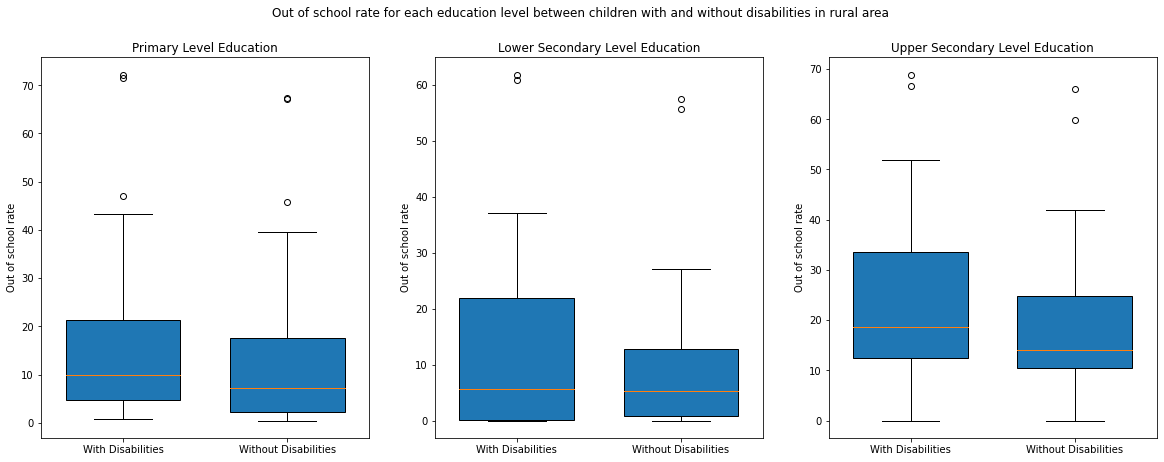

In [40]:
# Hypothesis
# boxplot of total OOS to visualize the differences for Rural area
atdEdcLvl = {
    "Primary" : "OOS_P",
    "Lower Secondary" : "OOS_LS",
    "Upper Secondary" : "OOS_US"
}

disDict = {"with" : "R_Y", "without":"R_N"}

fig, ax = plt.subplots(1,3,figsize=(20,7))
i = 0
plt.suptitle("Out of school rate for each education level between children with and without disabilities in rural area")
for name, colName in atdEdcLvl.items():
    data = [ df[colName + "_" + disDict["with"]] ,  df[colName + "_" + disDict["without"]] ]
    ax[i].set_ylabel("Out of school rate")
    ax[i].set_title(name + " Level Education")
    ax[i].boxplot(data, patch_artist=True, labels = ["With Disabilities", "Without Disabilities"], widths=0.7)
    i += 1


- From the box plots above, we can see that the boxes are overlapped on each other for the Children with disabilities and without disabilities
    - There is no association between OOSR and children with and without disabilities for the Rural Area
- There are outliers from each of the box plots above
- For the hypothesis, we can conclude that there is no association between the Out of School Rate and the presence of disabilities based on the sample population of children in rural areas.

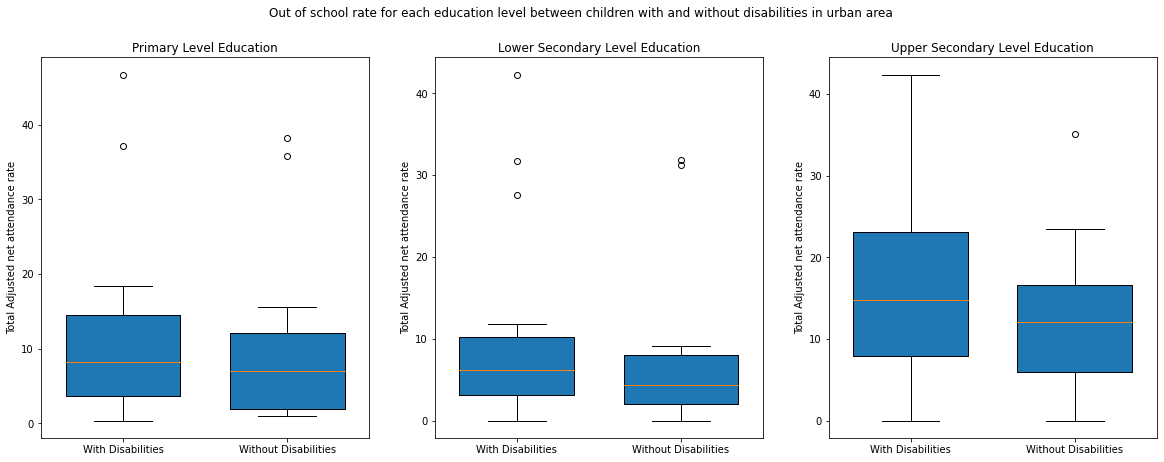

In [41]:
# Question
# boxplot of total OOS to visualize the differences for Urban area
atdEdcLvl = {
    "Primary" : "OOS_P",
    "Lower Secondary" : "OOS_LS",
    "Upper Secondary" : "OOS_US"
}

disDict = {"with" : "U_Y", "without":"U_N"}

fig, ax = plt.subplots(1,3,figsize=(20,7))
i = 0
plt.suptitle("Out of school rate for each education level between children with and without disabilities in urban area")
for name, colName in atdEdcLvl.items():
    data = [ df[colName + "_" + disDict["with"]] ,  df[colName + "_" + disDict["without"]] ]
    ax[i].set_ylabel("Total Adjusted net attendance rate")
    ax[i].set_title(name + " Level Education")
    ax[i].boxplot(data, patch_artist=True, labels = ["With Disabilities", "Without Disabilities"], widths=0.7)
    i += 1



- From the box plots above, we can see that the boxes are overlapped on each other for the Children with disabilities and without disabilities
    - There is no association between OOSR and children with and without disabilities for the Urban Area 
- There is outliers from each of the box plots above
- For the question, we can conclude that there is no association between the Out of School Rate and the presence of disabilities based on the sample population of children in urban areas.
- We can visualize that the Rural drop out rate is higher that Urban because the range of the plots for rural is higher than the urban
- Thus, the hypothesis for Rural Areas is also true for the question in Urban Areas

# Data Mining

### Cluster Analysis

- In cluster analysis, we would choose K-Means Clustering as the clustering algorithm.
- In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence we will exclude the target variable to treat it as unsupervised problem.
- The K-Means algorithm is not applicable to categorical data, as categorical variables are discrete and do not have any natural origin. So computing euclidean distance for such as space is not meaningful. Hence we will exclude the categorical variable.
- Since clustering is sensitive to the range of data, it is important that we scale the data before clustering.

### Correlation Analysis for Children with Disabilities

                  ANAR_P_T_Y  ANAR_LS_T_Y  ANAR_US_T_Y  OOS_P_T_Y  OOS_LS_T_Y  \
ANAR_P_T_Y          1.000000     0.673938     0.672825  -0.892473   -0.866189   
ANAR_LS_T_Y         0.673938     1.000000     0.814674  -0.681893   -0.667844   
ANAR_US_T_Y         0.672825     0.814674     1.000000  -0.679946   -0.754671   
OOS_P_T_Y          -0.892473    -0.681893    -0.679946   1.000000    0.900731   
OOS_LS_T_Y         -0.866189    -0.667844    -0.754671   0.900731    1.000000   
OOS_US_T_Y         -0.798170    -0.737379    -0.852768   0.841884    0.910923   
Completion_P_T_Y    0.772158     0.863239     0.870680  -0.850950   -0.818138   
Reading_T_Y         0.638436     0.781304     0.828088  -0.683877   -0.745726   
Numeracy_T_Y        0.632213     0.865982     0.789505  -0.632811   -0.721412   

                  OOS_US_T_Y  Completion_P_T_Y  Reading_T_Y  Numeracy_T_Y  
ANAR_P_T_Y         -0.798170          0.772158     0.638436      0.632213  
ANAR_LS_T_Y        -0.737379         

<AxesSubplot:>

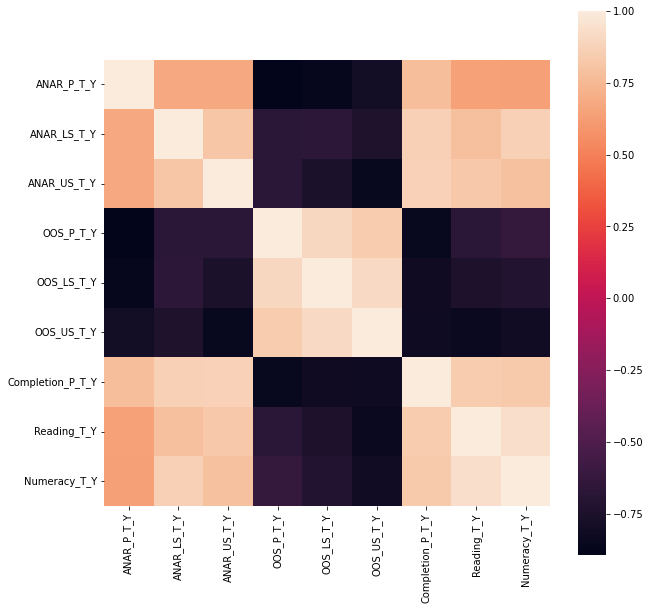

In [42]:
#Get all columns on children with disabilities

tmpDF = df[[name + "_T_Y" for name in dfDict]]
cor = tmpDF.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
print(tmpDF.corr())

sns.heatmap(cor, square = True, ax = ax)

#### What can we observe?
- We can see that there is a strong correlation between each of the education level under the same category respectively
- The OOSR has a strong negative correlation with all the other categories
- There is a strongest positive correlation that we can observe is between the Foundation Reading skills and Foundation Numeracy skills

### Clustering of Countries

In [43]:
#Scale the data by normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(tmpDF)

### K-Means Clustering
#### K-Means Clustering for Children with Disability

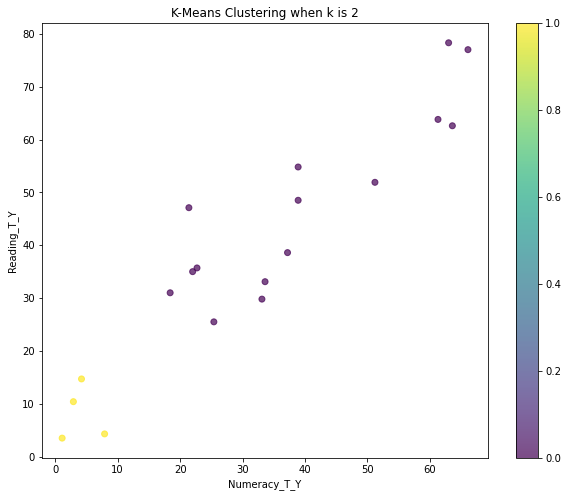

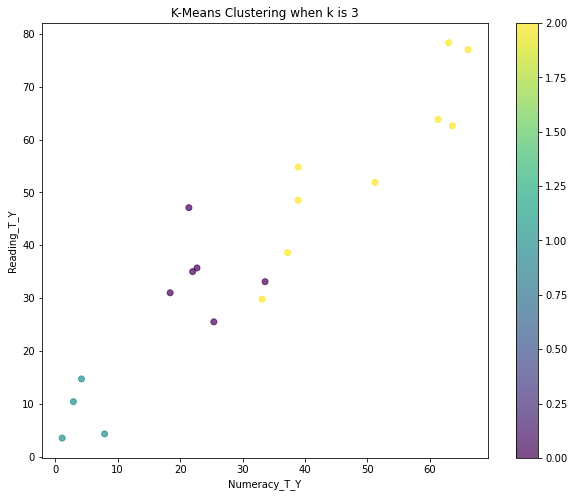

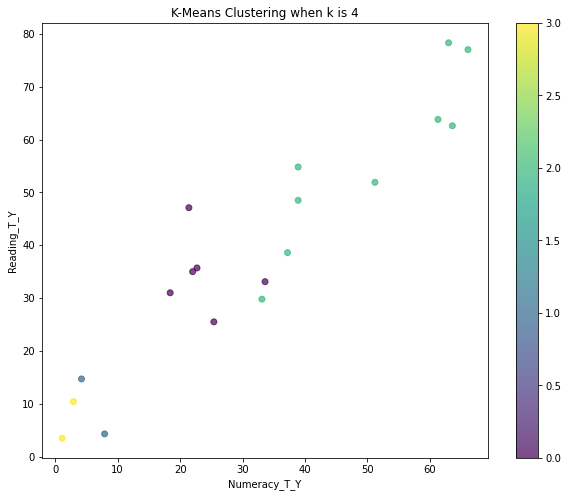

,ANAR_P_T_Y,ANAR_LS_T_Y,ANAR_US_T_Y,OOS_P_T_Y,OOS_LS_T_Y,OOS_US_T_Y,Completion_P_T_Y,Reading_T_Y,Numeracy_T_Y,k2_T_Y,k3_T_Y,k4_T_Y
0,72.1,49.9,41.5,23.0,21.0,34.6,70.7,35.7,22.7,0,0,0
12,84.2,36.9,16.2,11.4,9.7,24.9,76.8,25.5,25.4,0,0,0
11,92.5,8.7,73.8,10.6,1.0,13.6,81.5,47.1,21.4,0,0,0
8,73.3,48.8,38.9,15.3,6.7,21.8,73.9,33.1,33.6,0,0,0
6,94.8,78.7,76.1,2.6,15.1,17.9,87.2,35.0,22.0,0,0,0
18,90.1,47.3,7.3,4.3,20.3,30.6,77.0,31.0,18.4,0,0,0
4,63.2,8.9,0.0,33.5,23.5,26.9,21.0,10.4,2.9,1,1,3
3,38.3,13.7,2.1,67.4,57.5,61.3,24.7,4.3,7.9,1,1,1
2,71.3,9.8,0.0,35.2,27.3,43.8,18.8,3.5,1.1,1,1,3
13,34.9,22.2,17.0,53.1,45.6,51.0,44.8,14.7,4.2,1,1,1


In [44]:
# plot K-Means
def kMeanAnl(df, k):
    model = KMeans(k, verbose = 0)
    model.fit(X)
    
    kMeansLabels = pd.DataFrame(model.labels_)

    v1 = df["Numeracy_T_Y"]
    v2 = df["Reading_T_Y"]

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kMeansLabels[0], alpha=0.7)
    ax.set_title(f'K-Means Clustering when k is {k}')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()

    return model.labels_

# append the model labels as series into the tmpDF to do checking
tmpDF_Y = tmpDF.copy()
for k in range(2, 5):
    tmpDF_Y["k" + str(k) + "_T_Y"] = kMeanAnl(df, k)

# check the dataframe to the its correlation
tmpDF_Y.sort_values(by=['k3_T_Y'], ascending=True)

- From the 3 K-Means Clustering Scatter plots for Children with Disabilities above, we can see that the clustering for k = 2 and k = 3 are suitable
- While the clustering for k = 4 is ambiguous, because we can see that there are a lot of points overlapping into the other clusters
- Based on the dataframe, we can see that for column k2_T_Y and k3_T_Y, the significant values are clustered together better than the column k4_T_Y

### Correlation Analysis for Children without Disabilities

                  ANAR_P_T_N  ANAR_LS_T_N  ANAR_US_T_N  OOS_P_T_N  OOS_LS_T_N  \
ANAR_P_T_N          1.000000     0.759128     0.691666  -0.877335   -0.906434   
ANAR_LS_T_N         0.759128     1.000000     0.787545  -0.751006   -0.655071   
ANAR_US_T_N         0.691666     0.787545     1.000000  -0.674597   -0.705520   
OOS_P_T_N          -0.877335    -0.751006    -0.674597   1.000000    0.905932   
OOS_LS_T_N         -0.906434    -0.655071    -0.705520   0.905932    1.000000   
OOS_US_T_N         -0.831078    -0.660140    -0.778022   0.814735    0.921594   
Completion_P_T_N    0.804603     0.860264     0.824738  -0.897833   -0.777504   
Reading_T_N         0.737334     0.785685     0.816042  -0.721104   -0.708335   
Numeracy_T_N        0.713414     0.833406     0.770116  -0.692638   -0.675908   

                  OOS_US_T_N  Completion_P_T_N  Reading_T_N  Numeracy_T_N  
ANAR_P_T_N         -0.831078          0.804603     0.737334      0.713414  
ANAR_LS_T_N        -0.660140         

<AxesSubplot:>

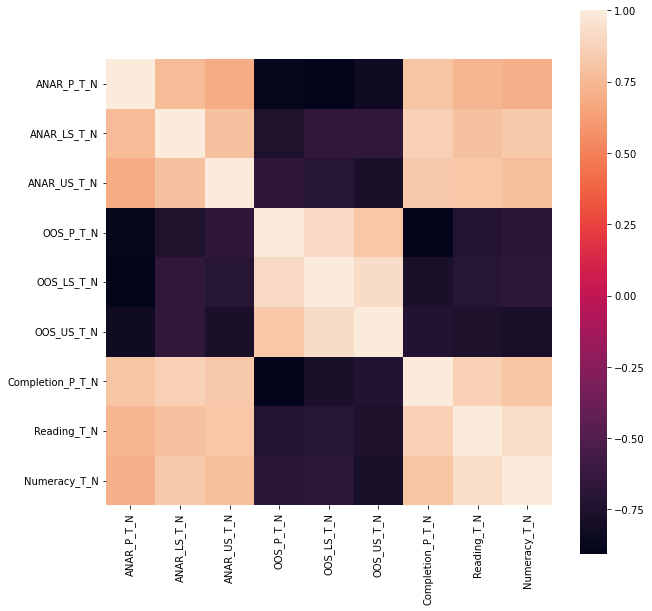

In [45]:
#Get all columns on children without disabilities

tmpDF = df[[name + "_T_N" for name in dfDict]]
cor = tmpDF.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
print(tmpDF.corr())

sns.heatmap(cor, square = True, ax = ax)

#### What can we observe?
- The pattern of the Heatmap for Children without Disabilities is very similar to the Heatmap for Children with Disabilities above
- We can see that there is also a strong correlation between each of the education level under the same category respectively
- Similar with the heatmap from Children with Disabilities, the OOSR has a strong negative correlation with all the other categories
- The strongest positive correlation that we can observe is between the Foundation Reading skills and Foundation Numeracy skills

### Clustering of Countries

In [46]:
#Scale the data by normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(tmpDF)

### K-Means Clustering
#### K-Means Clustrering for Children without Disability

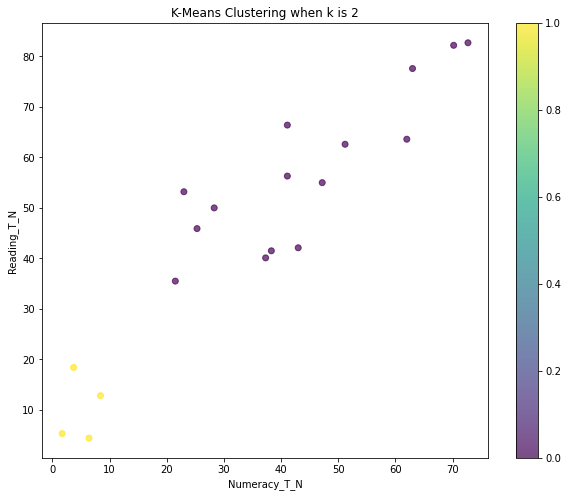

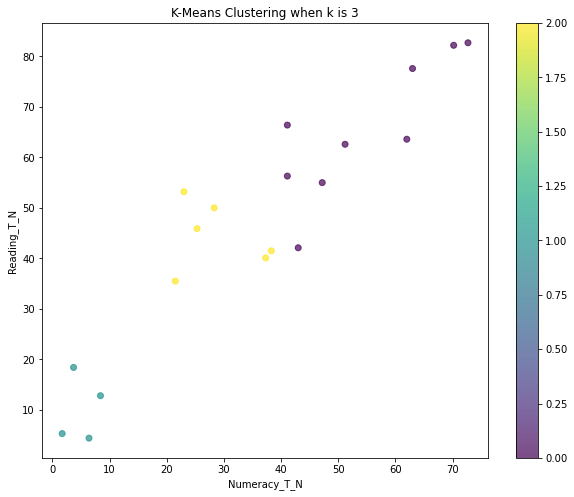

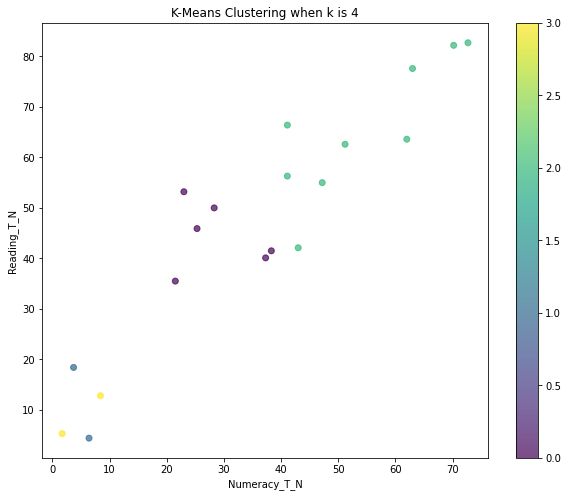

,ANAR_P_T_N,ANAR_LS_T_N,ANAR_US_T_N,OOS_P_T_N,OOS_LS_T_N,OOS_US_T_N,Completion_P_T_N,Reading_T_N,Numeracy_T_N,k2_T_N,k3_T_N,k4_T_N
9,97.4,99.4,82.7,10.7,0.0,14.6,94.9,66.4,41.1,0,0,2
1,93.0,93.8,87.9,1.3,0.1,0.0,100.0,82.7,72.7,0,0,2
5,97.3,91.0,62.9,2.1,6.2,16.9,98.3,63.6,62.0,0,0,2
16,98.8,97.8,96.6,13.8,0.0,0.5,100.0,82.2,70.2,0,0,2
7,96.2,95.3,88.4,3.8,0.9,5.4,99.2,42.1,43.0,0,0,2
15,97.0,93.7,75.1,7.0,6.1,10.8,99.0,62.6,51.2,0,0,2
17,74.5,75.6,82.6,0.8,8.2,8.9,100.0,56.3,41.1,0,0,2
10,97.8,92.4,81.2,1.5,1.9,9.7,99.9,55.0,47.2,0,0,2
14,99.3,92.8,80.0,6.2,7.4,1.5,97.0,77.6,63.0,0,0,2
2,74.0,14.1,4.4,30.9,19.3,29.6,30.6,5.3,1.7,1,1,3


In [47]:
# plot K-Means
def kMeanAnl(df, k):
    model = KMeans(k, verbose = 0)
    model.fit(X)
    
    kMeansLabels = pd.DataFrame(model.labels_)

    v1 = df["Numeracy_T_N"]
    v2 = df["Reading_T_N"]

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kMeansLabels[0], alpha=0.7)
    ax.set_title(f'K-Means Clustering when k is {k}')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()

    return model.labels_

# append the model labels as series into the tmpDF to do checking
tmpDF_N = tmpDF.copy()
for k in range(2, 5):
    tmpDF_N["k" + str(k) + "_T_N"] = kMeanAnl(df, k)

# check the dataframe to the its correlation
tmpDF_N.sort_values(by=['k3_T_N'], ascending=True)

- The pattern of the K-Means Clustering Scatter plots for Children without Disabilities is also very similar to the Scatter plot for Children with Disabilities
- From the 3 scatter plots above, we can see that the clustering for k = 2 and k = 3 are suitable
- While the clustering for k = 4 is ambiguous, because we can see that there are a lot of points overlapping into the other clusters, similar to the previous k = 4 scatter plot for Children with Disabilities above
- Based on the dataframe, we can see that for column k2_T_N and k3_T_N, the significant values are clustered together better than the column k4_T_N

In [48]:
# visualize the clusters in a dataframe by merge
joined = pd.merge(tmpDF_Y, tmpDF_N, left_index=True, right_index=True)
columns = []
for k in range(2,5):
    for i in ['Y','N']:
        colName = 'k'+ str(k)+'_T_'+i
        columns.append(colName)
joined.sort_values(by=['k3_T_N'], ascending=True)[columns]

,k2_T_Y,k2_T_N,k3_T_Y,k3_T_N,k4_T_Y,k4_T_N
9,0,0,2,0,2,2
1,0,0,2,0,2,2
5,0,0,2,0,2,2
16,0,0,2,0,2,2
7,0,0,2,0,2,2
15,0,0,2,0,2,2
17,0,0,2,0,2,2
10,0,0,2,0,2,2
14,0,0,2,0,2,2
2,1,1,1,1,3,3


##### Conclusion for K-Means Clustering

- Based on the visualization of the K-Means Clustering scatter plots and dataframes above, we can conclude that there is no association between Children with Disabilities and without Disabilities
- This is because from the scatter plots, we can clearly observe that the clusters for both the scatter plots are highly similar
- From the merged dataframe above, we can also see that the clusters are in fact, from the same points for both of the scatter plots
    - For example, points 2, 3, 4, and 13 are grouped together in the same way by both of the K-Means scatter plots

In [49]:
%reset -f

# Dataset2 - COVID-19 Vaccine Adverse Reactions

In [50]:
#Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency


warnings.filterwarnings("ignore")

# Helper functions
def checkMissingData(df):
    totalMissingData = df.isnull().sum()
    print(totalMissingData[totalMissingData != 0])
    print(f"Largest number of rows that have missing data: {totalMissingData.nlargest(1).values[0]}")

# Data Collection
- Since it is difficult to distinguish a coincidental event from one truly caused by a vaccine, the VAERS database will contain events of both types
- In addition, it is often the case that more than one vaccine was administered, making it difficult to know to which of the vaccines the event might be attributed. In
analyzing individual reports, researchers examine the medical information about the event, and obtain more specific information from the reporters whenever necessary. Patterns of reporting associated with vaccines and vaccine lots are also analyzed.
- About 85-90% of vaccine adverse event reports concern relatively minor events, such as fevers or redness and swelling at the injection site. The remaining reports (less than 15%) describe serious events, such as hospitalizations, life-threatening illnesses, or deaths. The reports of serious events are of greatest concern and receive the most careful scrutiny by VAERS staff.


#### Description of the dataset

In [51]:
# Load the dataset
dfDict = {
"VAERSDATA" : pd.read_csv('2021VAERSDATA.csv',encoding="latin1"),
"VAERSSYMPTOMS" : pd.read_csv('2021VAERSSYMPTOMS.csv',encoding="latin1"),
"VAERSVAX": pd.read_csv('2021VAERSVAX.csv',encoding="latin1"),
}

In [52]:
# Check the shape of dataset from each csv file
for key in dfDict:
    print(f"{key}: {dfDict[key].shape}")

VAERSDATA: (34121, 35)
VAERSSYMPTOMS: (48110, 11)
VAERSVAX: (34630, 8)


In [53]:
# Check 2021VAERSDATA.csv
dfDict["VAERSDATA"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

In [54]:
checkMissingData(dfDict["VAERSDATA"])
dfDict["VAERSDATA"].head()

STATE            5571
AGE_YRS          3188
CAGE_YR          7330
CAGE_MO         34038
RPT_DATE        34058
SYMPTOM_TEXT        2
DIED            32164
DATEDIED        32323
L_THREAT        32862
ER_VISIT        34110
HOSPITAL        29734
HOSPDAYS        31264
X_STAY          34069
DISABLE         33251
RECOVD           2857
VAX_DATE         1499
ONSET_DATE       1863
NUMDAYS          2927
LAB_DATA        19041
V_FUNDBY        34057
OTHER_MEDS      13882
CUR_ILL         18052
HISTORY         11746
PRIOR_VAX       32687
SPLTTYPE        25898
TODAYS_DATE       199
BIRTH_DEFECT    34070
OFC_VISIT       28717
ER_ED_VISIT     28592
ALLERGIES       15534
dtype: int64
Largest number of rows that have missing data: 34110


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [55]:
# Check 2021VAERSSYMPTOMS.csv
dfDict["VAERSSYMPTOMS"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   SYMPTOM1         48110 non-null  object 
 2   SYMPTOMVERSION1  48110 non-null  float64
 3   SYMPTOM2         39351 non-null  object 
 4   SYMPTOMVERSION2  39351 non-null  float64
 5   SYMPTOM3         31542 non-null  object 
 6   SYMPTOMVERSION3  31542 non-null  float64
 7   SYMPTOM4         24444 non-null  object 
 8   SYMPTOMVERSION4  24444 non-null  float64
 9   SYMPTOM5         18560 non-null  object 
 10  SYMPTOMVERSION5  18560 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.0+ MB


In [56]:
checkMissingData(dfDict["VAERSSYMPTOMS"])
dfDict["VAERSSYMPTOMS"].head()

SYMPTOM2            8759
SYMPTOMVERSION2     8759
SYMPTOM3           16568
SYMPTOMVERSION3    16568
SYMPTOM4           23666
SYMPTOMVERSION4    23666
SYMPTOM5           29550
SYMPTOMVERSION5    29550
dtype: int64
Largest number of rows that have missing data: 29550


,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [57]:
# Check 2021VAERSVAX.csv
dfDict["VAERSVAX"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         34630 non-null  int64 
 1   VAX_TYPE         34630 non-null  object
 2   VAX_MANU         34630 non-null  object
 3   VAX_LOT          23513 non-null  object
 4   VAX_DOSE_SERIES  34568 non-null  object
 5   VAX_ROUTE        26229 non-null  object
 6   VAX_SITE         26687 non-null  object
 7   VAX_NAME         34630 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [58]:
checkMissingData(dfDict["VAERSVAX"])
dfDict["VAERSVAX"].head()

VAX_LOT            11117
VAX_DOSE_SERIES       62
VAX_ROUTE           8401
VAX_SITE            7943
dtype: int64
Largest number of rows that have missing data: 11117


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


- The shapes from the datasets are not the same, it varies from
    - VAERSDATA: (34121, 35)
    - VAERSSYMPTOMS: (48110, 11)
    - VAERSVAX: (34630, 8)
- From the VAERSDATA file, we can see that
    - This will be the main csv that we focus on, as it consist of many important data columns
    - Columns such as the ID, Age, Sex, Symptoms, Died, Recovered etc, will be essential for answering the questions  

- From the VAERSSYMPTOMS file, we can see that 
    - This will be the file that will return the severity of each cases 
    - From the data dictionary, there can be an unlimited amount of coded terms for a given event
    - Each row in the VAERSSYMPTOMS csv will contain up to 5 MedDRA terms per VAERS ID
        - Thus, there could be multiple rows per VAERS ID
    
- From the VAERSVAX file, we can see that
    - This will be the file that indicates the type and names of the vaccines

- When we read all the excel files into pandas dataframe, there is no issue with the headers
- Our main objective is to only learn about the relationship and infomation for the COVID-19 vaccines, therefore
    - We decided to drop the rows in VAERSVAX which is not a COVID-19 vaccine
    - For VAERSSYMPTOMS, data preprocessing is needed to make sure each of the VAERSID unique
    - After every dataframe is cleaned, we will merge the VAERSVAX and VAERSSYMPTOMS dataframe with the VAERSDATA dataframe as the main 


# Data Preprocessing

#### Cleaning 2021VAERSSYMPTOMS.csv
- Check duplicates

In [59]:
dfDict["VAERSSYMPTOMS"]['VAERS_ID'].is_unique

False

In [60]:
temp = dfDict["VAERSSYMPTOMS"]
duplicate = temp[temp.duplicated('VAERS_ID')]
duplicate

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
11,916611,Dyspnoea,23.1,Fatigue,23.1,Feeling abnormal,23.1,Head discomfort,23.1,Headache,23.1
12,916611,Heart rate decreased,23.1,Heart rate increased,23.1,Hypertension,23.1,Injection site pain,23.1,Musculoskeletal chest pain,23.1
13,916611,Nausea,23.1,Pain,23.1,Pain in extremity,23.1,Paraesthesia oral,23.1,Pyrexia,23.1
14,916611,SARS-CoV-2 antibody test,23.1,SARS-CoV-2 test negative,23.1,NaN,NaN,NaN,NaN,NaN,NaN
22,916620,Nausea,23.1,Pain in extremity,23.1,Pyrexia,23.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48098,1113563,Tremor,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48100,1113915,Fatigue,23.1,Headache,23.1,Nausea,23.1,Pain in extremity,23.1,Retching,23.1
48101,1113915,Sleep disorder,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48105,1113920,Nasal discomfort,23.1,Night sweats,23.1,Platelet count,23.1,Platelet count decreased,23.1,Pyrexia,23.1


#### Cleaning 2021VAERSVAX.csv

In [61]:
dfDict['VAERSVAX']['VAX_TYPE'].value_counts()

COVID19       34174
VARZOS          114
UNK             108
FLUX             47
FLU4             45
PPV              27
PNC13             9
HEP               9
MMR               9
MNQ               8
FLUR4             8
HPV9              7
TDAP              6
FLU3              6
DTAP              5
FLUA4             5
FLUC4             4
MENB              3
DTAPIPVHIB        3
HEPA              3
VARCEL            3
DTAPHEPBIP        2
HIBV              2
FLUA3             2
TTOX              2
IPV               2
TYP               2
DT                2
RV5               1
OPV               1
PNC               1
FLUN4             1
RAB               1
CHOL              1
HPVX              1
DTP               1
HPV4              1
ANTH              1
FLUC3             1
RV1               1
YF                1
Name: VAX_TYPE, dtype: int64

In [62]:
temp = dfDict["VAERSVAX"].copy()
# Only include covid-19 vaccine cases
temp = temp[temp['VAX_TYPE'] == 'COVID19']
temp['VAERS_ID'].is_unique

False

In [63]:
duplicate = temp[temp.duplicated('VAERS_ID',keep=False)]
duplicate  = duplicate[duplicate["VAX_TYPE"] == "COVID19"]
# See if there is anyone has taken vaccines from different manufacturers
takeMoreThanOneVaxManuIds = duplicate.groupby(['VAERS_ID']).filter(lambda x: x['VAX_MANU'].nunique() > 1)['VAERS_ID'].unique()
takeMoreThanOneVaxManuIds 

array([ 922571,  922592,  922730,  922762,  934042,  934438,  967274,
        977024,  988065, 1046599, 1046739])

In [64]:
# Check the unique values of "VAX_DOSE_SERIES"
temp["VAX_DOSE_SERIES"].value_counts()

1      22776
2       6079
UNK     5183
3         46
7+        21
5          6
4          6
6          6
Name: VAX_DOSE_SERIES, dtype: int64

- From the dataframe (2021VAERSVAX.csv) , we can see that there are different administered vaccine type
    - There are 34174 rows of COVID19 vaccine
    - Other rows are belonged to other vaccine
- Since we are only trying to analyze the COVID-19 vaccine adverse events, we would filter out those vaccines that are not COVID-19 vaccine for the ease of processing
- However, through our findings, we see that there some duplicated rows with same 'VAERS_ID'. It might be because of the individual had taken multiple shots of COVID-19 vaccines. 
    - As there is no vaccination date provided in this dataframe, we could not try to figure out which vaccine had been taken by the individual 

In [65]:
# Only Include COVID-19 vaccine
# Drop rows that have '4', '5', '6', '7+' and 'UNK' in 'VAX_DOSE_SERIES' column (bcs the data is from last year)
# Group the duplicated rows and aggregate the number of doses 


def preprocessDfVax(dfVax):
    tempDfVax = dfVax[dfVax['VAX_TYPE'] == 'COVID19']
    dosesToBeRemoved = ['4', '5', '6', '7+', 'UNK']
    tempDfVax = tempDfVax[~tempDfVax["VAX_DOSE_SERIES"].isin(dosesToBeRemoved)]
    tempDfVax = tempDfVax[tempDfVax["VAX_DOSE_SERIES"].notnull()]
    tempDfVax = tempDfVax[~tempDfVax['VAERS_ID'].isin(takeMoreThanOneVaxManuIds)]
    columns = ['VAERS_ID',"VAX_DOSE_SERIES","VAX_MANU"]
    tempDfVax = tempDfVax[columns]
    return tempDfVax

    

def mergeDupRowsOfDfVax(dfVax):
    dfVax.reset_index(drop = True, inplace = True)
    # Change dtype  into int
    dtypeDic = {"VAX_DOSE_SERIES":int}
    dfVax = dfVax.astype(dtypeDic)

    tmpDF = dfVax[~dfVax.duplicated('VAERS_ID')].copy()
    tmpDF.reset_index(drop = True, inplace = True)

    tmpDF["VAX_DOSE_SERIES"] = 0
    
    ptr1 = 0
    for ptr2 in range(len(dfVax)):
        vaxID1 = tmpDF.at[ptr1, "VAERS_ID"]
        vaxID2 = dfVax.at[ptr2, "VAERS_ID"]

        if vaxID1 != vaxID2: #New vaxers ID, increase ptr1 by 1
            ptr1 += 1

        tmpDF.at[ptr1, "VAX_DOSE_SERIES"] += dfVax.at[ptr2, "VAX_DOSE_SERIES"]

    tmpDF = tmpDF[tmpDF["VAX_DOSE_SERIES"] < 4]
    return tmpDF

tempDfVax = preprocessDfVax(dfDict["VAERSVAX"])
print(tempDfVax.shape)
tempDfVax = mergeDupRowsOfDfVax(tempDfVax)
print(tempDfVax.shape)
tempDfVax["VAX_DOSE_SERIES"].value_counts()

(28884, 3)
(28532, 3)


1    22412
2     5782
3      338
Name: VAX_DOSE_SERIES, dtype: int64

In [66]:
tempDfVax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28532 entries, 0 to 28544
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         28532 non-null  int64 
 1   VAX_DOSE_SERIES  28532 non-null  int64 
 2   VAX_MANU         28532 non-null  object
dtypes: int64(2), object(1)
memory usage: 891.6+ KB


#### Merge dataframe

In [67]:
def toSympDF(symptoms):
    df = pd.DataFrame({"VAERS_ID": list(symptoms.keys()), "SYMPTOMS": list(symptoms.values()) })
    return df

def mergeDF(dfData, dfSymp):
    dfSymp.reset_index(drop = True, inplace = True)
    
    symptoms = {v:[] for v in dfData["VAERS_ID"]}

    for i in range(len(dfSymp)):
        vaxID = dfSymp.at[i, "VAERS_ID"]
        for j in range(1, 6):
            symp = dfSymp.at[i, "SYMPTOM" + str(j)]
            if type(symp) != str:
                continue
            symptoms[vaxID].append(symp)

    sympDF = toSympDF(symptoms)
    return dfData.merge(sympDF, on = "VAERS_ID", how = "left")
               

df = mergeDF(dfDict["VAERSDATA"], dfDict["VAERSSYMPTOMS"])
df = df.merge(tempDfVax, on="VAERS_ID", how='inner')

In [68]:
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,SYMPTOMS,VAX_DOSE_SERIES,VAX_MANU
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom,"[Dysphagia, Epiglottitis]",1,MODERNA
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy""","[Anxiety, Dyspnoea]",1,MODERNA
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish,"[Chest discomfort, Dysphagia, Pain in extremit...",1,PFIZER\BIONTECH
3,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,NaN,2,01/01/2021,NaN,NaN,NaN,Na,"[Injection site erythema, Injection site pruri...",1,MODERNA
4,916606,01/01/2021,NV,44.0,44.0,NaN,F,NaN,patient called back the next day and stated he...,NaN,...,NaN,2,01/01/2021,NaN,NaN,NaN,iodine (shellfish) has epipen,[Pharyngeal swelling],1,MODERNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28527,1113917,03/19/2021,FL,88.0,87.0,NaN,F,NaN,throat closure three weeks after second dose; ...,NaN,...,"USMODERNATX, INC.MOD20210",2,03/12/2021,NaN,NaN,Y,NaN,"[Dysphagia, Hernia, Obstruction]",1,MODERNA
28528,1113920,03/19/2021,PA,83.0,NaN,NaN,F,NaN,positive COVID-19 test with no symptoms; Asymp...,NaN,...,USPFIZER INC2021231682,2,03/16/2021,NaN,Y,NaN,NaN,"[Arrhythmia, Asymptomatic COVID-19, Chills, Co...",1,PFIZER\BIONTECH
28529,1113963,03/19/2021,MS,59.0,NaN,NaN,F,NaN,HLH (hemophagocyticlymphohistiocytosis); This ...,Y,...,USPFIZER INC2021257356,2,03/12/2021,NaN,NaN,NaN,NaN,"[Haemophagocytic lymphohistiocytosis, SARS-CoV...",2,PFIZER\BIONTECH
28530,1115045,03/19/2021,AZ,57.0,NaN,NaN,M,NaN,Death; A spontaneous report was received from ...,Y,...,"USMODERNATX, INC.MOD20210",2,03/15/2021,NaN,NaN,NaN,NaN,[Death],2,MODERNA


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28532 entries, 0 to 28531
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         28532 non-null  int64  
 1   RECVDATE         28532 non-null  object 
 2   STATE            24372 non-null  object 
 3   AGE_YRS          26234 non-null  float64
 4   CAGE_YR          22773 non-null  float64
 5   CAGE_MO          56 non-null     float64
 6   SEX              28532 non-null  object 
 7   RPT_DATE         51 non-null     object 
 8   SYMPTOM_TEXT     28530 non-null  object 
 9   DIED             1614 non-null   object 
 10  DATEDIED         1506 non-null   object 
 11  L_THREAT         1056 non-null   object 
 12  ER_VISIT         10 non-null     object 
 13  HOSPITAL         3669 non-null   object 
 14  HOSPDAYS         2448 non-null   float64
 15  X_STAY           41 non-null     object 
 16  DISABLE          713 non-null    object 
 17  RECOVD      

#### Checking missing data

In [70]:
checkMissingData(df)

STATE            4160
AGE_YRS          2298
CAGE_YR          5759
CAGE_MO         28476
RPT_DATE        28481
SYMPTOM_TEXT        2
DIED            26918
DATEDIED        27026
L_THREAT        27476
ER_VISIT        28522
HOSPITAL        24863
HOSPDAYS        26084
X_STAY          28491
DISABLE         27819
RECOVD           2195
VAX_DATE          986
ONSET_DATE       1250
NUMDAYS          2093
LAB_DATA        15519
V_FUNDBY        28480
OTHER_MEDS      11112
CUR_ILL         14704
HISTORY          9272
PRIOR_VAX       27269
SPLTTYPE        21845
TODAYS_DATE       151
BIRTH_DEFECT    28485
OFC_VISIT       23856
ER_ED_VISIT     23742
ALLERGIES       12491
dtype: int64
Largest number of rows that have missing data: 28522


In [71]:
# Fill missing value in age column with calculated age
df['AGE_YRS'].fillna(df['CAGE_YR'],inplace=True)

In [72]:
# As age is an important factor in our context and purpose of this project, therefore we could not tolerate any rows that has missing data for age
df.dropna(subset=["AGE_YRS"], inplace=True)

In [73]:
df['AGE_YRS'].value_counts()

36.00    594
37.00    588
38.00    572
39.00    567
50.00    561
        ... 
0.50       1
0.58       1
0.25       1
8.00       1
2.00       1
Name: AGE_YRS, Length: 110, dtype: int64


- According to https://www.cdc.gov/coronavirus/2019-ncov/vaccines/recommendations/children-teens.html, we can see that CDC (Centers for Disease Control and Prevention) recommends everyone ages 5 years and older get vaccinated to help protect against COVID-19.
- As we have seen there are some data that have value that is less than 5 for 'AGE_YRS', which is not supposed to be happen.
- It might be due to human wrong data entry, therefore we have decided to remove these rows

In [74]:
# Only include data with age greater than or equal to 5
df = df[df['AGE_YRS'] >= 5]
df['AGE_YRS'].min()

8.0

In [75]:
#Check unique values of vaccine manufacturers 
df["VAX_MANU"].value_counts()

MODERNA                 13504
PFIZER\BIONTECH         12164
JANSSEN                   841
UNKNOWN MANUFACTURER        6
Name: VAX_MANU, dtype: int64

In [76]:
#Remove unknown vaccine manufacturer 
df = df[df['VAX_MANU'] != 'UNKNOWN MANUFACTURER']
df["VAX_MANU"].value_counts()

MODERNA            13504
PFIZER\BIONTECH    12164
JANSSEN              841
Name: VAX_MANU, dtype: int64

In [77]:
#Check unique values of sex
df["SEX"].value_counts()

F    19710
M     6667
U      132
Name: SEX, dtype: int64

In [78]:
#Remove unknown sex
df = df[df['SEX'] != 'U']
df["SEX"].value_counts()

F    19710
M     6667
Name: SEX, dtype: int64

In [79]:
# PRIOR_VAX: we will drop this column due to data inconsistency such as it contains name of vaccine, and details of vaccine adverse event

columnsToBeRemoved = ['STATE','CAGE_YR','CAGE_MO','SYMPTOM_TEXT','RPT_DATE','RECOVD','TODAYS_DATE','LAB_DATA','V_ADMINBY','V_FUNDBY','SPLTTYPE','FORM_VERS','VAX_DATE',
'ONSET_DATE','DATEDIED','PRIOR_VAX','X_STAY','NUMDAYS', 'OFC_VISIT','ER_ED_VISIT', 'HOSPITAL','RECVDATE']
df.drop(columnsToBeRemoved, axis = 1,inplace=True)


In [80]:
df.reset_index(drop=True, inplace = True)

def checkValValidity(valuesToChange,colName):
    
    for item in valuesToChange:
        total = len(df[df[colName]==item])
        if total == 0:
            print("Wrong string")

def changeVal(colName, valuesToChange, target, inverse=False):
    vTc = set(v.lower() for v in valuesToChange)

    for i in range(len(df)):
        val = df.at[i, colName]
        if (type(val) == str and val.lower() in vTc) != inverse:
            df.at[i, colName] = target

def changeValBySplit(colName, valuesToChange, target):
    vTc = set(v.lower() for v in valuesToChange)

    for i in range(len(df)):
        val = df.at[i, colName]

        if type(val) != str or val == target:
            continue

        vals = val.lower().split()

        flag = any(v in vTc for v in vals)

        if flag:
            df.at[i, colName] = target

In [81]:
# OTHER_MEDS: we will make it as categorical variable 
df['OTHER_MEDS'].value_counts()

valuesToChange = ['None', 'na', 'none','unknown','Unknown','No','None','no','None.','UNKNOWN','N/a','NO','None reported','None known',';','not known',';  ;',
'none reported','Na','Unknown.','Not known','unk', '0', 'None listed', 'UKN', 'NONE', 'UNK', 'n']


changeVal("OTHER_MEDS", valuesToChange, 'N')

values = ["no", "non", "none", "not", "unk", "ukn", "unknown", "na", "n/a", "deny", "denies", "denied", "nothing"]
changeValBySplit("OTHER_MEDS", values, 'N')

changeVal("OTHER_MEDS", ['N'], 'Y', inverse = True)
df['OTHER_MEDS'].value_counts().nlargest()

Y    22812
N     3565
Name: OTHER_MEDS, dtype: int64

In [82]:
# CUR_ILL: we will make it as categorical variable as HAVE_ILLNESS
df['CUR_ILL'].value_counts()

valuesToChange = ['None', 'none', 'No', 'no', 'NONE', 'unknown', 'Unknown', 'None.', 'N/a', 'None known', 'None reported', 'NO', 'none known', 'none reported', 'Na', 'UNKNOWN', 'na', 
'0', 'No illnesses', 'not known', 'None noted', 'No acute illnesses', 'NONE REPORTED', 'Unknown.', 'Non', 'none.', 'nothing', 'None Known', 'No.', 'No illness', 'Nothing', 'none noted', 
'Not known', 'no known', 'No known illnesses', 'unk', "denies", "Denies", "denied" ,"None stated", "no acute illness", "No known", "unsure", "Unkown", "No e", "none listed", "unkown", 
"no acute illnesses", "NOne", "NKDA", "NKA", "None Reported", "Not applicable", "no illness", "nonw", "-", "n/a.", "None listed", "None known.", "NONE NOTED", "Nonr", "no illnesses", "non",
"N/A.", "UNK", 'UKN', 'n']


changeVal("CUR_ILL", valuesToChange, 'N')

values = ["no", "non", "none", "not", "unk", "ukn", "unknown", "na", "n/a", "deny", "denies", "denied", "nothing", "nkda", "nka", "nkfa"]
changeValBySplit("CUR_ILL", values, 'N')

changeVal("CUR_ILL", ['N'], 'Y', inverse = True)
df['CUR_ILL'].value_counts()

Y    16050
N    10327
Name: CUR_ILL, dtype: int64

In [83]:
# HISTORY: we will make it as categorical variable as HAVE_COMORBIDITY

valuesToChange = ['not known', 'Medical History/Concurrent Conditions: No adverse event (no reported medical history)', 'Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: NONE', 'UNK', 
'none known', 'Medical History/Concurrent Conditions: No adverse event', 'Medical History/Concurrent Conditions: No adverse event (No medical history reported)', 'None', 'none', 'No', 'unknown', 'no', 'Unknown', 
'Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None', 'Medical History/Concurrent Conditions: No adverse event (No reported medical history)', 'NONE', 
'Medical History/Concurrent Conditions: No adverse event (No reported medical history.)', 'Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: none', 
'Medical History/Concurrent Conditions: No adverse event (No medical history reported.)', 'None.', 'N/a', 'UNKNOWN', 'None reported', 'NO', 'None known', 'none reported', 'Na', 'na', '0', 'denies', 'Unknown.', 'n']

changeVal("HISTORY", valuesToChange, 'N')
#changeVal("HISTORY", ['N'], 'Y', inverse = True)

values = ["no", "non", "none", "not", "unk", "ukn", "unknown", "na", "n/a", "deny", "denies", "denied", "nothing", "nkda", "nka", "nkfa"]
changeValBySplit("HISTORY", values, 'N')

changeVal("HISTORY", ['N'], 'Y', inverse = True)
df.rename(columns = {'HISTORY':'HAVE_COMORBIDITY'}, inplace = True)

df['HAVE_COMORBIDITY'].value_counts()


Y    19881
N     6496
Name: HAVE_COMORBIDITY, dtype: int64

In [84]:
# ALLERGIES, we will make it as categorical variable as ALLERGIES
df['ALLERGIES'].value_counts()

valuesToChange = ['No Known Drug Allergies', 'NKDA, NKFA', 'NKMA', 'None', 'no known drug allergies', 'NO KNOWN ALLERGIES', 'Denies', 'denies', 'UNK', 'NKA', 'NKDA', 'nka', 'none listed', 'No known', 'na', 'KNDA', 'KNA', 'No known drug allergies', 'Nka', 'nkda', 'Nkda', 'none', 'No', 'no', 'No known allergies', 'Unknown', 'NONE', 'unknown', 'None known', 'none known', 'None.', 'no known allergies', 'N/a', 'None reported', 'No Known Allergies', 'NO', 'No known allergies.', 'UNKNOWN', 'Na', 'None Known', 'none reported', 'No allergies', 'n']

# checkValValidity(valuesToChange,'ALLERGIES')

changeVal("ALLERGIES", valuesToChange, 'N')

values = ["no", "non", "none", "not", "unk", "ukn", "unknown", "na", "n/a", "deny", "denies", "denied", "nothing", "nkda", "nka", "nkfa"]
changeValBySplit("ALLERGIES", values, 'N')

changeVal("ALLERGIES", ['N'], 'Y', inverse = True)
df['ALLERGIES'].value_counts().nlargest(60)

Y    18974
N     7403
Name: ALLERGIES, dtype: int64

In [85]:
# DIED, L_THREAT,ER_VISIT, DISABLE, BIRTH_DEFECT: if missing, fill in 'N' for ranking severity
columns = ['DIED','L_THREAT', 'ER_VISIT', 'DISABLE', 'BIRTH_DEFECT']
for col in columns:
    df[col].fillna('N',inplace=True)

# HOSPDAYS: if missing, fill in 0 for ranking severity
df['HOSPDAYS'].fillna(0, inplace=True)

In [86]:
checkMissingData(df)

Series([], dtype: int64)
Largest number of rows that have missing data: 0


### Ranking the severity of the COVID-19 vaccine adverse event
- For case L_THREAT == 'Y', DIED == 'Y',ER_VISIT == 'Y', HOSPDAYS > 3, these adverse reports will be ranked as Severe(3) 
- For other adverse event reports, we will check SYMPTOMS columns manually to rank the severity of adverse event reports accordingly


In [87]:
df["SEVERITY"] = 0

from collections import defaultdict

def flagAndSymptoms(df):
    df.reset_index(drop = True, inplace = True)
    targetCol = ["L_THREAT", "DIED", "ER_VISIT"]
    
    symptoms = defaultdict(lambda:0)
    
    for i in range(len(df)):
        isSevere = (any(df.at[i, col] == 'Y' for col in targetCol) or df.at[i, "HOSPDAYS"] > 3)
        if isSevere:
            df.at[i, "SEVERITY"] = 3
            continue

        arr = df.at[i, "SYMPTOMS"]
        for j in arr:
            symptoms[j] += 1
    
    return symptoms

res = flagAndSymptoms(df)
res = sorted(res.items(), key = lambda x : x[1]*-1)

In [88]:
def getSymptomsDict():
    sympDict = dict()
    for line in open("sympDict.txt", "r"):
        k, v = line.rstrip().rsplit(',', 1)
        sympDict[k] = int(v)
    return sympDict

sympDict = getSymptomsDict()

In [89]:
for key in sympDict:
    if sympDict[key] == 3:
        print(key)

Cerebrovascular accident
Foetal death
Death
Sudden death


In [90]:
def flagWithSymp(df):
    not3Idx = df.index[df["SEVERITY"] != 3].to_list()

    for i in not3Idx:
        arr = df.at[i, "SYMPTOMS"]
        if not arr:
            continue
        isDefect = df.at[i, "BIRTH_DEFECT"] == 'Y' or df.at[i, "DISABLE"] == 'Y'
        df.at[i, "SEVERITY"] = max(max(map(sympDict.get, arr)), 2*(isDefect))
    
flagWithSymp(df)
df["SEVERITY"].value_counts()

1    15272
2     6960
3     3145
0     1000
Name: SEVERITY, dtype: int64

# Exploratory Data Analysis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26377 entries, 0 to 26376
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VAERS_ID          26377 non-null  int64  
 1   AGE_YRS           26377 non-null  float64
 2   SEX               26377 non-null  object 
 3   DIED              26377 non-null  object 
 4   L_THREAT          26377 non-null  object 
 5   ER_VISIT          26377 non-null  object 
 6   HOSPDAYS          26377 non-null  float64
 7   DISABLE           26377 non-null  object 
 8   OTHER_MEDS        26377 non-null  object 
 9   CUR_ILL           26377 non-null  object 
 10  HAVE_COMORBIDITY  26377 non-null  object 
 11  BIRTH_DEFECT      26377 non-null  object 
 12  ALLERGIES         26377 non-null  object 
 13  SYMPTOMS          26377 non-null  object 
 14  VAX_DOSE_SERIES   26377 non-null  int64  
 15  VAX_MANU          26377 non-null  object 
 16  SEVERITY          26377 non-null  int64 

In [92]:
df.describe()

,VAERS_ID,AGE_YRS,HOSPDAYS,VAX_DOSE_SERIES,SEVERITY
count,2.637700e+04,26377.000000,26377.00000,26377.000000,26377.000000
mean,9.790867e+05,51.228343,0.33859,1.232892,1.464420
std,6.190482e+04,18.468072,1.57182,0.451397,0.750363
min,9.166000e+05,8.000000,0.00000,1.000000,0.000000
25%,9.261140e+05,36.000000,0.00000,1.000000,1.000000
50%,9.370950e+05,49.000000,0.00000,1.000000,1.000000
75%,1.046764e+06,65.000000,0.00000,1.000000,2.000000
max,1.115348e+06,115.000000,38.00000,3.000000,3.000000


In [93]:
df.sample(5)

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,ER_VISIT,HOSPDAYS,DISABLE,OTHER_MEDS,CUR_ILL,HAVE_COMORBIDITY,BIRTH_DEFECT,ALLERGIES,SYMPTOMS,VAX_DOSE_SERIES,VAX_MANU,SEVERITY
17766,1021805,25.0,F,N,N,N,0.0,N,Y,Y,Y,N,Y,"[Fatigue, Headache, Injection site erythema, I...",2,MODERNA,1
8477,927584,43.0,F,N,N,N,0.0,N,Y,Y,Y,N,Y,"[Flushing, Urticaria]",1,PFIZER\BIONTECH,1
8298,952186,41.0,F,N,N,N,0.0,N,Y,Y,Y,N,Y,"[Fatigue, Feeling abnormal, Immediate post-inj...",1,PFIZER\BIONTECH,2
3840,922176,48.0,F,N,N,N,0.0,N,Y,Y,Y,N,Y,[Injection site swelling],1,MODERNA,1
2541,920162,49.0,F,N,N,N,0.0,N,Y,Y,Y,N,Y,"[Chills, Fatigue, Headache, Pyrexia, SARS-CoV-...",1,PFIZER\BIONTECH,1


In [94]:
# helper functions
GLOBALPALETTE = "Set1"
GLOBALSEVERITY = ["None", "Mild", "Moderate", "Severe"]

def customCountPlot(data, ax=None):
    totalCount = len(data)
    ax = sns.countplot(data, order=sorted(data.unique()), palette=GLOBALPALETTE,ax=ax)
    for p in ax.patches: 
        percentage = round((p.get_height() / totalCount) * 100,2)
        ax.annotate(f'{percentage}%',(p.get_x()+0.1, p.get_height()+50))

def plotUnivariateFeature(colName, isContinuous, df, ax=None,bins=None):
    # Ignore rows that has missing data on specific column
    data = df.loc[df[colName].notnull(), colName]
    if isContinuous:
        if bins != None:
            sns.histplot(data, ax=ax,bins=bins)
        else:
            sns.histplot(data, ax=ax)
    else:
        customCountPlot(data,ax)

## Univariate Analysis

#### Numeric data that help in ranking severity of adverse event
1. HOSPDAYS
#### Numeric data that are independent variables that help in predicting severity of adverse event
1. AGE_YRS
2. VAX_DOSE_SERIES

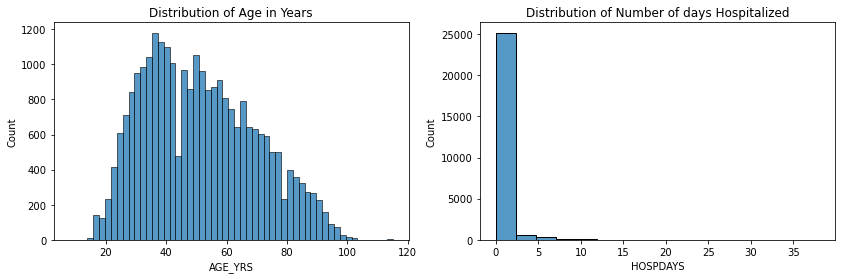

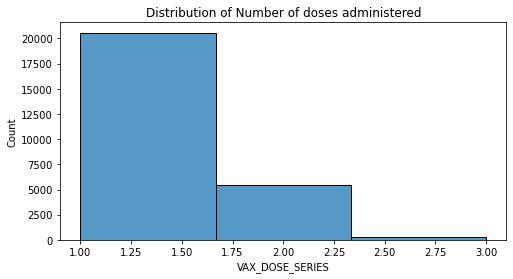

In [95]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,4))
fig, ax3 = plt.subplots(1,1,figsize=(8,4))


ax1.set_title("Distribution of Age in Years")
ax2.set_title("Distribution of Number of days Hospitalized")
ax3.set_title("Distribution of Number of doses administered")

plotUnivariateFeature('AGE_YRS',True,df,ax=ax1)
plotUnivariateFeature('HOSPDAYS',True,df,ax=ax2)
plotUnivariateFeature('VAX_DOSE_SERIES',True,df,ax=ax3,bins=3)

In [96]:
df['AGE_YRS'].describe()

count    26377.000000
mean        51.228343
std         18.468072
min          8.000000
25%         36.000000
50%         49.000000
75%         65.000000
max        115.000000
Name: AGE_YRS, dtype: float64

#### Categorical data that help in ranking severity of adverse event
1. DIED
2. L_THREAT
3. ER_VISIT
4. DISABLE
5. BIRTH_DEFECT

#### Feature: DIED

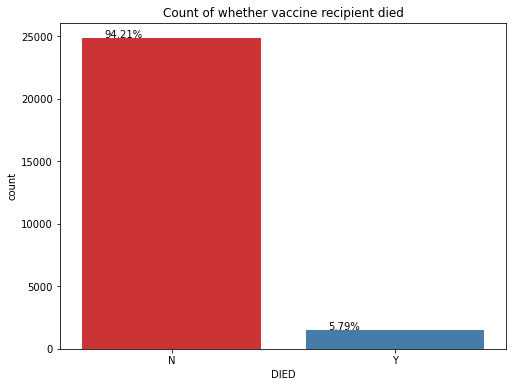

In [97]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient died")
plotUnivariateFeature('DIED',False,df,ax=ax1)

#### Feature: L_THREAT

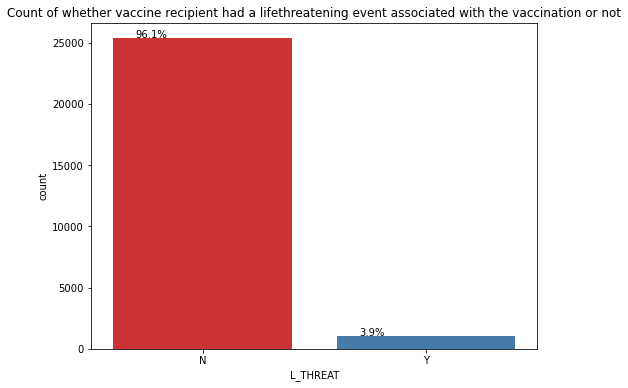

In [98]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient had a lifethreatening event associated with the vaccination or not")
plotUnivariateFeature('L_THREAT',False,df,ax=ax1)

#### Feature: ER_VISIT

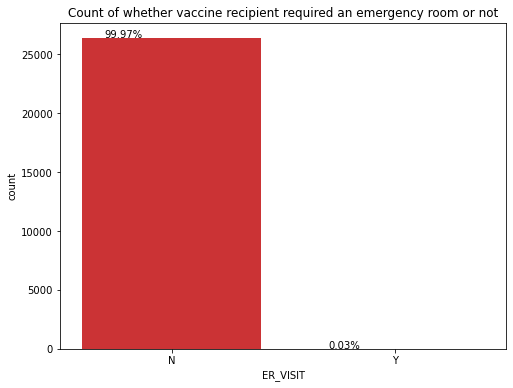

In [99]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient required an emergency room or not")
plotUnivariateFeature('ER_VISIT',False,df,ax=ax1)

#### Feature: DISABLE

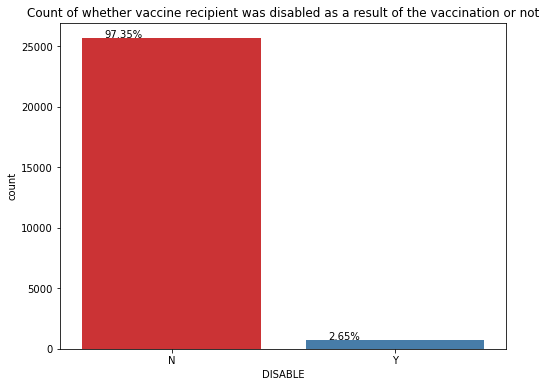

In [100]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient was disabled as a result of the vaccination or not")
plotUnivariateFeature('DISABLE',False,df,ax=ax1)

#### Feature: BIRTH_DEFECT

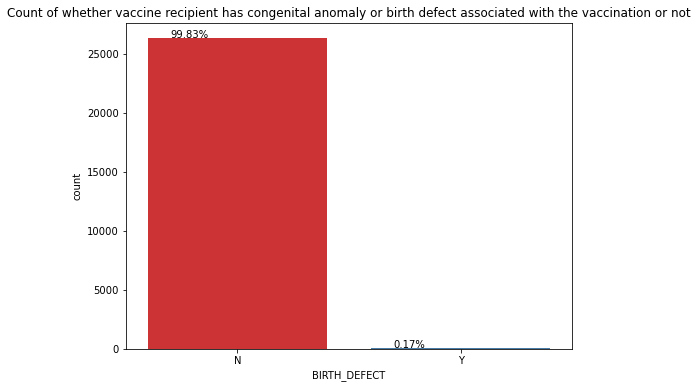

In [101]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient has congenital anomaly or birth defect associated with the vaccination or not")
plotUnivariateFeature('BIRTH_DEFECT',False,df,ax=ax1)

#### Categorical data that are independent variables that help in predicting severity
1. SEX
2. CUR_ILL
3. HAVE_COMORBIDITY
4. OTHER_MEDS
5. ALLERGIES
6. VAX_MANU

#### Feature: SEX

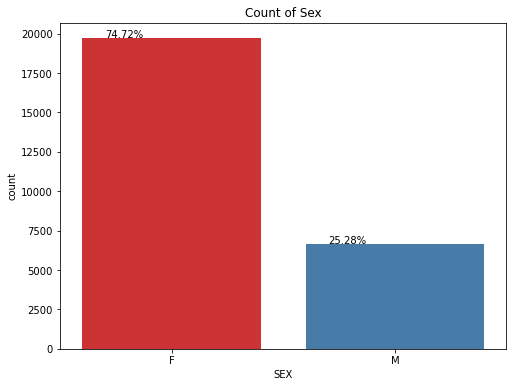

In [102]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of Sex")
plotUnivariateFeature('SEX',False,df,ax=ax1)

#### Feature: CUR_ILL

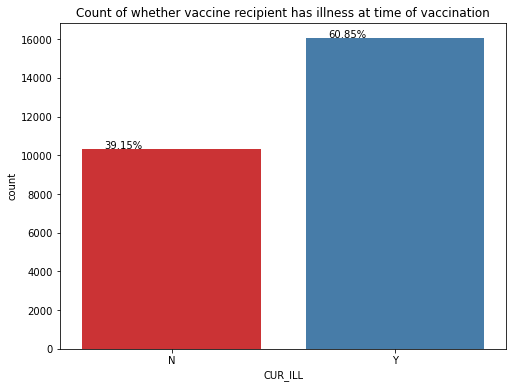

In [103]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient has illness at time of vaccination")
plotUnivariateFeature('CUR_ILL',False,df,ax=ax1)

#### Feature: HAVE_COMORBIDITY

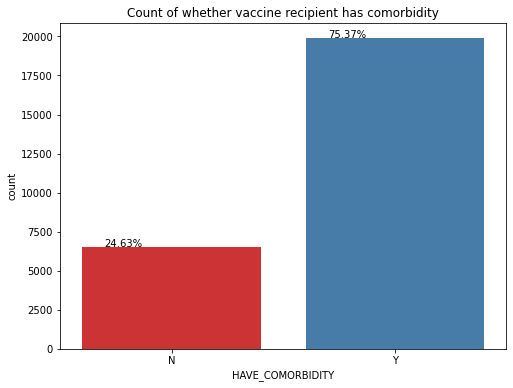

In [104]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient has comorbidity")
plotUnivariateFeature('HAVE_COMORBIDITY',False,df,ax=ax1)

#### Feature: OTHER_MEDS

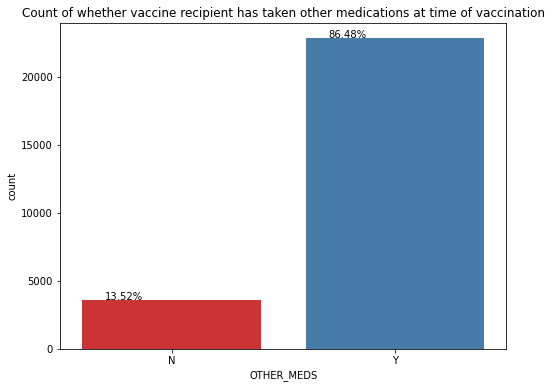

In [105]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether vaccine recipient has taken other medications at time of vaccination")
plotUnivariateFeature('OTHER_MEDS',False,df,ax=ax1)

#### Feature: ALLERGIES

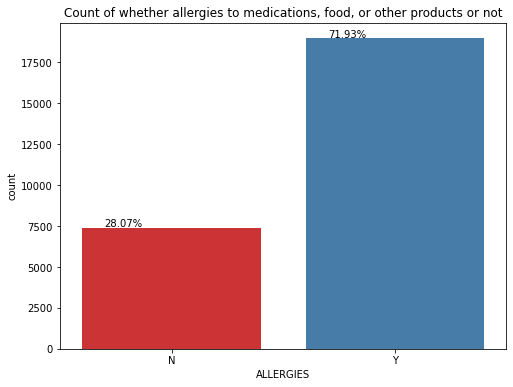

In [106]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of whether allergies to medications, food, or other products or not")
plotUnivariateFeature('ALLERGIES',False,df,ax=ax1)

#### Feature: VAX_MANU

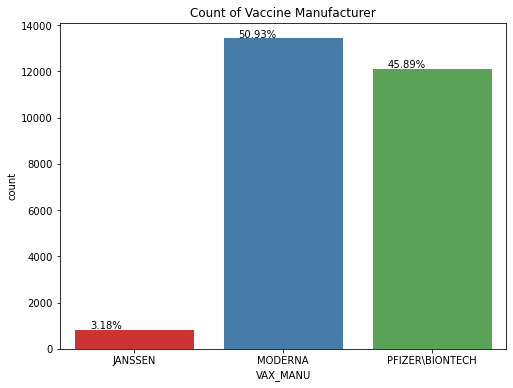

In [107]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of Vaccine Manufacturer")
plotUnivariateFeature('VAX_MANU',False,df,ax=ax1)

#### Visualize the distribution of class labels (SEVERITY)
- Class label explanation
    - 0: No adverse effect
    - 1: Mild
    - 2: Moderate
    - 3: Severe


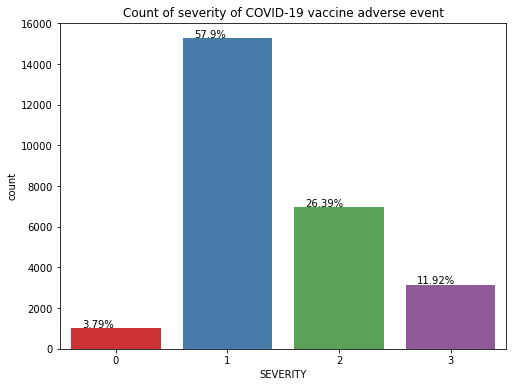

In [108]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.set_title("Count of severity of COVID-19 vaccine adverse event")
plotUnivariateFeature('SEVERITY',False,df,ax=ax1)

In [109]:
# for case with no adverse event, unrelated and not harmful symptoms, it will be categorized as 0
df[df['SEVERITY'] ==0][['SYMPTOMS']]

,SYMPTOMS
155,"[Heart rate increased, Tachycardia]"
287,[Tachycardia]
385,[Ear congestion]
448,[Unevaluable event]
520,[Unevaluable event]
...,...
26077,"[COVID-19, Drug ineffective, SARS-CoV-2 test]"
26086,"[Drug ineffective, Suspected COVID-19]"
26178,"[COVID-19, Drug ineffective, SARS-CoV-2 test]"
26224,[Vertigo]


## Bivariate analysis

Visualize vaccine manufacturer versus severity of COVID-19 vaccine adverse event

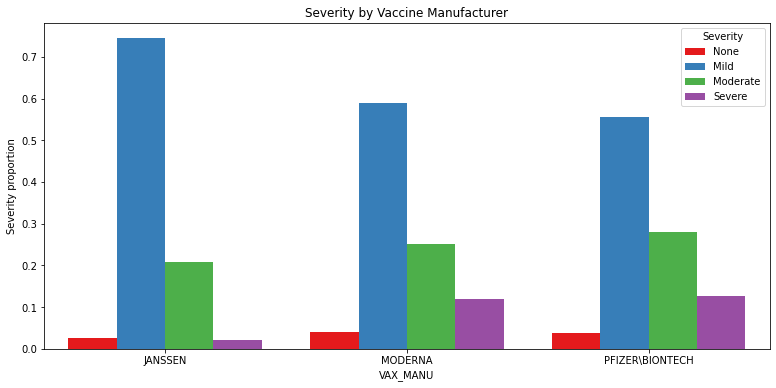

In [110]:
data = df.groupby('VAX_MANU')['SEVERITY'].value_counts(normalize=True).to_frame('Severity proportion').reset_index()
fig, (ax) = plt.subplots(1,1,figsize=(13,6))       
ax = sns.barplot(x = 'VAX_MANU', y = 'Severity proportion', hue= 'SEVERITY', data = data, saturation=1, palette=GLOBALPALETTE)
ax.set_title("Severity by Vaccine Manufacturer")
h, l = ax.get_legend_handles_labels()
ax.legend(h, GLOBALSEVERITY , title="Severity")

- From the graph above, we can see that Jansssen vaccine recipents actually has the lowest proportion of severe advere effect cases

Visualize number of doses administered versus severity of COVID-19 vaccine adverse event

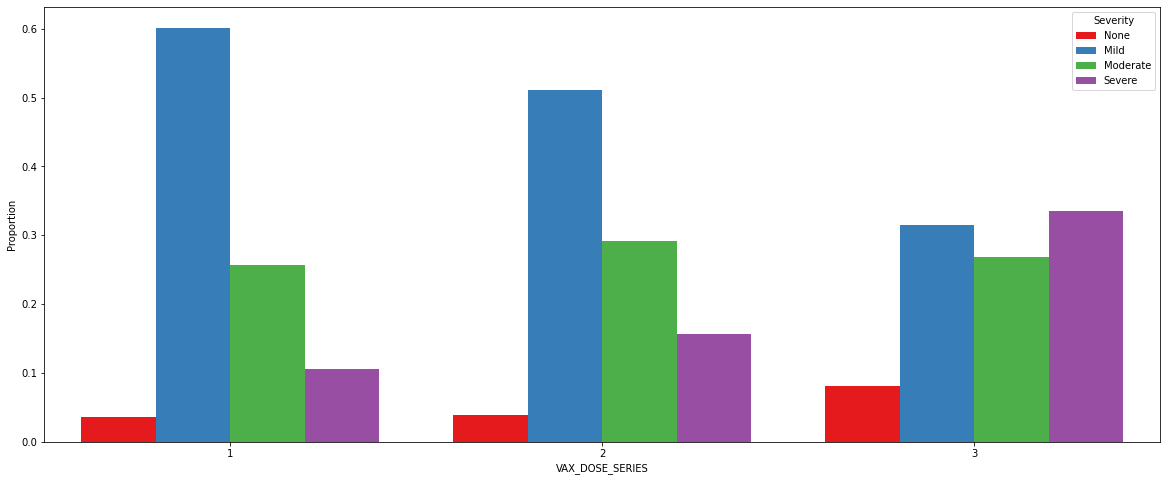

In [111]:
data = df.groupby('VAX_DOSE_SERIES')['SEVERITY'].value_counts(normalize=True).to_frame('Proportion').reset_index()
fig, (ax) = plt.subplots(1,1,figsize=(20,8))       
ax = sns.barplot(x = 'VAX_DOSE_SERIES', y = 'Proportion', hue= 'SEVERITY', data = data, saturation=1, palette=GLOBALPALETTE)
h, l = ax.get_legend_handles_labels()
ax.legend(h, GLOBALSEVERITY , title="Severity")

plt.show()

## Descriptive question

What is the average age of the death cases from the adverse reactions from the COVID-19 vaccine?

In [112]:
# show mean of 
diedDF = df[df["DIED"] == "Y"]
print(diedDF["AGE_YRS"].mean())

77.69306282722513


- Based on the output above, the average age of the fatal cases from the adverse reactions from COVID-19 vaccine is 77.69

0.003913894324853229
0.008621175409928438
0.16910949624337973


Text(0.5, 0, 'Age Group')

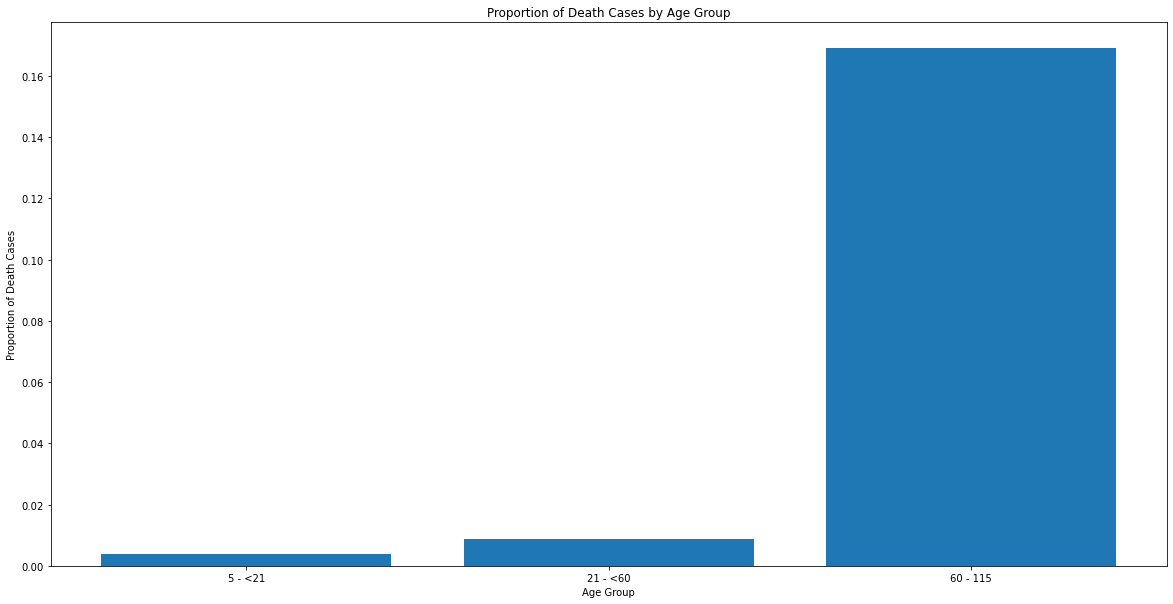

In [113]:
minVal = df["AGE_YRS"].min()
maxVal = df["AGE_YRS"].max()

bins = [minVal, 21, 60, maxVal]
labels = ["5 - <21", "21 - <60", "60 - " + str(int(maxVal))]

tmpDf = df.copy()
tmpDf["AGE_BIN"] = pd.cut(tmpDf["AGE_YRS"], bins = bins, labels = labels, include_lowest = True)

val = []
for l in labels:
    dfL = tmpDf[tmpDf["AGE_BIN"] == l]
    output = len(dfL[dfL["DIED"] == "Y"]) / len(dfL)
    print(output)
    val.append(output)

fig, (ax) = plt.subplots(1,1,figsize=(20,10))
ax.bar(labels, val)
ax.set_title("Proportion of Death Cases by Age Group")
ax.set_ylabel("Proportion of Death Cases")
ax.set_xlabel("Age Group")

- The barplot of Proportion of Death Cases by Age Group shows the distrubution of the Proportion of Death Cases for each of the Age Group (5 - <21, 21 - <60, 60 - 115)
    - The highest frequency of Death is around the age of 60 - 115, at around 0.169
    - Following up by the Age Group of 21 - <60, at around 0.009
    - Lastly, the Age Group of 5 - <21 has the lowest frequency, at around 0.004

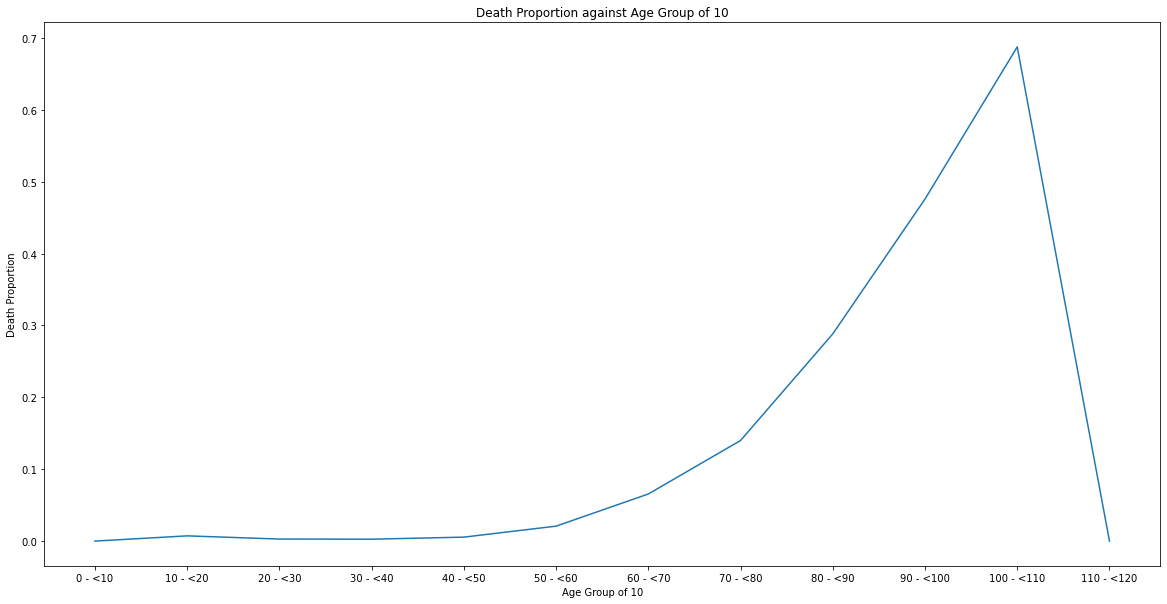

In [114]:
def getDeathPrbByAge(df, f):
    maxVal = int(df["AGE_YRS"].max()) // f

    agePop = [0 for i in range(maxVal + 1)]
    ageDie = [0 for i in range(maxVal + 1)]

    for i in range(len(df)):
        ageF = int(df.at[i, "AGE_YRS"]) // f
        agePop[ageF] += 1
        if df.at[i, "DIED"] == "Y":
            ageDie[ageF] += 1

    return [ageDie[i]/agePop[i] if agePop[i] else 0 for i in range(maxVal + 1)]

f = 10
ageGroup = getDeathPrbByAge(df, f)
xData = [str(i*f) + " - <" + str(i*f + f) for i in range(len(ageGroup))]

fig, (ax) = plt.subplots(1,1,figsize=(20,10))
ax = sns.lineplot(xData, ageGroup)
ax.set_title("Death Proportion against Age Group of 10")
ax.set_ylabel("Death Proportion")
ax.set_xlabel("Age Group of 10")
plt.show()

- Next, a line plot of Death Proportion against the Age Group of 10 has been plotted
    - The y value Death Proportion helps in showing the actual differences of the Death ratio for each Age group
    - The x value Age Group of 10 narrows down from the previous age group to show a better distribution of the frequency of death cases
    - This helps us to visualize the actual range of Death cases for the age group, and understand why the mean is around the age of 77.69 better
    

## Mechanistic question
How does the number of doses administered by an individual affect the severity of adverse reactions from the COVID-19 vaccine?

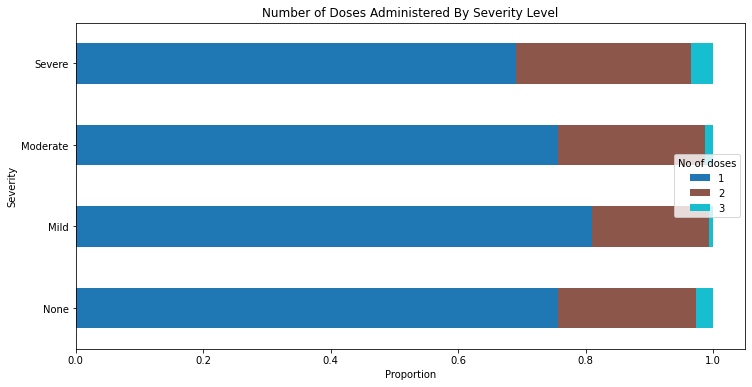

In [115]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=df['SEVERITY'],
                             columns=df['VAX_DOSE_SERIES'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, [1,2,3] , title="No of doses", loc='center right')
ax.set(xlabel="Proportion", ylabel = "Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Number of Doses Administered By Severity Level")
plt.show()

- if we move from top to bottom (severe to no adverse reaction), we can see that the dark blue bar (had 1 dose administered) increase from severe level to mild level but decrease at no adverse reaction level while the brown bar (had 2 doses administered) and the light blue bar (had 3 doses administered) decrease from severe level to mild level but increase at no adverse reaction level
- In conclusion, it looks like there is a pattern could be found between number of doses administered and severity of adverse reactions of COVID-19 vaccine
- To justify the findings, we will proceed to do a Chi-square test with the variables

In [116]:
cRes = pd.crosstab(index = df["VAX_DOSE_SERIES"], columns = df["SEVERITY"])
print(cRes) 

 
chiSqRes = chi2_contingency(cRes)
print('The P-Value of the ChiSq Test is:', chiSqRes[1])

SEVERITY           0      1     2     3
VAX_DOSE_SERIES                        
1                757  12366  5270  2172
2                216   2802  1601   862
3                 27    104    89   111
The P-Value of the ChiSq Test is: 1.9731157515335763e-76


- The Chi-square test is a test that determine if there is a relationship between 2 categorical variables
    - Normally, if the numeric discrete variable has many levels, it should be treated as a continuous variable
    - But for our case, the numeric discretre variable (Number of Doses) has only 3 levels
    - Thus, we decided to treat the Number of Doses as a categorical variable
1. First, we define the null and alternative hyphotheses
    - H0: There is no relationship between the number of doses administered by an individual and the severity of adverse reactions from the COVID-19 vaccine
    - HA: There is a relationship between the number of doses administered by an individual and the severity of adverse reactions from the COVID-19 vaccine
2. Thus, we conduct the Chi-square test
3. Based on the output of the Chi-square test, the calculated p-value is 1.9731157515335763e-76, which is less than 0.05 which is a common level of significance
4. Therefore, we would reject null hypothesis as the test result is statistically significant
5. In conclusion, there is a relationship between the number of doses administered by an individual and the severity of adverse reactions from the COVID-19 vaccine

## Causal question 
Will a higher age group of an individual cause the adverse reactions from the COVID-19 vaccine to be more severe?

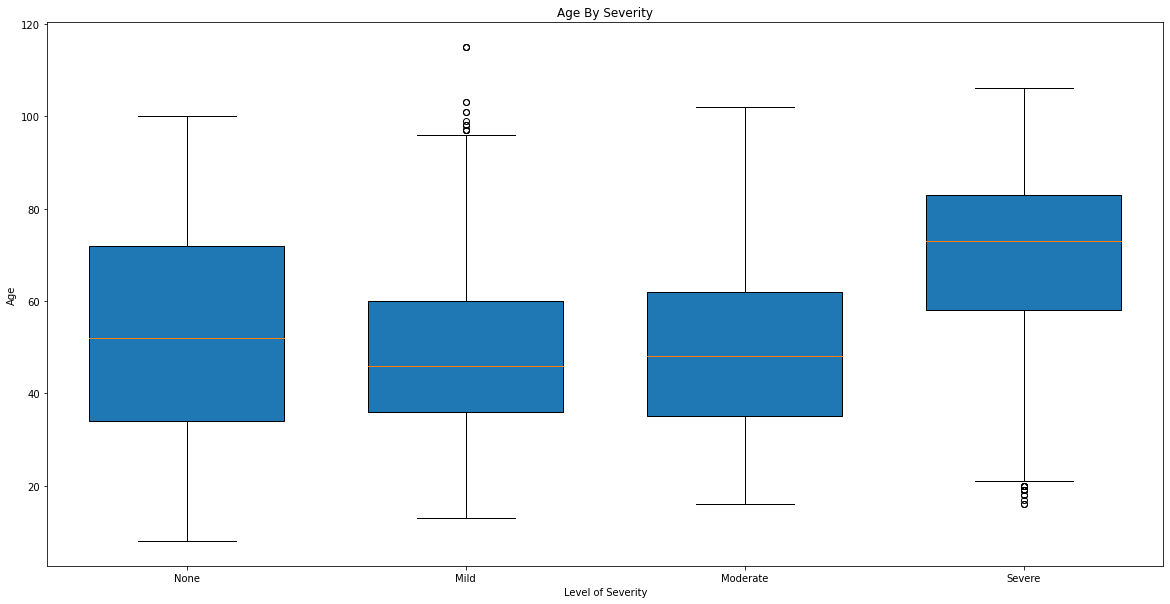

In [117]:
# boxplot for age over severity 0,1,2,3

fig, (ax) = plt.subplots(1,1, figsize = (20, 10))
data = [df[df["SEVERITY"] == i]["AGE_YRS"] for i in range(4)]

ax.set_ylabel("Age")
ax.set_xlabel("Level of Severity")
ax.set_title("Age By Severity")
ax.boxplot(data, patch_artist=True, labels = GLOBALSEVERITY, widths = 0.7)
plt.show()

- First, we plot the boxplots to visualize the distribution of Age against the Severity level
- For the Severe box, we can see that there is some outliers below the age of 20
    - This indicates that there are some young individuals that have severe reactions from taking the COVID-19 vaccines, but they are just outliers 
- Same goes with the Mild box above the age of 95
    - There are some older individuals that has mild reactions but they are also outliers
- Then, we focus on each of the boxplots to see that if there is any association between the age and the serverity
    - We can see that all the boxes are overlapping with each other
    - Overall, the boxplots indicate that there is no association between the age and the level of severity

- From the data visualization, we can see that there is no relationship between age and the severity of the adverse reactions from the COVID-19 vaccine
- According to U.S. Centers for Disease Control and Prevention (https://www.aarp.org/health/conditions-treatments/info-2021/older-people-covid-vaccine.html), for those who did have symptoms, pain at the injection site, fatigue, headache and muscle pain — the majority of which were mild to moderate — were the most common among older adults in clinical trials for the Moderna, Pfizer and J&J vaccines. Older adults reported more frequent and more intense side effects after their second dose of the Pfizer and Moderna vaccines, compared to the first dose. It shows tha there is a relationship between age and the severity of the adverse reactions from the COVID-19 vaccine
- However, our dataset does not reflect the same result reported by U.S. Centers for Disease Control and Prevention, we believe that it is because that the dataset might be biased and subjective due to the data collection methods and data sources. Our approach of preprocessing data might also contribute to factors of having this undesired result.

## Exploratory question
What is the relationship between the severity of adverse reactions from the COVID-19 vaccine and the sex of the individuals?

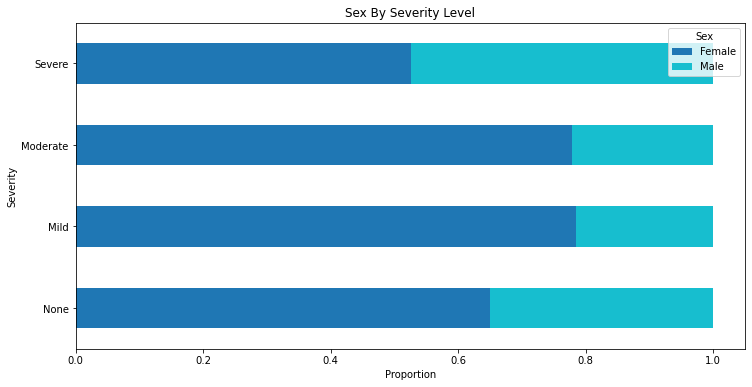

In [118]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=df['SEVERITY'],
                             columns=df['SEX'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Female','Male'] , title="Sex")
ax.set(xlabel="Proportion", ylabel = "Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Sex By Severity Level")
plt.show()


- We plotted a horizontal stacked bar chart to see if there is any relationship between sex and severity of adverse reactions of COVID-19 vaccine
- For female group, if we move from top to bottom (severe to no adverse reaction), we can see that the dark blue bar (proportion) increase from severe level to mild level but decrease at no adverse reaction level
- For male group, it seems like it has the opposite pattern as referred from female group if we move from top to bottom (severe to no adverse reaction), we can see that light blue bar (proportion) decrease from severe level to mild level but increase at no adverse reaction level
- In conclusion, it looks like there is a pattern could be found between sex and severity of adverse reactions of COVID-19 vaccine

In [119]:
cRes = pd.crosstab(index = df["SEX"], columns = df["SEVERITY"])
print(cRes)
 
chiSqRes = chi2_contingency(cRes)
print('The P-Value of the ChiSq Test is:', chiSqRes[1])

SEVERITY    0      1     2     3
SEX                             
F         650  11992  5414  1654
M         350   3280  1546  1491
The P-Value of the ChiSq Test is: 3.675937842436521e-220


- So, to see if there is a relationship between 2 categorical variables, we decided to conduct the Chi-square test
1. First, we define null and alternative hypotheses
    - H0: There is no relationship between sex and severity of adverse reactions of COVID-19 vaccine
    - HA: There is relationship between sex and severity of adverse reactions of COVID-19 vaccine
2. Thus, we conduct the Chi-square test
3. Based on the output of the Chi-square test, the p-value is 3.675937842436521e-220, which is less than 0.05 which is a common level of significance
4. Therefore, we would reject null hypothesis as the test result is statistically significant
5. In conclusion, there is a relationship between sex and severity of adverse reactions of COVID-19 vaccine

## Predictive question
What kind of vaccine recipient will have severe adverse reactions from the COVID-19 vaccine?

- Since we are trying to predict the severity of adverse reactions from the COVID-19 vaccine as response variable, this is a categorical variable so it is a classificaion problem, thus we will use classificaion model

#### Model Selection
1. Random Forest

#### Reasons to select Random Forest:
- Random Forest usually performs better than other machine learning algorithms in kaggle competitions.
- As it is an ensemble learning method:
    - prevent underfitting and overfitting
    - so less noisy and more robust 


#### Preparing data before training model
- Exclude the dependent variables that help ranking severity of adverse reactions from the COVID-19 vaccine previously such as 'HOSPDAYS', 'DIED', 'L_THREAT', 'ER_VISIT', 'DISABLE' and 'BIRTH_DEFECT'
- Exclude unused column such as 'VAERS_ID', 'SYMPTOMS'
- Apply label encoding on categorical variables

In [120]:
tempDf = df.copy()
tempDf.drop(['VAERS_ID','SYMPTOMS','HOSPDAYS', 'DIED', 'L_THREAT', 'ER_VISIT', 'DISABLE', 'BIRTH_DEFECT'],axis=1,inplace=True)


# Encode Categorical Columns
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

categ = ['SEX','OTHER_MEDS','CUR_ILL','HAVE_COMORBIDITY','ALLERGIES','VAX_MANU']
multi = MultiColumnLabelEncoder(columns=categ)

tempDf = multi.fit_transform(tempDf)

tempDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26377 entries, 0 to 26376
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE_YRS           26377 non-null  float64
 1   SEX               26377 non-null  int64  
 2   OTHER_MEDS        26377 non-null  int64  
 3   CUR_ILL           26377 non-null  int64  
 4   HAVE_COMORBIDITY  26377 non-null  int64  
 5   ALLERGIES         26377 non-null  int64  
 6   VAX_DOSE_SERIES   26377 non-null  int64  
 7   VAX_MANU          26377 non-null  int64  
 8   SEVERITY          26377 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.8 MB


#### Model Training

#### Split Train/Test Set

In [121]:
#Everything except target variable
X = tempDf.drop("SEVERITY", axis=1)

# Target variable
y = tempDf["SEVERITY"]
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2, # percentage of data to use for test set
                                                    random_state=42) 

In [122]:
# Check shape
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (21101, 8)
y_train shape:  (21101,)
X_test shape:  (5276, 8)
y_test shape:  (5276,)


In [123]:
# Fix constant variables
cv = 5
scoring = "f1"
random_state = 42

# Put models in a dictionary
models = { 
          "Random Forest": RandomForestClassifier(random_state=random_state)
         }



# Create function to fit and evaluate models
def evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        print(classification_report(y_test, y_pred))
        model_scores[name] = f1_score(y_test, y_pred,average='weighted'),
    return model_scores



#### Baseline Model's Performance Visualization using F1-score as metric

In [124]:
model_scores = evaluate(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_compare = pd.DataFrame(model_scores, index=[scoring])
model_compare

              precision    recall  f1-score   support

           0       0.41      0.17      0.24       186
           1       0.64      0.82      0.72      3142
           2       0.29      0.15      0.20      1341
           3       0.42      0.34      0.37       607

    accuracy                           0.57      5276
   macro avg       0.44      0.37      0.38      5276
weighted avg       0.52      0.57      0.53      5276



,Random Forest
f1,0.530138


#### Hyperparameter tuning with GridSearchCV

In [125]:
# Random Forest 
n_estimators = [100, 150, 300]
max_depth = [15, 25, 30]
min_samples_split = [5, 10, 15, 20]

rf_params_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

rf = RandomForestClassifier(random_state=random_state)
rf_clf = GridSearchCV(rf, rf_params_grid, scoring=scoring, cv = cv)
best_rf = rf_clf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

print('Best params', best_rf.best_params_)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_rf))
#Checking performance our model with f1 score.
print("F1 score:",f1_score(y_test, y_pred_rf,average='weighted'))

Best params {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.48      0.14      0.22       186
           1       0.64      0.87      0.74      3142
           2       0.29      0.11      0.16      1341
           3       0.45      0.35      0.39       607

    accuracy                           0.59      5276
   macro avg       0.47      0.37      0.38      5276
weighted avg       0.53      0.59      0.53      5276

F1 score: 0.5333496875498192


In [126]:
# Evaluate tuned model
best_model = {
          "Random Forest": RandomForestClassifier(random_state=random_state,max_depth=15, min_samples_split=5, n_estimators=100),
         }
best_model_scores = evaluate(models=best_model,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
best_model_compare = pd.DataFrame(best_model_scores, index=[scoring])
best_model_compare

              precision    recall  f1-score   support

           0       0.48      0.14      0.22       186
           1       0.64      0.87      0.74      3142
           2       0.29      0.11      0.16      1341
           3       0.45      0.35      0.39       607

    accuracy                           0.59      5276
   macro avg       0.47      0.37      0.38      5276
weighted avg       0.53      0.59      0.53      5276



,Random Forest
f1,0.53335


#### Model performance after hyperparameter tuning
After hyperparameter tuning, the performance of random forest has only slightly improved from as the f1-score (0.53335) is slightly higher than the previous f1-score(0.53014)

#### Predicting Test Data


In [127]:
model = RandomForestClassifier(random_state=random_state,max_depth=15, min_samples_split=5, n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(predictions)

[1 1 1 ... 1 2 3]


In [128]:
frequency = {}

# iterating over the list
for item in predictions:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
print(frequency)

{1: 4253, 3: 467, 2: 502, 0: 54}


In [129]:
# Filter out those data that are being prediceted as having severe adverse reactions of from the COVID-19 vaccine
X_test = multi.inverse_transform(X_test)
X_test['PREDICTED_SEVERITY'] = predictions
X_test[predictions == 3]

,AGE_YRS,SEX,OTHER_MEDS,CUR_ILL,HAVE_COMORBIDITY,ALLERGIES,VAX_DOSE_SERIES,VAX_MANU,PREDICTED_SEVERITY
25576,78.0,M,Y,N,Y,N,2,PFIZER\BIONTECH,3
22088,83.0,M,Y,Y,Y,Y,2,PFIZER\BIONTECH,3
19034,95.0,F,Y,N,Y,N,2,MODERNA,3
18665,76.0,M,N,N,N,Y,1,MODERNA,3
19535,88.0,M,Y,Y,Y,N,2,MODERNA,3
...,...,...,...,...,...,...,...,...,...
1768,56.0,M,N,Y,Y,N,1,PFIZER\BIONTECH,3
20978,87.0,M,Y,Y,Y,N,2,MODERNA,3
25934,93.0,F,Y,Y,Y,Y,1,MODERNA,3
15918,79.0,F,Y,N,Y,N,1,PFIZER\BIONTECH,3


#### For categorical/discrete data


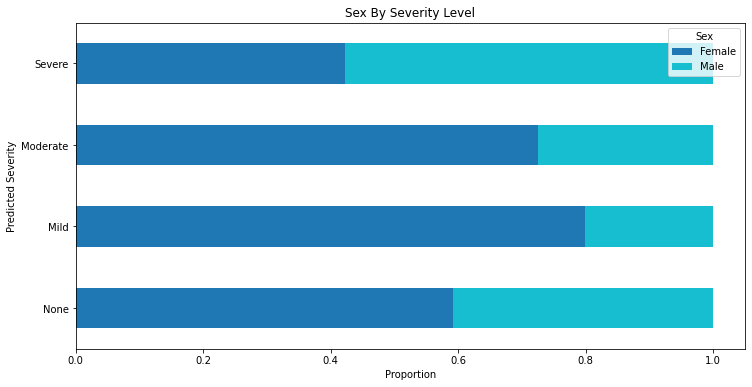

In [130]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['SEX'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,['Female','Male'], title="Sex", loc='upper right')
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Sex By Severity Level")
plt.show()

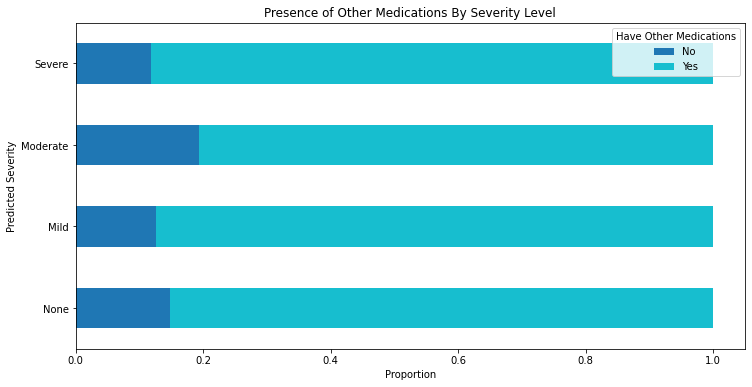

In [131]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['OTHER_MEDS'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes',] , title="Have Other Medications")
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Presence of Other Medications By Severity Level")
plt.show()


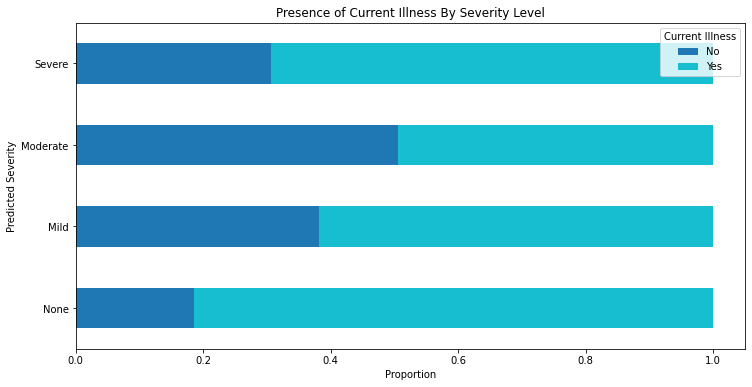

In [132]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['CUR_ILL'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes',] , title="Current Illness")
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Presence of Current Illness By Severity Level")
plt.show()

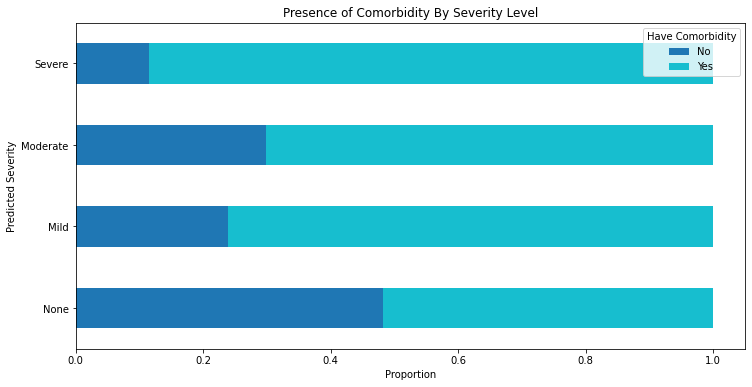

In [133]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['HAVE_COMORBIDITY'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'] , title="Have Comorbidity", loc='upper right')
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Presence of Comorbidity By Severity Level")
plt.show()

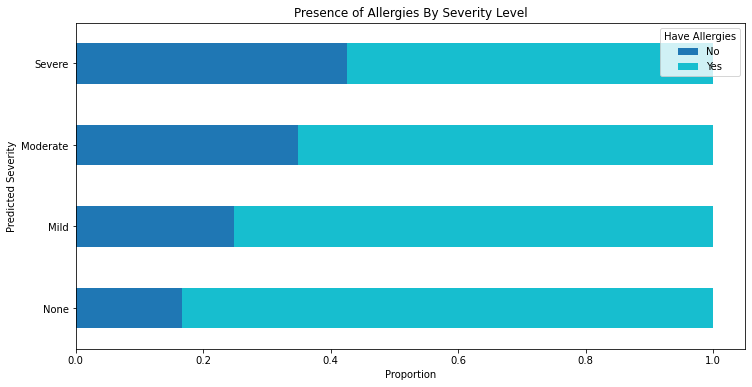

In [134]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['ALLERGIES'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'] , title="Have Allergies", loc='upper right')
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Presence of Allergies By Severity Level")
plt.show()

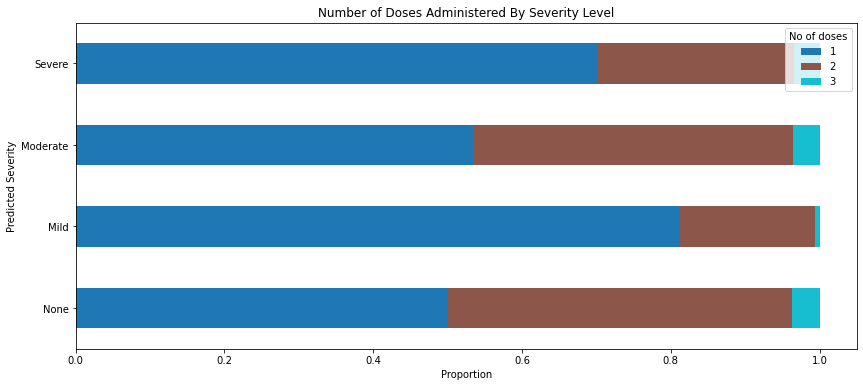

In [135]:
fig, (ax) = plt.subplots(1,1,figsize=(14,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['VAX_DOSE_SERIES'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, [1,2,3] , title="No of doses", loc='upper right')
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Number of Doses Administered By Severity Level")
plt.show()

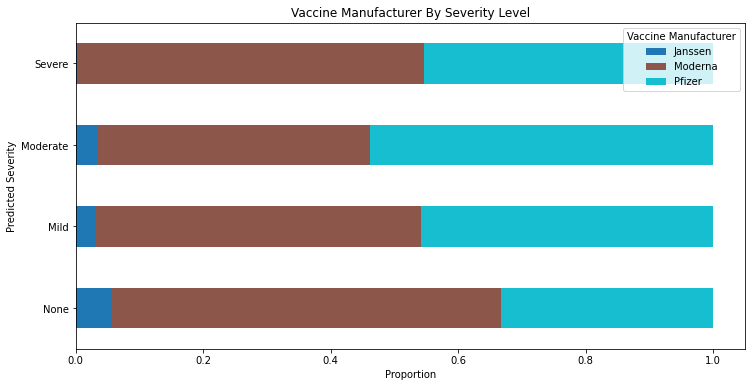

In [136]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=X_test['PREDICTED_SEVERITY'],
                             columns=X_test['VAX_MANU'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Janssen','Moderna','Pfizer'] , title="Vaccine Manufacturer", loc='upper right')
ax.set(xlabel="Proportion", ylabel = "Predicted Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Vaccine Manufacturer By Severity Level")
plt.show()

In [137]:
##### For continuous data
X_test[predictions == 3][['AGE_YRS']].describe()

,AGE_YRS
count,467.000000
mean,80.087794
std,11.897939
min,21.000000
25%,74.000000
50%,82.000000
75%,89.000000
max,102.000000


- We have used the test set which contains 5283 rows for the model do the prediction. There are 467 rows of predictor variables that able to let the model predict the vaccine receicipent will have severe adverse reactions from the COVID-19 vaccine
- For categorical, discrete data:
    - Sex: From the severe adverse reactions category, it has the highest proportion in males and lowest proportion in females compared to other category,  it seems as most of the **males** will be predicted having severe adverse reactions
    - OTHER_MEDS: 
        - For severe adverse reactions category, it has the highest proportion of the group of individuals having other medications and the lowest proportion of the group of individuals not having other medications compared to other categories
        - Thus, we can infer that an individual who **has other medications** has a higher probability to have severe adverse reactions from the COVID-19 vaccine.
    - CUR_ILL: 
        - From proportion for each severity level category, it seems there is no difference in distributions between group having illeness at time of vaccination and group not  having illeness at time of vaccination for each severity level
        - From the no adverse reactions category, it has the highest proportion of having illeness and lowest proportion of not having illeness compared to other category. However, it is not useful for extracting insight as we are trying to understand what kind of characteries of a individual have will contribute to be having severe adverse reactions
    - HAVE_COMORBIDITY: From the severe adverse reactions category, it has the highest proportion of having comorbidity and lowest proportion of not having comorbidity compared to other category, we can conclude that an individual who **has comorbidity** has higher probability having severe adverse reaction
    - ALLERGIES: 
        - if we move from bottom to top (no adverse reaction to severe), we can see that the dark blue bar (not having allergies) increase while the light blue bar (having allergies) decrease
        - Not having allergies will increase the severity of adverse reactions of COVID-19 vaccine, we can conclude that an individual who **does not has allergies** has higher probability having severe adverse reaction
    - VAX_DOSE_SERIES: There is no obvious pattern
    - VAX_MANU: There are 3 types of vaccine manufacturer, which are Moderna, Pfizer and Janssen. For Moderna and Pfizer, there is no obvious pattern for Moderna and Pfizer categories. However, the proportion of Janssen is the lowest in severe adverse reactions category. Therefore, we might conclude that **not choosing Janssen vaccine** has higher probability having severe adverse reaction
- For continuous data:
    - AGE_YRS: We can see that the the mean of age of individuals who is predicted having severe adverse reactions is 80.09, which falls in older age group
- From the interpretation above, we can conclude that an individual who
    - is in old age group
    - is male
    - has other medications
    - has comorbidity
    - does not has allergies
    - not choosing Janssen vaccine
- will have **higher chances to have severe adverse reactions from the COVID-19 vaccine** 
- For features variables such as having illness at time of vaccination and the number of doses administered, these variables do not help much in predicting the response variable
- Also, since our model performance is not very good as well since it only has 0.53335 f1-score. The result predicted by model is not solid to be applied on real life


## Inferential question
Hypothesis: The presence of comorbidity is associated with the severity of the adverse reactions from the COVID-19 vaccine based on the sample population of US males.

Question: Is the hypothesis also true for the population of US females?

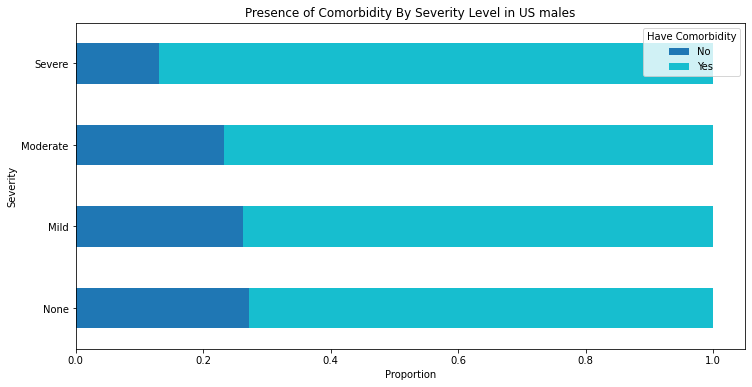

In [138]:
maleDF = df[df['SEX'] == 'M']
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=maleDF['SEVERITY'],
                             columns=maleDF['HAVE_COMORBIDITY'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'] , title="Have Comorbidity")
ax.set(xlabel="Proportion", ylabel = "Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Presence of Comorbidity By Severity Level in US males")
plt.show()

- We plotted a horizontal stacked bar chart to see if there is any relationship between presence of comorbidity and severity of adverse reactions of COVID-19 vaccine based on the sample population of US males
- if we move from bottom to top (no adverse reaction to severe), we can see that the dark blue bar (not having comorbidity) decrease while the light blue bar (having comorbidity) increase
- Having comorbidity will increase the severity of adverse reactions of COVID-19 vaccine
- In conclusion, presence of comorbidity is cleary associated with severity of adverse reactions of COVID-19 vaccine based on the sample population of US males

In [139]:
cRes = pd.crosstab(index = maleDF["HAVE_COMORBIDITY"], columns = maleDF["SEVERITY"])
print(cRes) 
 
chiSqRes = chi2_contingency(cRes)
print('The P-Value of the ChiSq Test is:', chiSqRes[1])

SEVERITY            0     1     2     3
HAVE_COMORBIDITY                       
N                  95   861   361   195
Y                 255  2419  1185  1296
The P-Value of the ChiSq Test is: 5.92357441186851e-23


1. First, we define null and alternative hypotheses
    - H0: There is no relationship between the presence of comorbidity and the severity of the adverse reactions from the COVID-19 vaccine based on the sample population of US males
    - HA: There is a relationship between the presence of comorbidity and the severity of the adverse reactions from the COVID-19 vaccine based on the sample population of US males
2. Thus, we conduct the Chi-square test
3. Based on the output of the Chi-square test, the p-value is 5.92357441186851e-23, which is less than 0.05 which is a common level of significance
4. Therefore, we would reject null hypothesis as the test result is statistically significant
5. In conclusion, there is a relationship between the presence of comorbidity and the severity of the adverse reactions from the COVID-19 vaccine for the population of US males

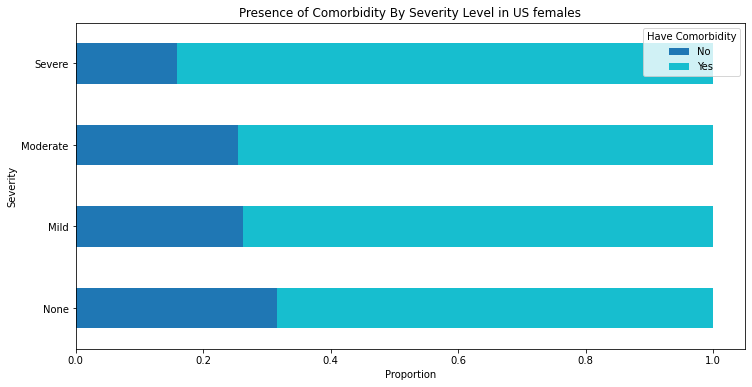

In [140]:
femaleDF = df[df['SEX'] == 'F']
fig, (ax) = plt.subplots(1,1,figsize=(12,6))       
cross_tab_prop = pd.crosstab(index=femaleDF['SEVERITY'],
                             columns=femaleDF['HAVE_COMORBIDITY'],
                             normalize="index")
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'] , title="Have Comorbidity")
ax.set(xlabel="Proportion", ylabel = "Severity")
ax.set_yticks([3,2,1,0],["Severe","Moderate", "Mild","None"])
ax.set_title("Presence of Comorbidity By Severity Level in US females")
plt.show()

- After knowing the relationship between variables for US males, we repeat the same process for the US females
- if we move from bottom to top (no adverse reaction to severe), we can see that the dark blue bar (not having comorbidity) decrease while the light blue bar (having comorbidity) increase
- Having comorbidity will increase the severity of adverse reactions of COVID-19 vaccine
- In conclusion, presence of comorbidity is cleary associated with severity of adverse reactions of COVID-19 vaccine based on the sample population of US females
- Same as the previous process for the hypothesis, we need to justify our finding with a Chi-square test

In [141]:
cRes = pd.crosstab(index = femaleDF["HAVE_COMORBIDITY"], columns = femaleDF["SEVERITY"])
print(cRes) 
 
chiSqRes = chi2_contingency(cRes)
print('The P-Value of the ChiSq Test is:', chiSqRes[1])

SEVERITY            0     1     2     3
HAVE_COMORBIDITY                       
N                 205  3141  1376   262
Y                 445  8851  4038  1392
The P-Value of the ChiSq Test is: 7.487661940887952e-21


1. First, we define null and alternative hypotheses
    - H0: There is no relationship between the presence of comorbidity and the severity of the adverse reactions from the COVID-19 vaccine based on the sample population of US females
    - HA: There is a relationship between the presence of comorbidity and the severity of the adverse reactions from the COVID-19 vaccine based on the sample population of US females
2. Thus, we conduct the Chi-square test
3. Based on the output of the Chi-square test, the p-value is 7.487661940887952e-21, which is less than 0.05 which is a common level of significance
4. Therefore, we would reject null hypothesis as the test result is statistically significant
5. In conclusion, there is a relationship between the presence of comorbidity and the severity of the adverse reactions from the COVID-19 vaccine for the population of US females

##### Conclusion for Chi-square test
- We can conclude that the variables is associated for both of the males population and females population in the US
    